# Copy file from Drive

In [ ]:
!cp /content/drive/MyDrive/Script_Document/innercity.xlsx /content/
!cp /content/drive/MyDrive/Script_Document/US_Zipcodes.csv /content/

# Import Module and Load Data

In [ ]:
import pandas as pd
import numpy as np

house_pricing_df = pd.read_excel("/content/innercity.xlsx")
us_zip_df = pd.read_csv('/content/US_Zipcodes.csv', sep=";")

In [ ]:
house_pricing_df.head()

cid         dayhours   price  room_bed  room_bath  living_measure  \
0  3876100940  20150427T000000  600000      4.00       1.75         3050.00   
1  3145600250  20150317T000000  190000      2.00       1.00          670.00   
2  7129303070  20140820T000000  735000      4.00       2.75         3040.00   
3  7338220280  20141010T000000  257000      3.00       2.50         1740.00   
4  7950300670  20150218T000000  450000      2.00       1.00         1120.00   

   lot_measure ceil coast  sight condition  quality  ceil_measure  basement  \
0      9440.00    1     0   0.00         3     8.00       1800.00   1250.00   
1      3101.00    1     0   0.00         4     6.00        670.00      0.00   
2      2415.00    2     1   4.00         3     8.00       3040.00      0.00   
3      3721.00    2     0   0.00         3     8.00       1740.00      0.00   
4      4590.00    1     0   0.00         3     7.00       1120.00      0.00   

  yr_built  yr_renovated  zipcode   lat    long  living_measure15  \
0     1966             0    98034 47.72 -122.18           2020.00   
1     1948             0    98118 47.55 -122.27           1660.00   
2     1966             0    98118 47.52 -122.26           2620.00   
3     2009             0    98002 47.34 -122.21           2030.00   
4     1924             0    98118 47.57 -122.28           1120.00   

   lot_measure15  furnished total_area  
0        8660.00       0.00      12490  
1        4100.00       0.00       3771  
2        2433.00       0.00       5455  
3        3794.00       0.00       5461  
4        5100.00       0.00       5710

In [ ]:
us_zip_df.head()

Zip Code Official USPS city name Official USPS State Code  \
0     90005             Los Angeles                       CA   
1     90006             Los Angeles                       CA   
2     90008             Los Angeles                       CA   
3     90040             Los Angeles                       CA   
4     90045             Los Angeles                       CA   

  Official State Name  ZCTA  ZCTA parent  Population  Density  \
0          California  True          NaN    39732.00 14151.80   
1          California  True          NaN    59576.00 11981.70   
2          California  True          NaN    31754.00  3337.90   
3          California  True          NaN    12328.00   852.80   
4          California  True          NaN    40567.00  1459.60   

   Primary Official County Code Primary Official County Name  \
0                          6037                  Los Angeles   
1                          6037                  Los Angeles   
2                          6037                  Los Angeles   
3                          6037                  Los Angeles   
4                          6037                  Los Angeles   

     County Weights Official County Name Official County Code  Imprecise  \
0  {"06037": "100"}          Los Angeles                 6037      False   
1  {"06037": "100"}          Los Angeles                 6037      False   
2  {"06037": "100"}          Los Angeles                 6037      False   
3  {"06037": "100"}          Los Angeles                 6037      False   
4  {"06037": "100"}          Los Angeles                 6037      False   

   Military             Timezone             Geo Point  
0     False  America/Los_Angeles  34.05912, -118.30654  
1     False  America/Los_Angeles  34.04801, -118.29418  
2     False  America/Los_Angeles  34.00956, -118.34706  
3     False  America/Los_Angeles  33.99353, -118.14907  
4     False  America/Los_Angeles  33.95297, -118.40014

In [ ]:
pd.options.display.max_columns = None
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# pd.options.display.max_rows = None

# Setting up columns

In [ ]:
house_pricing_df.shape

(21613, 23)

In [ ]:
house_pricing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21505 non-null  float64
 4   room_bath         21505 non-null  float64
 5   living_measure    21596 non-null  float64
 6   lot_measure       21571 non-null  float64
 7   ceil              21571 non-null  object 
 8   coast             21612 non-null  object 
 9   sight             21556 non-null  float64
 10  condition         21556 non-null  object 
 11  quality           21612 non-null  float64
 12  ceil_measure      21612 non-null  float64
 13  basement          21612 non-null  float64
 14  yr_built          21612 non-null  object 
 15  yr_renovated      21613 non-null  int64  
 16  zipcode           21613 non-null  int64 

In [ ]:
house_pricing_df.describe()

cid      price  room_bed  room_bath  living_measure  \
count      21613.00   21613.00  21505.00   21505.00        21596.00   
mean  4580301520.86  540182.16      3.37       2.12         2079.86   
std   2876565571.31  367362.23      0.93       0.77          918.50   
min      1000102.00   75000.00      0.00       0.00          290.00   
25%   2123049194.00  321950.00      3.00       1.75         1429.25   
50%   3904930410.00  450000.00      3.00       2.25         1910.00   
75%   7308900445.00  645000.00      4.00       2.50         2550.00   
max   9900000190.00 7700000.00     33.00       8.00        13540.00   

       lot_measure    sight  quality  ceil_measure  basement  yr_renovated  \
count     21571.00 21556.00 21612.00      21612.00  21612.00      21613.00   
mean      15104.58     0.23     7.66       1788.37    291.52         84.40   
std       41423.62     0.77     1.18        828.10    442.58        401.68   
min         520.00     0.00     1.00        290.00      0.00          0.00   
25%        5040.00     0.00     7.00       1190.00      0.00          0.00   
50%        7618.00     0.00     7.00       1560.00      0.00          0.00   
75%       10684.50     0.00     8.00       2210.00    560.00          0.00   
max     1651359.00     4.00    13.00       9410.00   4820.00       2015.00   

       zipcode      lat  living_measure15  lot_measure15  furnished  
count 21613.00 21613.00          21447.00       21584.00   21584.00  
mean  98077.94    47.56           1987.07       12766.54       0.20  
std      53.51     0.14            685.52       27286.99       0.40  
min   98001.00    47.16            399.00         651.00       0.00  
25%   98033.00    47.47           1490.00        5100.00       0.00  
50%   98065.00    47.57           1840.00        7620.00       0.00  
75%   98118.00    47.68           2360.00       10087.00       0.00  
max   98199.00    47.78           6210.00      871200.00       1.00

In [ ]:
int_columns = ['cid', 'room_bed', 'room_bath' , 'living_measure', 'lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality', 'ceil_measure', 'basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'living_measure15', 'lot_measure15', 'furnished', 'total_area']
str_columns = ['dayhours']
missing_values_columns = set()
improper_columns = set()
init_columns = house_pricing_df.columns.tolist()

# Data Cleaning

## Cleaning Special Character into Numerical Columns

In [ ]:
for column in int_columns:
    if '$' in house_pricing_df[column].values.tolist():
        house_pricing_df[column] = house_pricing_df[column].replace('$', np.nan)


### Outliers Finding and Treatment

In [ ]:
Q1 = house_pricing_df.quantile(0.25)
Q3 = house_pricing_df.quantile(0.75)
IQR = Q3 - Q1

outlier_columns = ((house_pricing_df < (Q1 - 1.5 * IQR)) | (house_pricing_df > (Q3 + 1.5 * IQR))).sum()
outliers_dict = outlier_columns[outlier_columns > 0]

outliers_dict

<ipython-input-89-eff09db52424>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = house_pricing_df.quantile(0.25)
<ipython-input-89-eff09db52424>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = house_pricing_df.quantile(0.75)
<ipython-input-89-eff09db52424>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outlier_columns = ((house_pricing_df < (Q1 - 1.5 * IQR)) | (house_pricing_df > (Q3 + 1.5 * IQR))).sum()


basement             496
ceil_measure         611
coast                161
condition             30
furnished           4246
lat                    2
living_measure       572
living_measure15     540
long                 256
lot_measure         2418
lot_measure15       2191
price               1159
quality             1911
room_bath            569
room_bed             542
sight               2119
total_area          2410
yr_renovated         914
dtype: int64

## Filling Living Measure, Lot Measure and Total Area

In [ ]:
house_pricing_df.loc[(house_pricing_df['living_measure'].isna()) & ~(house_pricing_df['total_area'].isna()) & ~(house_pricing_df['lot_measure'].isna())].head()

cid         dayhours   price  room_bed  room_bath  \
1451  2419600075  20141201T000000  465000       NaN        NaN   
1817  7443000480  20150507T000000  865000       NaN        NaN   
3770  1310430130  20141009T000000  459000       NaN        NaN   
4384  5072100095  20141117T000000  554000       NaN        NaN   
4962  3034200666  20141107T000000  808100       NaN        NaN   

      living_measure  lot_measure  ceil  coast  sight  condition  quality  \
1451             NaN      6360.00  1.00   0.00   0.00       3.00     7.00   
1817             NaN      5527.00  2.00   0.00   0.00       3.00     8.00   
3770             NaN      6600.00  2.00   0.00   0.00       3.00     9.00   
4384             NaN     12900.00  1.00   0.00   2.00       4.00     8.00   
4962             NaN     13457.00  1.00   0.00   0.00       5.00     9.00   

      ceil_measure  basement  yr_built  yr_renovated  zipcode   lat    long  \
1451       1480.00      0.00   1954.00             0    98133 47.73 -122.35   
1817       2130.00    620.00   1901.00          1987    98119 47.65 -122.37   
3770       2790.00      0.00   2000.00             0    98058 47.44 -122.11   
4384       1720.00   1720.00   1958.00             0    98166 47.44 -122.34   
4962       3020.00      0.00   1956.00             0    98133 47.72 -122.34   

      living_measure15  lot_measure15  furnished  total_area  
1451           1480.00        6360.00       0.00     7840.00  
1817           1290.00        1764.00       0.00     8277.00  
3770           2900.00        6752.00       1.00     9390.00  
4384           2100.00       10751.00       0.00    16340.00  
4962           2120.00        7553.00       1.00    16477.00

In [ ]:
house_pricing_df.loc[(house_pricing_df['lot_measure'].isna()) & ~(house_pricing_df['total_area'].isna()) & ~(house_pricing_df['living_measure'].isna())].head()

cid         dayhours   price  room_bed  room_bath  \
271   9187200275  20150420T000000  905000      4.00       2.25   
834   3066200440  20140608T000000  684680      4.00       2.25   
929   1455600030  20150108T000000  645000      4.00       2.00   
1041  4058801065  20140808T000000  272000      3.00       2.00   
1529   240000058  20150408T000000  469000      4.00       2.75   

      living_measure  lot_measure  ceil  coast  sight  condition  quality  \
271          2240.00          NaN   NaN   0.00   0.00       3.00     8.00   
834          2370.00          NaN   NaN   0.00   0.00       4.00     8.00   
929          2780.00          NaN   NaN   0.00   3.00       3.00     8.00   
1041         1200.00          NaN   NaN   0.00   0.00       5.00     7.00   
1529         3550.00          NaN   NaN   0.00   0.00       5.00     8.00   

      ceil_measure  basement  yr_built  yr_renovated  zipcode   lat    long  \
271        1770.00    470.00   1900.00          2014    98122 47.60 -122.30   
834        2370.00      0.00   1979.00             0    98052 47.65 -122.12   
929        1190.00   1590.00   1955.00             0    98125 47.73 -122.28   
1041       1200.00      0.00   1942.00             0    98178 47.50 -122.24   
1529       2100.00   1450.00   1966.00             0    98188 47.42 -122.28   

      living_measure15  lot_measure15  furnished  total_area  
271            2120.00        5000.00       0.00     7240.00  
834            2370.00        9720.00       0.00    11730.00  
929            2580.00       10241.00       0.00    14363.00  
1041           1190.00        6384.00       0.00     6900.00  
1529           2050.00        9000.00       0.00    17488.00

In [ ]:
house_pricing_df.loc[(house_pricing_df['total_area'].isna()) & ~(house_pricing_df['living_measure'].isna()) & ~(house_pricing_df['lot_measure'].isna())].head()

cid         dayhours   price  room_bed  room_bath  living_measure  \
128  1954440080  20150129T000000  532000      3.00       2.50         1830.00   
402  1257200290  20140512T000000  910000      3.00       2.00         2700.00   
455  7852180560  20150424T000000  403000      3.00       2.50         1700.00   
578   191100250  20150320T000000  750000      4.00       2.25         2160.00   
843  7856610200  20140523T000000  902000      4.00       2.25         2530.00   

     lot_measure  ceil  coast  sight  condition  quality  ceil_measure  \
128      8022.00  2.00   0.00   0.00       3.00     8.00       1830.00   
402      6120.00  1.00   0.00   0.00       4.00     8.00       1350.00   
455      4125.00  2.00   0.00   0.00       3.00     7.00       1700.00   
578      9525.00  1.00   0.00   0.00       3.00     8.00       1080.00   
843      9200.00  1.00   0.00   0.00       5.00     9.00       1570.00   

     basement  yr_built  yr_renovated  zipcode   lat    long  \
128      0.00   1987.00             0    98074 47.62 -122.04   
402   1350.00   1962.00             0    98115 47.67 -122.33   
455      0.00   2004.00             0    98065 47.53 -121.85   
578   1080.00   1961.00             0    98040 47.57 -122.22   
843    960.00   1976.00             0    98006 47.56 -122.15   

     living_measure15  lot_measure15  furnished  total_area  
128           2030.00        7736.00       0.00         NaN  
402           1700.00        4590.00       0.00         NaN  
455               NaN            NaN        NaN         NaN  
578           2780.00        9525.00       0.00         NaN  
843               NaN            NaN        NaN         NaN

In [ ]:
# Converting all the values to numeric datatype of living, lot and total_area where values are not NaN
house_pricing_df['living_measure'] = pd.to_numeric(house_pricing_df['living_measure'], errors='coerce')
house_pricing_df['lot_measure'] = pd.to_numeric(house_pricing_df['lot_measure'], errors='coerce')
house_pricing_df['total_area'] = pd.to_numeric(house_pricing_df['total_area'], errors='coerce')

# Imputing living_measure wrt total_area and lot_measure (total_area - lot_measure)
house_pricing_df.loc[(house_pricing_df['living_measure'].isna()) & ~(house_pricing_df['total_area'].isna()) & ~(house_pricing_df['lot_measure'].isna()), 'living_measure'] = house_pricing_df['total_area'] - house_pricing_df['lot_measure']

# Imputing lot_measure wrt total_area and living_measure (total_area - living_measure)
house_pricing_df.loc[(house_pricing_df['lot_measure'].isna()) & ~(house_pricing_df['total_area'].isna()) & ~(house_pricing_df['living_measure'].isna()), 'lot_measure'] = house_pricing_df['total_area'] - house_pricing_df['living_measure']

# Imputing total_area wrt living_measure and lot_measure (living_measure + lot_measure)
house_pricing_df.loc[(house_pricing_df['total_area'].isna()) & ~(house_pricing_df['living_measure'].isna()) & ~(house_pricing_df['lot_measure'].isna()), 'total_area'] = house_pricing_df['living_measure'] + house_pricing_df['lot_measure']

## Perfroming Simple Impute on Categorical Columns

In [ ]:
from sklearn.impute import SimpleImputer

categorical_columns = ['coast', 'condition', 'quality', 'furnished']

imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
house_pricing_df[categorical_columns] = imputer.fit_transform(house_pricing_df[categorical_columns])

## Performing KNN Impute on Numerical Columns

In [ ]:
# updated_df = house_pricing_df
# for column in house_pricing_df.columns.tolist():
#     if any(house_pricing_df[column].isna()):
#         missing_values_columns.add(column)

In [ ]:
from sklearn.impute import KNNImputer

numerical_columns = ['room_bed', 'room_bath', 'ceil', 'sight', 'basement', 'yr_built', 'long', 'living_measure15', 'lot_measure15']

knn_imputer = KNNImputer(n_neighbors=5)
house_pricing_df[list(numerical_columns)] = knn_imputer.fit_transform(house_pricing_df[list(numerical_columns)])

## Filling Ceil Measure

In [ ]:
house_pricing_df.loc[house_pricing_df['ceil_measure'].isna()].head()

cid         dayhours   price  room_bed  room_bath  \
21226  2474400250  20140630T000000  327500      3.00       2.25   

       living_measure  lot_measure  ceil  coast  sight  condition  quality  \
21226         2310.00      7200.00  1.80   0.00   0.00       3.00     7.00   

       ceil_measure  basement  yr_built  yr_renovated  zipcode   lat    long  \
21226           NaN      0.00   1998.20             0    98031 47.41 -122.19   

       living_measure15  lot_measure15  furnished  total_area  
21226           1960.00        7201.00       0.00     9510.00

In [ ]:
# Converting all the values to numeric datatype of basement where values are not NaN
# house_pricing_df['basement'] = pd.to_numeric(house_pricing_df['basement'], errors='coerce') # this line is not needed since we already imputing basement value using KNN Imputation

# Imputing ceil_measure wrt living_measure and basement (living_measure - basement)
house_pricing_df.loc[(house_pricing_df['ceil_measure'].isna()) & ~(house_pricing_df['living_measure'].isna()) & ~(house_pricing_df['basement'].isna()), 'ceil_measure'] = house_pricing_df['living_measure'] - house_pricing_df['basement']

## Adding Total Area 2015

In [ ]:
house_pricing_df['total_area15'] = house_pricing_df['living_measure15'] + house_pricing_df['lot_measure15']

# Appending Zipcode Details and Population Density

In [ ]:
final_column = [
    'cid',
    'dayhours',
    'dayhours_year',
    'dayhours_month',
    'dayhours_day',
    'price',
    'room_bed',
    'room_bath',
    'living_measure',
    'lot_measure',
    'ceil',
    'coast',
    'sight',
    'condition',
    'quality',
    'ceil_measure',
    'basement',
    'yr_built',
    'yr_renovated',
    'new_yr_built',
    'building_age',
    'city',
    'state',
    'state_code',
    'density',
    'zipcode',
    'lat',
    'long',
    'living_measure15',
    'lot_measure15',
    'furnished',
    'total_area',
    'total_area15'
 ]

In [ ]:
us_zip_df = us_zip_df[['Zip Code', 'Official USPS city name', 'Official State Name', 'Official USPS State Code', 'Density']]
us_zip_df.rename(
    columns = {
        'Official USPS city name': 'city',
        'Official State Name': 'state',
        'Official USPS State Code': 'state_code',
        'Density': 'density',
    },
    inplace=True
)
us_zip_df.head()

<ipython-input-101-84a132b67f2b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_zip_df.rename(


Zip Code         city       state state_code  density
0     90005  Los Angeles  California         CA 14151.80
1     90006  Los Angeles  California         CA 11981.70
2     90008  Los Angeles  California         CA  3337.90
3     90040  Los Angeles  California         CA   852.80
4     90045  Los Angeles  California         CA  1459.60

In [ ]:
house_pricing_df['yr_built'] = house_pricing_df['yr_built'].astype(int)

In [ ]:
house_pricing_df['dayhours_year'] = pd.to_datetime(house_pricing_df['dayhours'], format='%Y%m%dT%H%M%S').dt.strftime("%Y")
house_pricing_df['dayhours_month'] = pd.to_datetime(house_pricing_df['dayhours'], format='%Y%m%dT%H%M%S').dt.strftime("%m")
house_pricing_df['dayhours_day'] = pd.to_datetime(house_pricing_df['dayhours'], format='%Y%m%dT%H%M%S').dt.strftime("%d")

house_pricing_df['new_yr_built'] = house_pricing_df['yr_renovated'].where(house_pricing_df['yr_renovated'] != 0, house_pricing_df['yr_built'])
house_pricing_df['building_age'] = house_pricing_df['dayhours_year'].astype(int) - house_pricing_df['new_yr_built'].astype(int)

house_pricing_df = pd.merge(left=house_pricing_df, right=us_zip_df, left_on='zipcode', right_on='Zip Code', how='left')

house_pricing_df = house_pricing_df[final_column]
# house_pricing_df.columns

In [ ]:
house_pricing_df.loc[house_pricing_df['building_age'] < 0, 'building_age'] = 0
house_pricing_df['total_room'] = round(house_pricing_df['room_bed'] + house_pricing_df['room_bath'], 2)

In [ ]:
filtered_df = house_pricing_df

In [ ]:
int_type_columns = [
    'room_bed',
    'room_bath',
    'living_measure',
    'lot_measure',
    'sight',
    'condition',
    'quality',
    'ceil_measure',
    'basement',
    'yr_built',
    'living_measure15',
    'lot_measure15',
    'total_area',
    'coast',
    'furnished',
]

bool_type_columns = [
    'coast',
    'furnished',
]

In [ ]:
filtered_df[int_type_columns] = filtered_df[int_type_columns].astype(int)
filtered_df[bool_type_columns] = filtered_df[bool_type_columns].astype(bool)
filtered_df.head()

cid         dayhours dayhours_year dayhours_month dayhours_day  \
0  3876100940  20150427T000000          2015             04           27   
1  3145600250  20150317T000000          2015             03           17   
2  7129303070  20140820T000000          2014             08           20   
3  7338220280  20141010T000000          2014             10           10   
4  7950300670  20150218T000000          2015             02           18   

    price  room_bed  room_bath  living_measure  lot_measure  ceil  coast  \
0  600000         4          1            3050         9440  1.00  False   
1  190000         2          1             670         3101  1.00  False   
2  735000         4          2            3040         2415  2.00   True   
3  257000         3          2            1740         3721  2.00  False   
4  450000         2          1            1120         4590  1.00  False   

   sight  condition  quality  ceil_measure  basement  yr_built  yr_renovated  \
0      0          3        8          1800      1250      1966             0   
1      0          4        6           670         0      1948             0   
2      4          3        8          3040         0      1966             0   
3      0          3        8          1740         0      2009             0   
4      0          3        7          1120         0      1924             0   

   new_yr_built  building_age      city       state state_code  density  \
0          1966            49  Kirkland  Washington         WA  1853.00   
1          1948            67   Seattle  Washington         WA  3037.80   
2          1966            48   Seattle  Washington         WA  3037.80   
3          2009             5    Auburn  Washington         WA  1797.10   
4          1924            91   Seattle  Washington         WA  3037.80   

   zipcode   lat    long  living_measure15  lot_measure15  furnished  \
0    98034 47.72 -122.18              2020           8660      False   
1    98118 47.55 -122.27              1660           4100      False   
2    98118 47.52 -122.26              2620           2433      False   
3    98002 47.34 -122.21              2030           3794      False   
4    98118 47.57 -122.28              1120           5100      False   

   total_area  total_area15  total_room  
0       12490      10680.00        5.75  
1        3771       5760.00        3.00  
2        5455       5053.00        6.75  
3        5461       5824.00        5.50  
4        5710       6220.00        3.00

In [ ]:
# filtered_df.to_csv('updated_innercity.csv', index=False)

# Plot and Graph Analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.cm import get_cmap

## Uni-Varient Graph

### Furnished and Coast Distribution

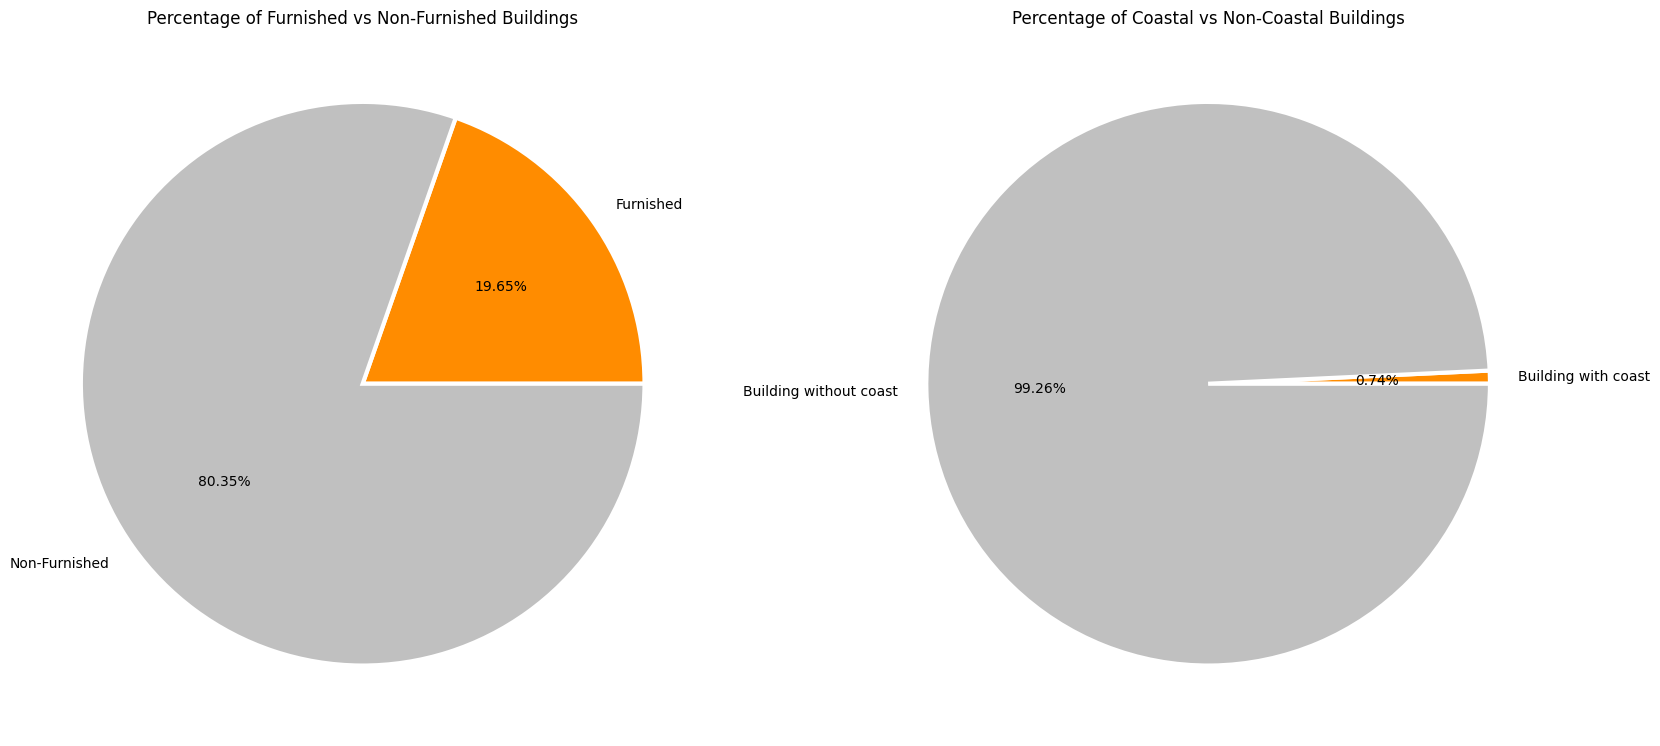

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(20, 20)

are_furnished = filtered_df.furnished.value_counts()[True]
non_furnished = filtered_df.furnished.value_counts()[False]
fur_names = ['Furnished', 'Non-Furnished']
fur_size = [are_furnished, non_furnished]

have_coast = filtered_df.coast.value_counts()[True]
not_have_coast = filtered_df.coast.value_counts()[False]
coast_names = ['Building with coast', 'Building without coast']
coast_size = [have_coast, not_have_coast]

axes[0].set_title('Percentage of Furnished vs Non-Furnished Buildings')
axes[0].pie(x=fur_size, labels=fur_names, colors=['darkorange', 'silver'], autopct='%.2f%%', wedgeprops={ 'linewidth': 3, 'edgecolor': 'white' })
axes[1].set_title('Percentage of Coastal vs Non-Coastal Buildings')
axes[1].pie(x=coast_size, labels=coast_names, colors=['darkorange', 'silver'], autopct='%.2f%%', wedgeprops={ 'linewidth': 3, 'edgecolor': 'white' })

plt.show()

### Bathroom Distribution

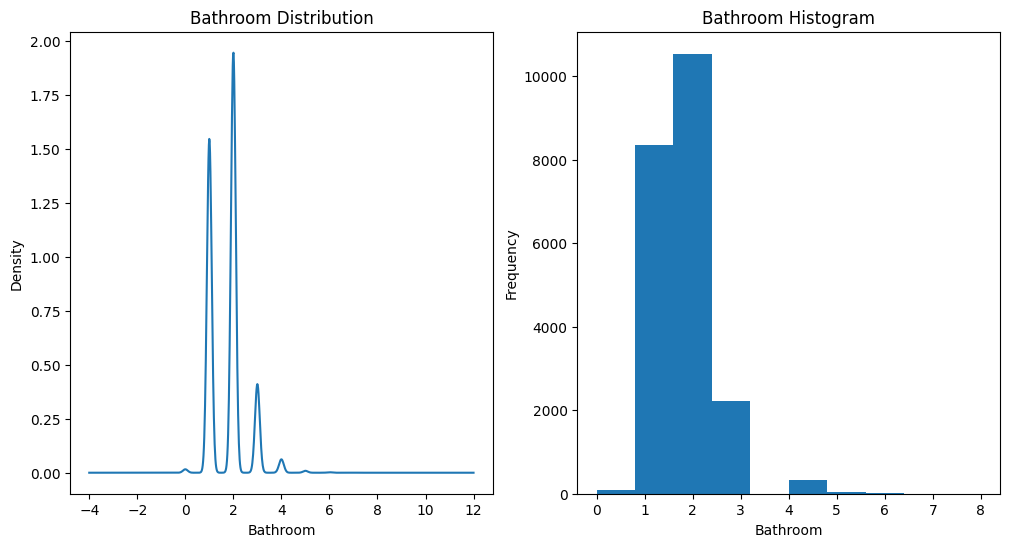

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(12, 6)

filtered_df['room_bath'].plot(kind='density', ax=axes[0], title='Bathroom Distribution').set_xlabel("Bathroom")
filtered_df['room_bath'].plot(kind='hist', ax=axes[1], title='Bathroom Histogram').set_xlabel("Bathroom")

plt.show()

### Bedroom Distribution

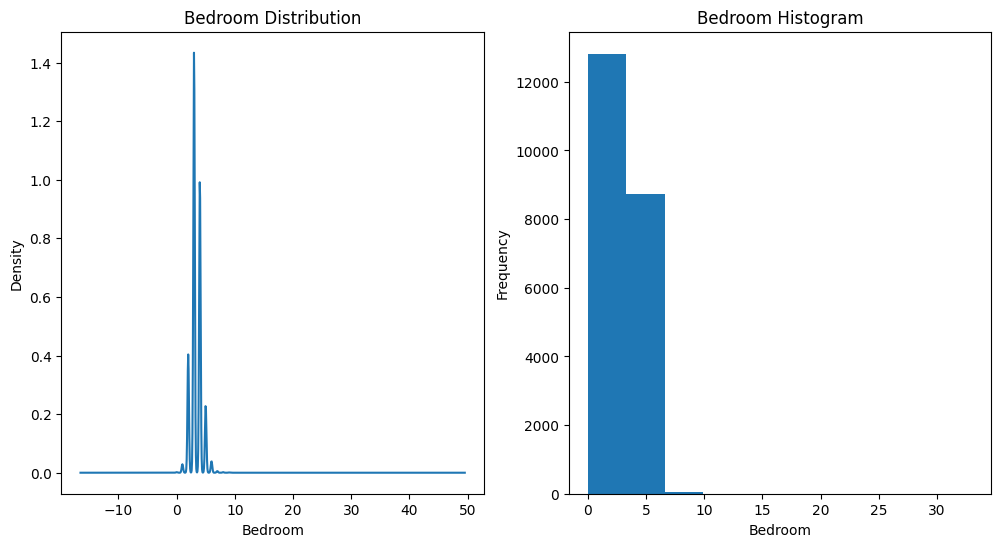

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(12, 6)

filtered_df['room_bed'].plot(kind='density', ax=axes[0], title='Bedroom Distribution').set_xlabel("Bedroom")
filtered_df['room_bed'].plot(kind='hist', ax=axes[1], title='Bedroom Histogram').set_xlabel("Bedroom")

plt.show()

### Ceil Distribution

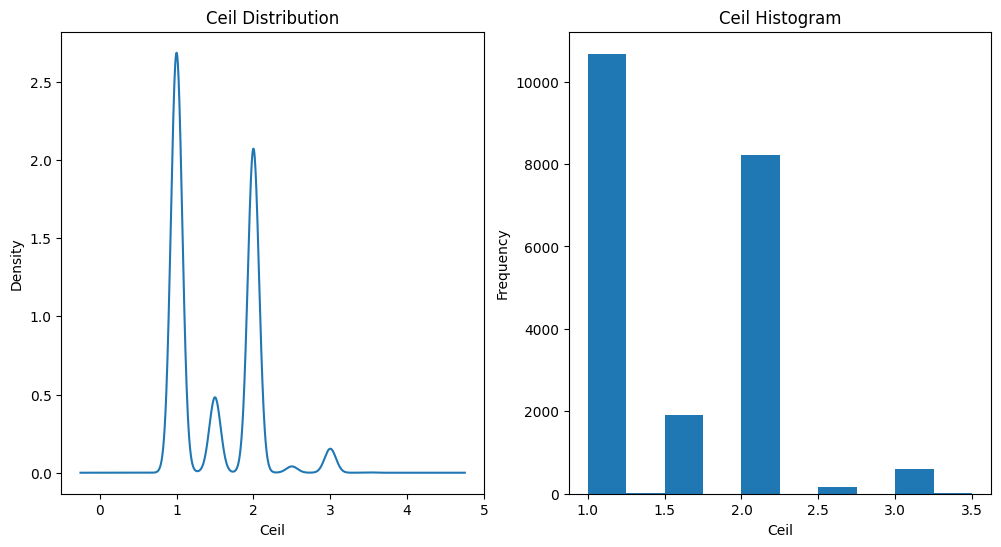

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(12, 6)

filtered_df['ceil'].plot(kind='density', ax=axes[0], title='Ceil Distribution').set_xlabel("Ceil")
filtered_df['ceil'].plot(kind='hist', ax=axes[1], title='Ceil Histogram').set_xlabel("Ceil")

plt.show()

### Coast Distribution

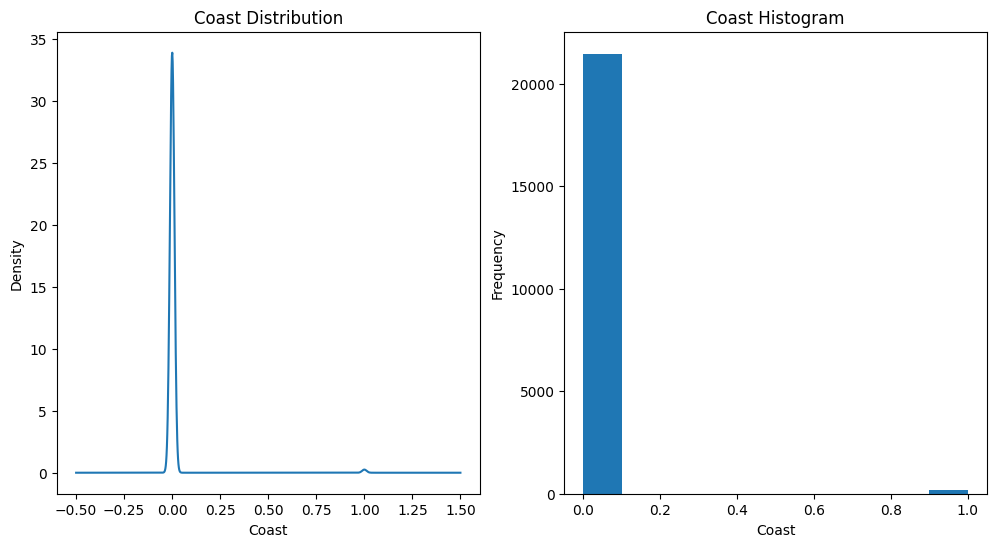

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(12, 6)

filtered_df['coast'].astype(int).plot(kind='density', ax=axes[0], title='Coast Distribution').set_xlabel("Coast")
filtered_df['coast'].astype(int).plot(kind='hist', ax=axes[1], title='Coast Histogram').set_xlabel("Coast")

plt.show()

### Condition Distribution

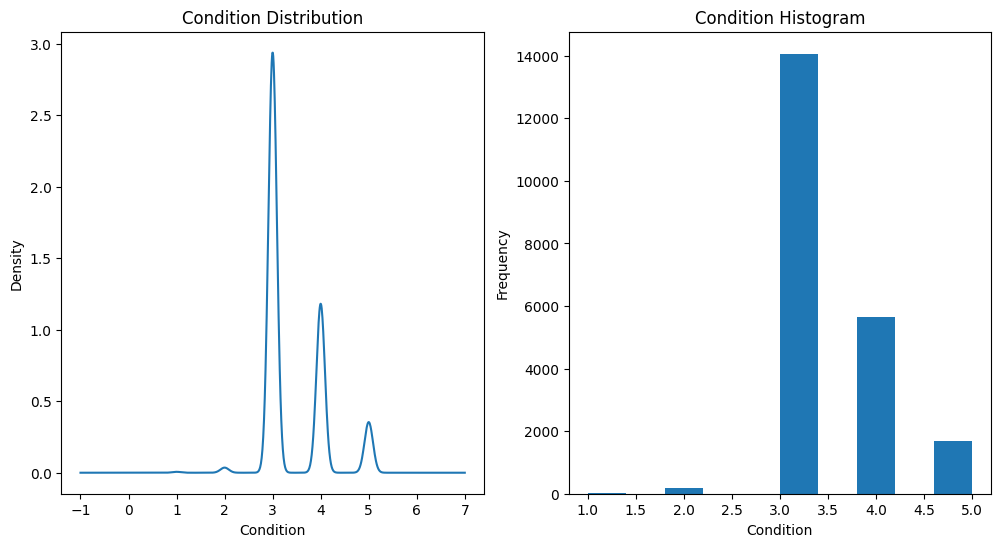

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(12, 6)

filtered_df['condition'].plot(kind='density', ax=axes[0], title='Condition Distribution').set_xlabel("Condition")
filtered_df['condition'].plot(kind='hist', ax=axes[1], title='Condition Histogram').set_xlabel("Condition")

plt.show()

### Furnished Distribution

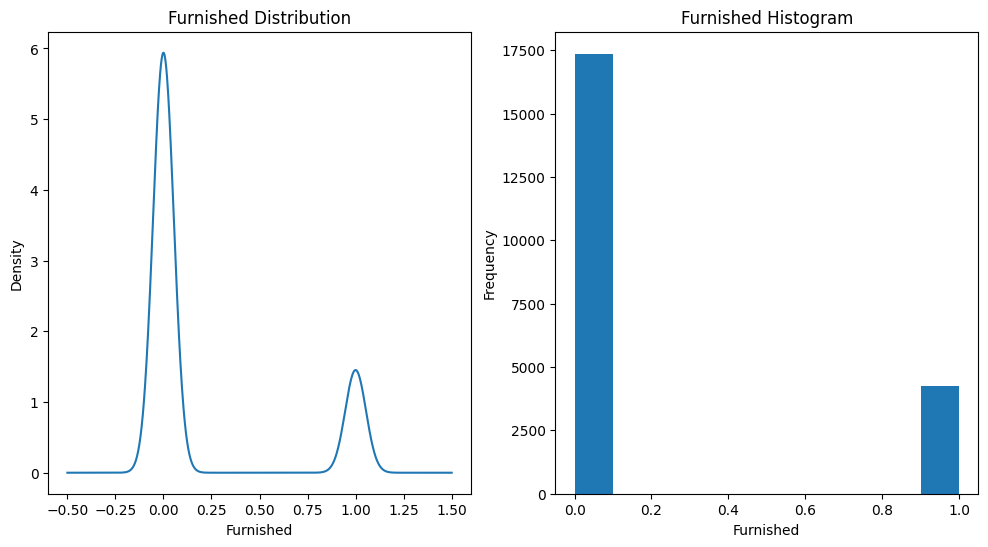

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(12, 6)

filtered_df['furnished'].astype(int).plot(kind='density', ax=axes[0], title='Furnished Distribution').set_xlabel("Furnished")
filtered_df['furnished'].astype(int).plot(kind='hist', ax=axes[1], title='Furnished Histogram').set_xlabel("Furnished")

plt.show()

### Quality Distribution

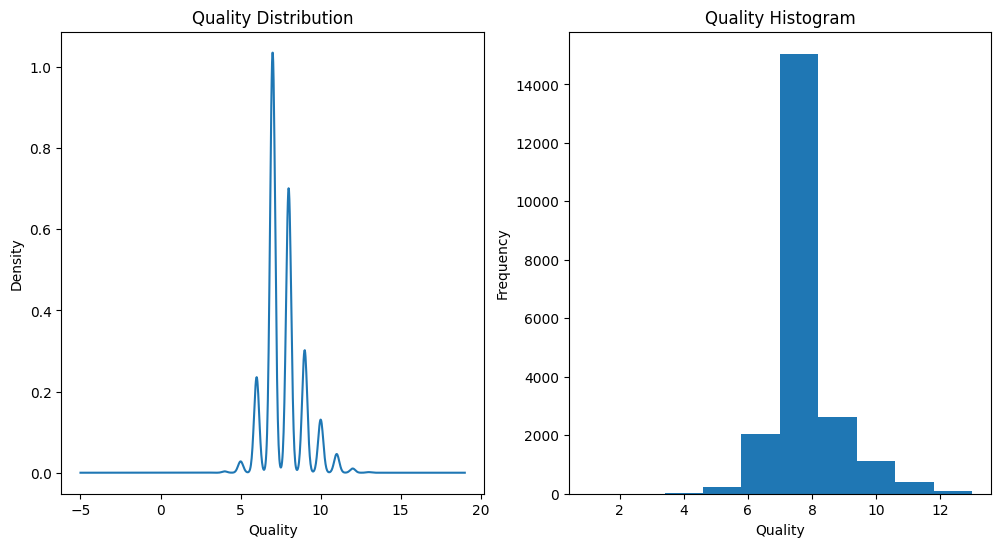

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(12, 6)

filtered_df['quality'].plot(kind='density', ax=axes[0], title='Quality Distribution').set_xlabel("Quality")
filtered_df['quality'].plot(kind='hist', ax=axes[1], title='Quality Histogram').set_xlabel("Quality")

plt.show()

### Living Measure Distribution

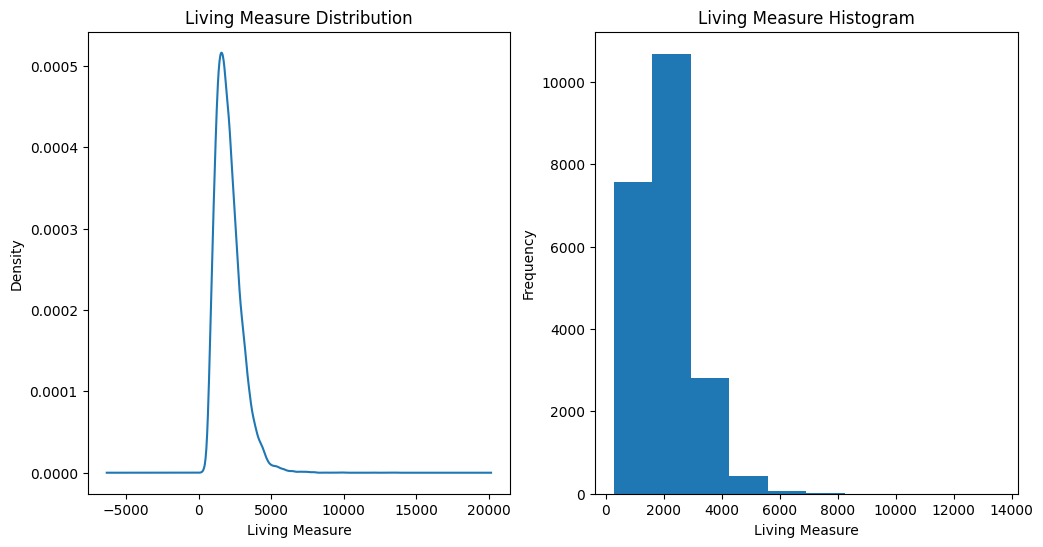

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(12, 6)

filtered_df['living_measure'].plot(kind='density', ax=axes[0], title='Living Measure Distribution').set_xlabel("Living Measure")
filtered_df['living_measure'].plot(kind='hist', ax=axes[1], title='Living Measure Histogram').set_xlabel("Living Measure")

plt.show()

### Lot Measure Distribution

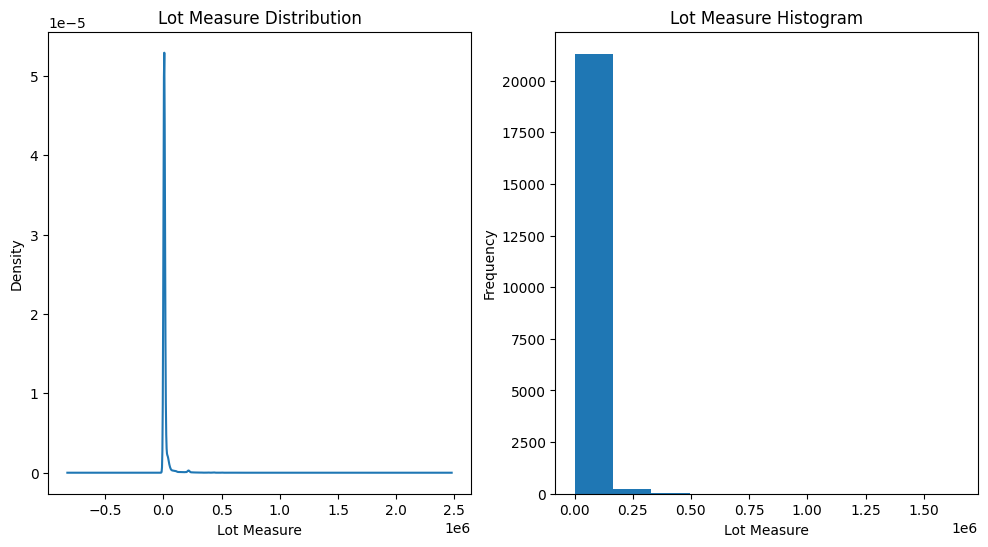

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(12, 6)

filtered_df['lot_measure'].plot(kind='density', ax=axes[0], title='Lot Measure Distribution').set_xlabel("Lot Measure")
filtered_df['lot_measure'].plot(kind='hist', ax=axes[1], title='Lot Measure Histogram').set_xlabel("Lot Measure")

plt.show()

### Sight Distribution

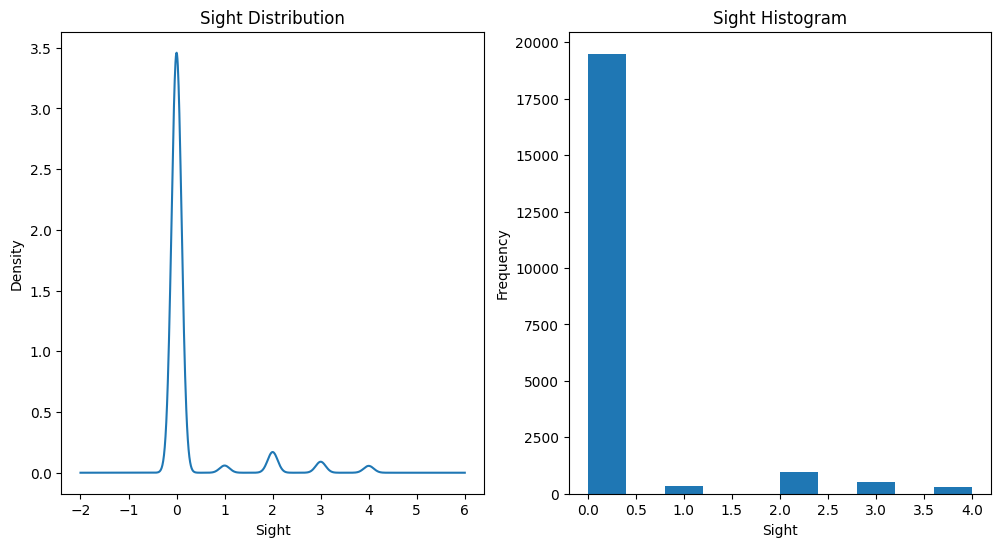

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(12, 6)

filtered_df['sight'].plot(kind='density', ax=axes[0], title='Sight Distribution').set_xlabel("Sight")
filtered_df['sight'].plot(kind='hist', ax=axes[1], title='Sight Histogram').set_xlabel("Sight")

plt.show()

### Basement Distribution

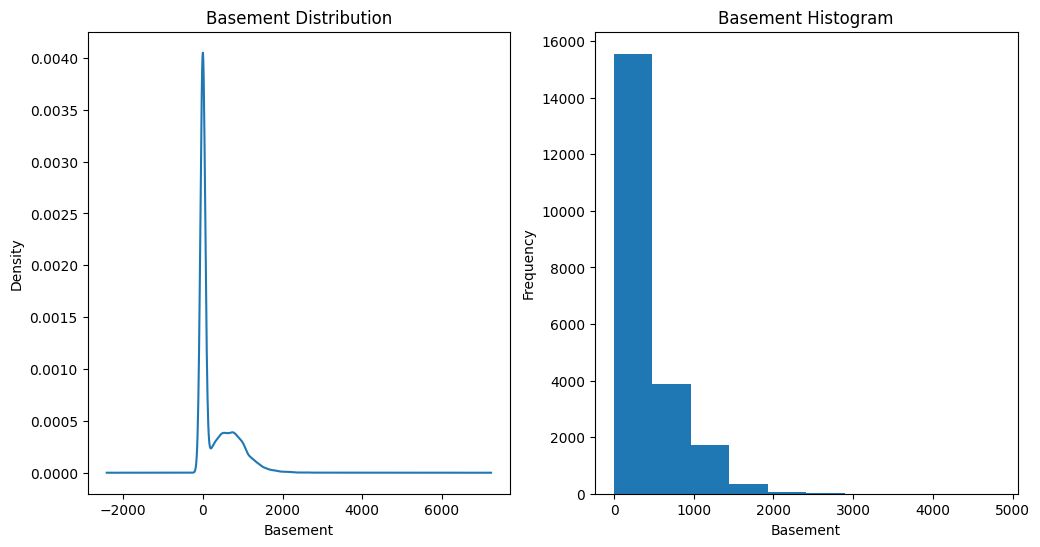

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(12, 6)

filtered_df['basement'].plot(kind='density', ax=axes[0], title='Basement Distribution').set_xlabel("Basement")
filtered_df['basement'].plot(kind='hist', ax=axes[1], title='Basement Histogram').set_xlabel("Basement")

plt.show()

### Year Built Distribution

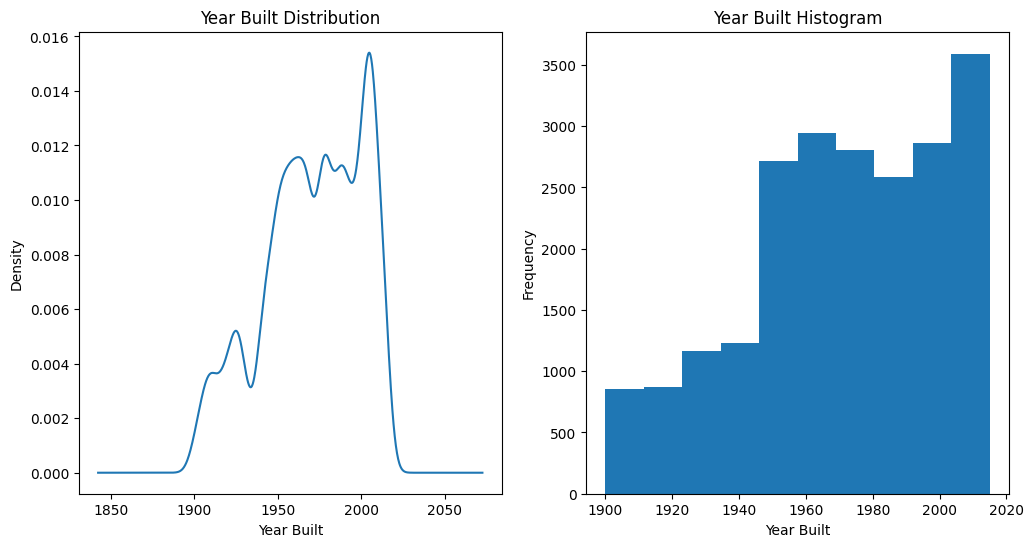

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(12, 6)

filtered_df['yr_built'].plot(kind='density', ax=axes[0], title='Year Built Distribution').set_xlabel("Year Built")
filtered_df['yr_built'].plot(kind='hist', ax=axes[1], title='Year Built Histogram').set_xlabel("Year Built")

plt.show()

### Living Measure 15 Distribution

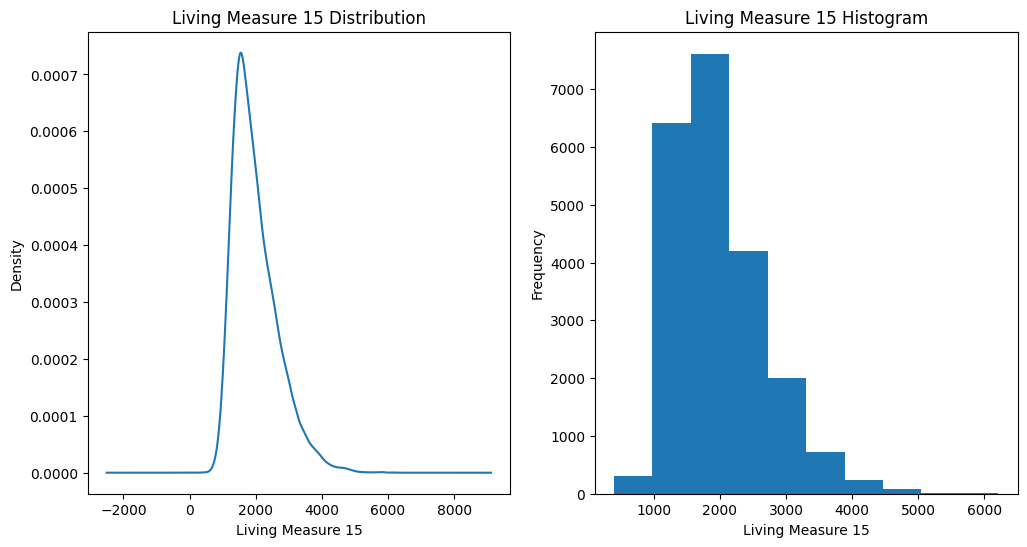

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(12, 6)

filtered_df['living_measure15'].plot(kind='density', ax=axes[0], title='Living Measure 15 Distribution').set_xlabel("Living Measure 15")
filtered_df['living_measure15'].plot(kind='hist', ax=axes[1], title='Living Measure 15 Histogram').set_xlabel("Living Measure 15")

plt.show()

### Lot Measure15 Distribution

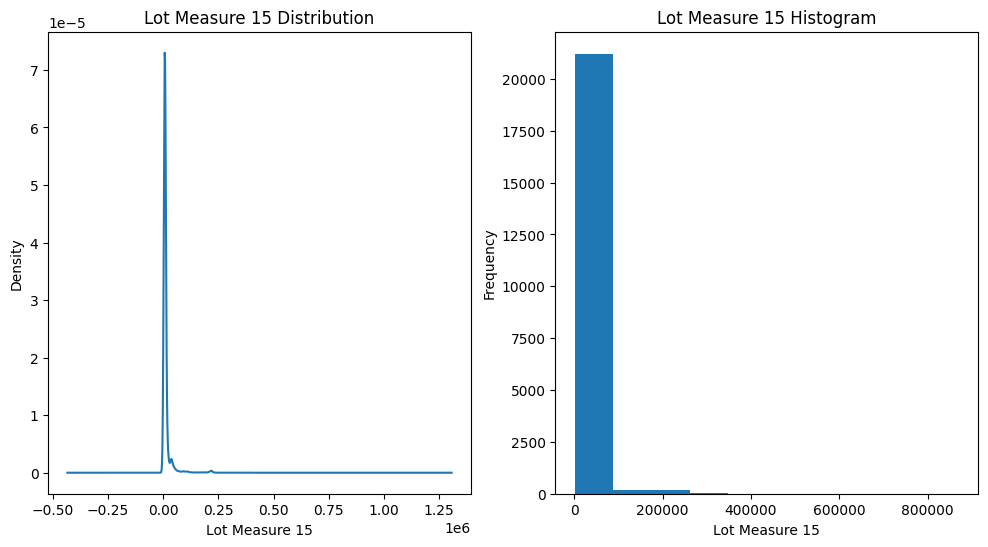

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(12, 6)

filtered_df['lot_measure15'].plot(kind='density', ax=axes[0], title='Lot Measure 15 Distribution').set_xlabel("Lot Measure 15")
filtered_df['lot_measure15'].plot(kind='hist', ax=axes[1], title='Lot Measure 15 Histogram').set_xlabel("Lot Measure 15")

plt.show()

### Total Area Distribution

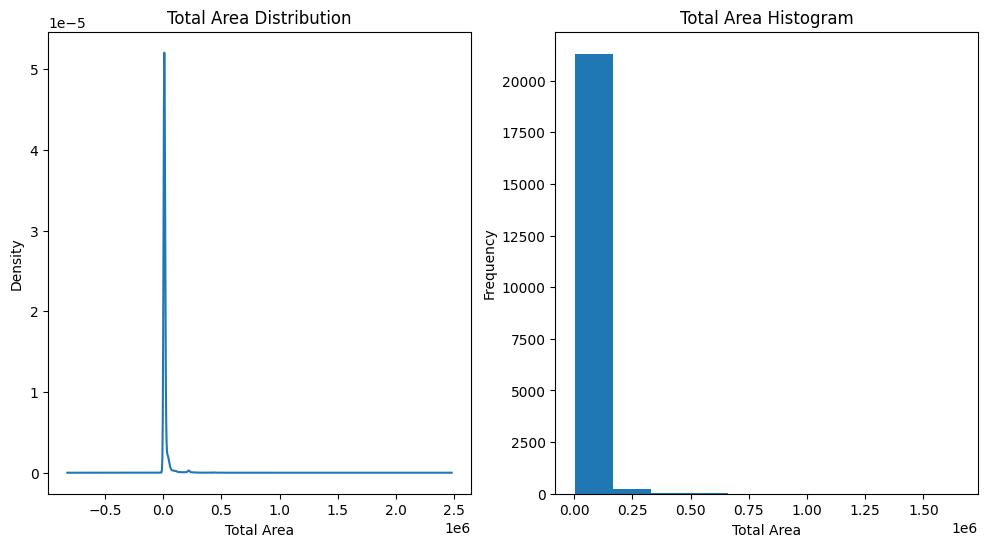

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(12, 6)

filtered_df['total_area'].plot(kind='density', ax=axes[0], title='Total Area Distribution').set_xlabel("Total Area")
filtered_df['total_area'].plot(kind='hist', ax=axes[1], title='Total Area Histogram').set_xlabel("Total Area")

plt.show()

### Zipcode Distribution

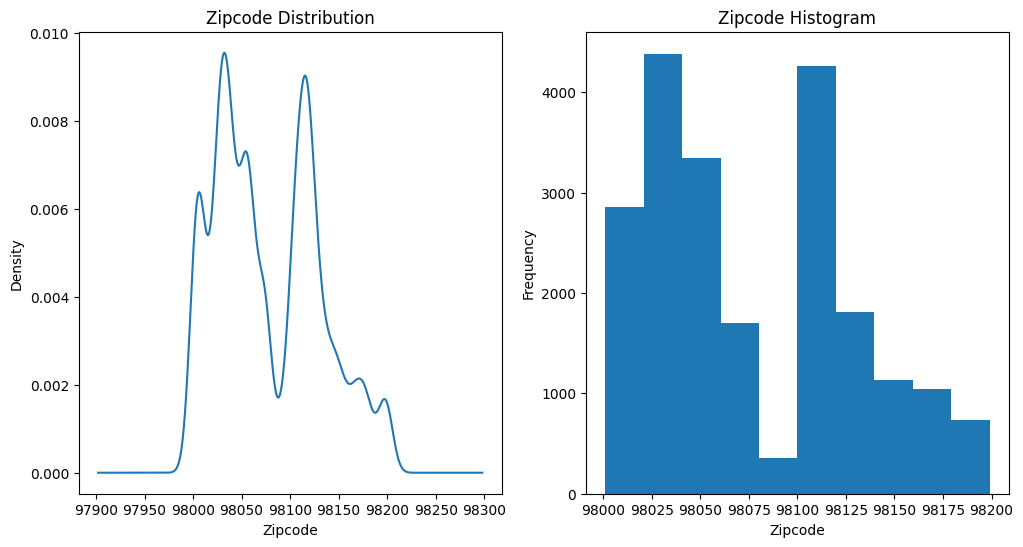

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(12, 6)

filtered_df['zipcode'].plot(kind='density', ax=axes[0], title='Zipcode Distribution').set_xlabel("Zipcode")
filtered_df['zipcode'].plot(kind='hist', ax=axes[1], title='Zipcode Histogram').set_xlabel("Zipcode")

plt.show()

### Price Distribution

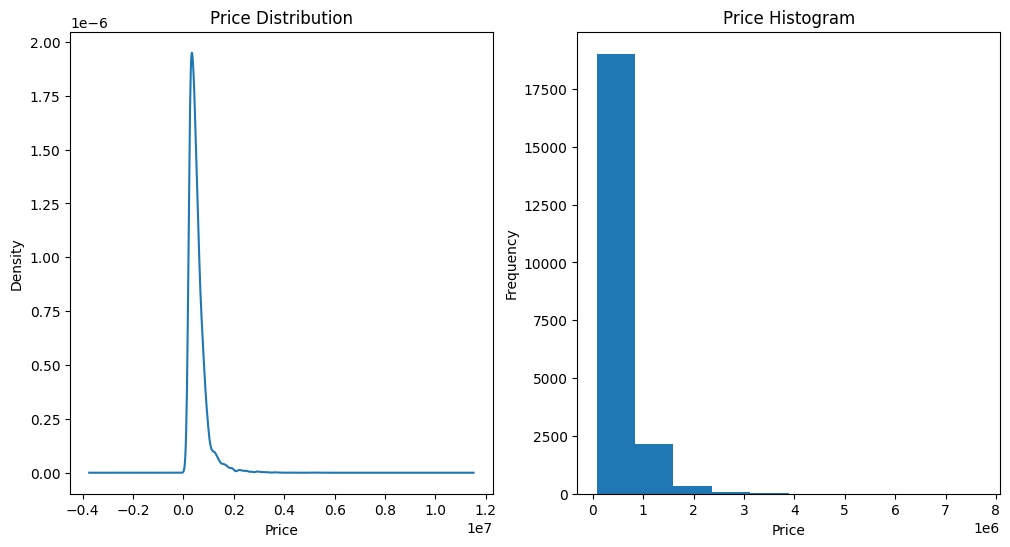

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(12, 6)

filtered_df['price'].plot(kind='density', ax=axes[0], title='Price Distribution').set_xlabel("Price")
filtered_df['price'].plot(kind='hist', ax=axes[1], title='Price Histogram').set_xlabel("Price")

plt.show()

### Latitude Distribution

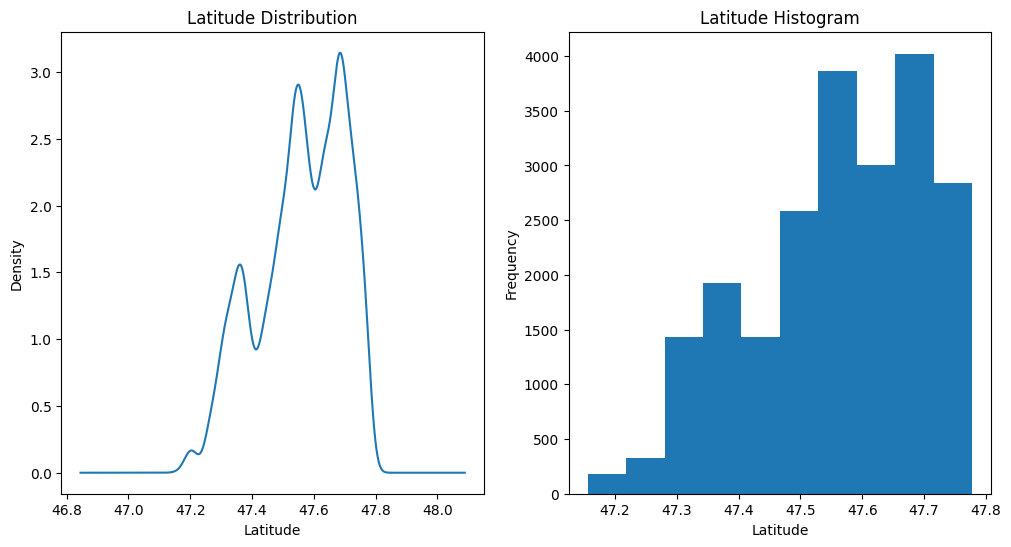

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(12, 6)

filtered_df['lat'].plot(kind='density', ax=axes[0], title='Latitude Distribution').set_xlabel("Latitude")
filtered_df['lat'].plot(kind='hist', ax=axes[1], title='Latitude Histogram').set_xlabel("Latitude")

plt.show()

### Longitude Distribution

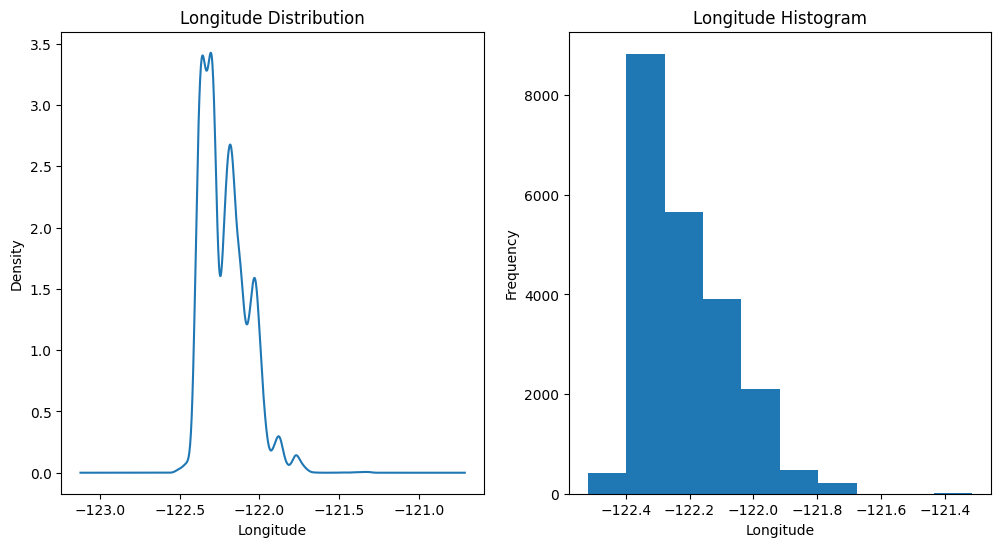

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(12, 6)

filtered_df['long'].plot(kind='density', ax=axes[0], title='Longitude Distribution').set_xlabel("Longitude")
filtered_df['long'].plot(kind='hist', ax=axes[1], title='Longitude Histogram').set_xlabel("Longitude")

plt.show()

### Year Build Distribution

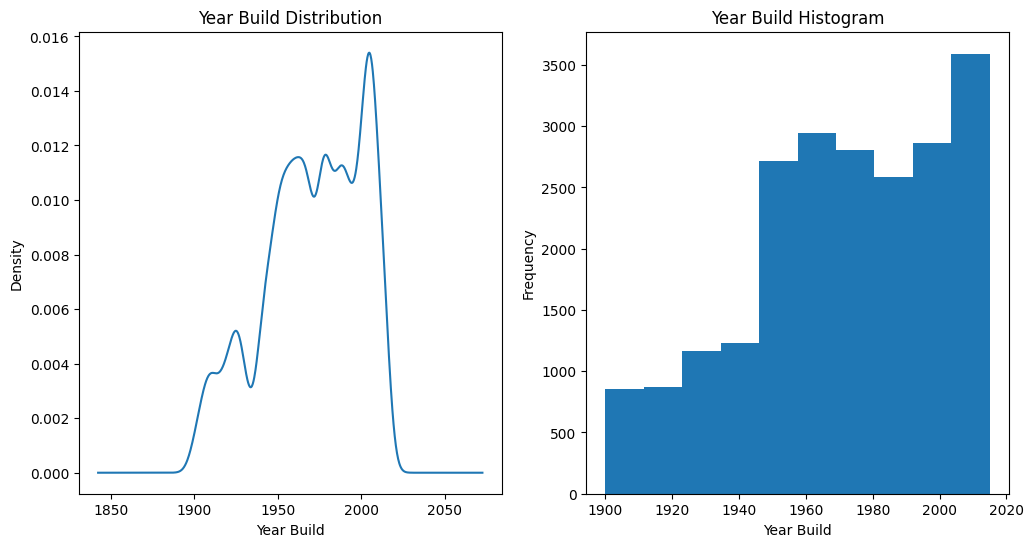

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(12, 6)

filtered_df['yr_built'].plot(kind='density', ax=axes[0], title='Year Build Distribution').set_xlabel("Year Build")
filtered_df['yr_built'].plot(kind='hist', ax=axes[1], title='Year Build Histogram').set_xlabel("Year Build")

plt.show()

## Bi-Varient Categorical Data Graph

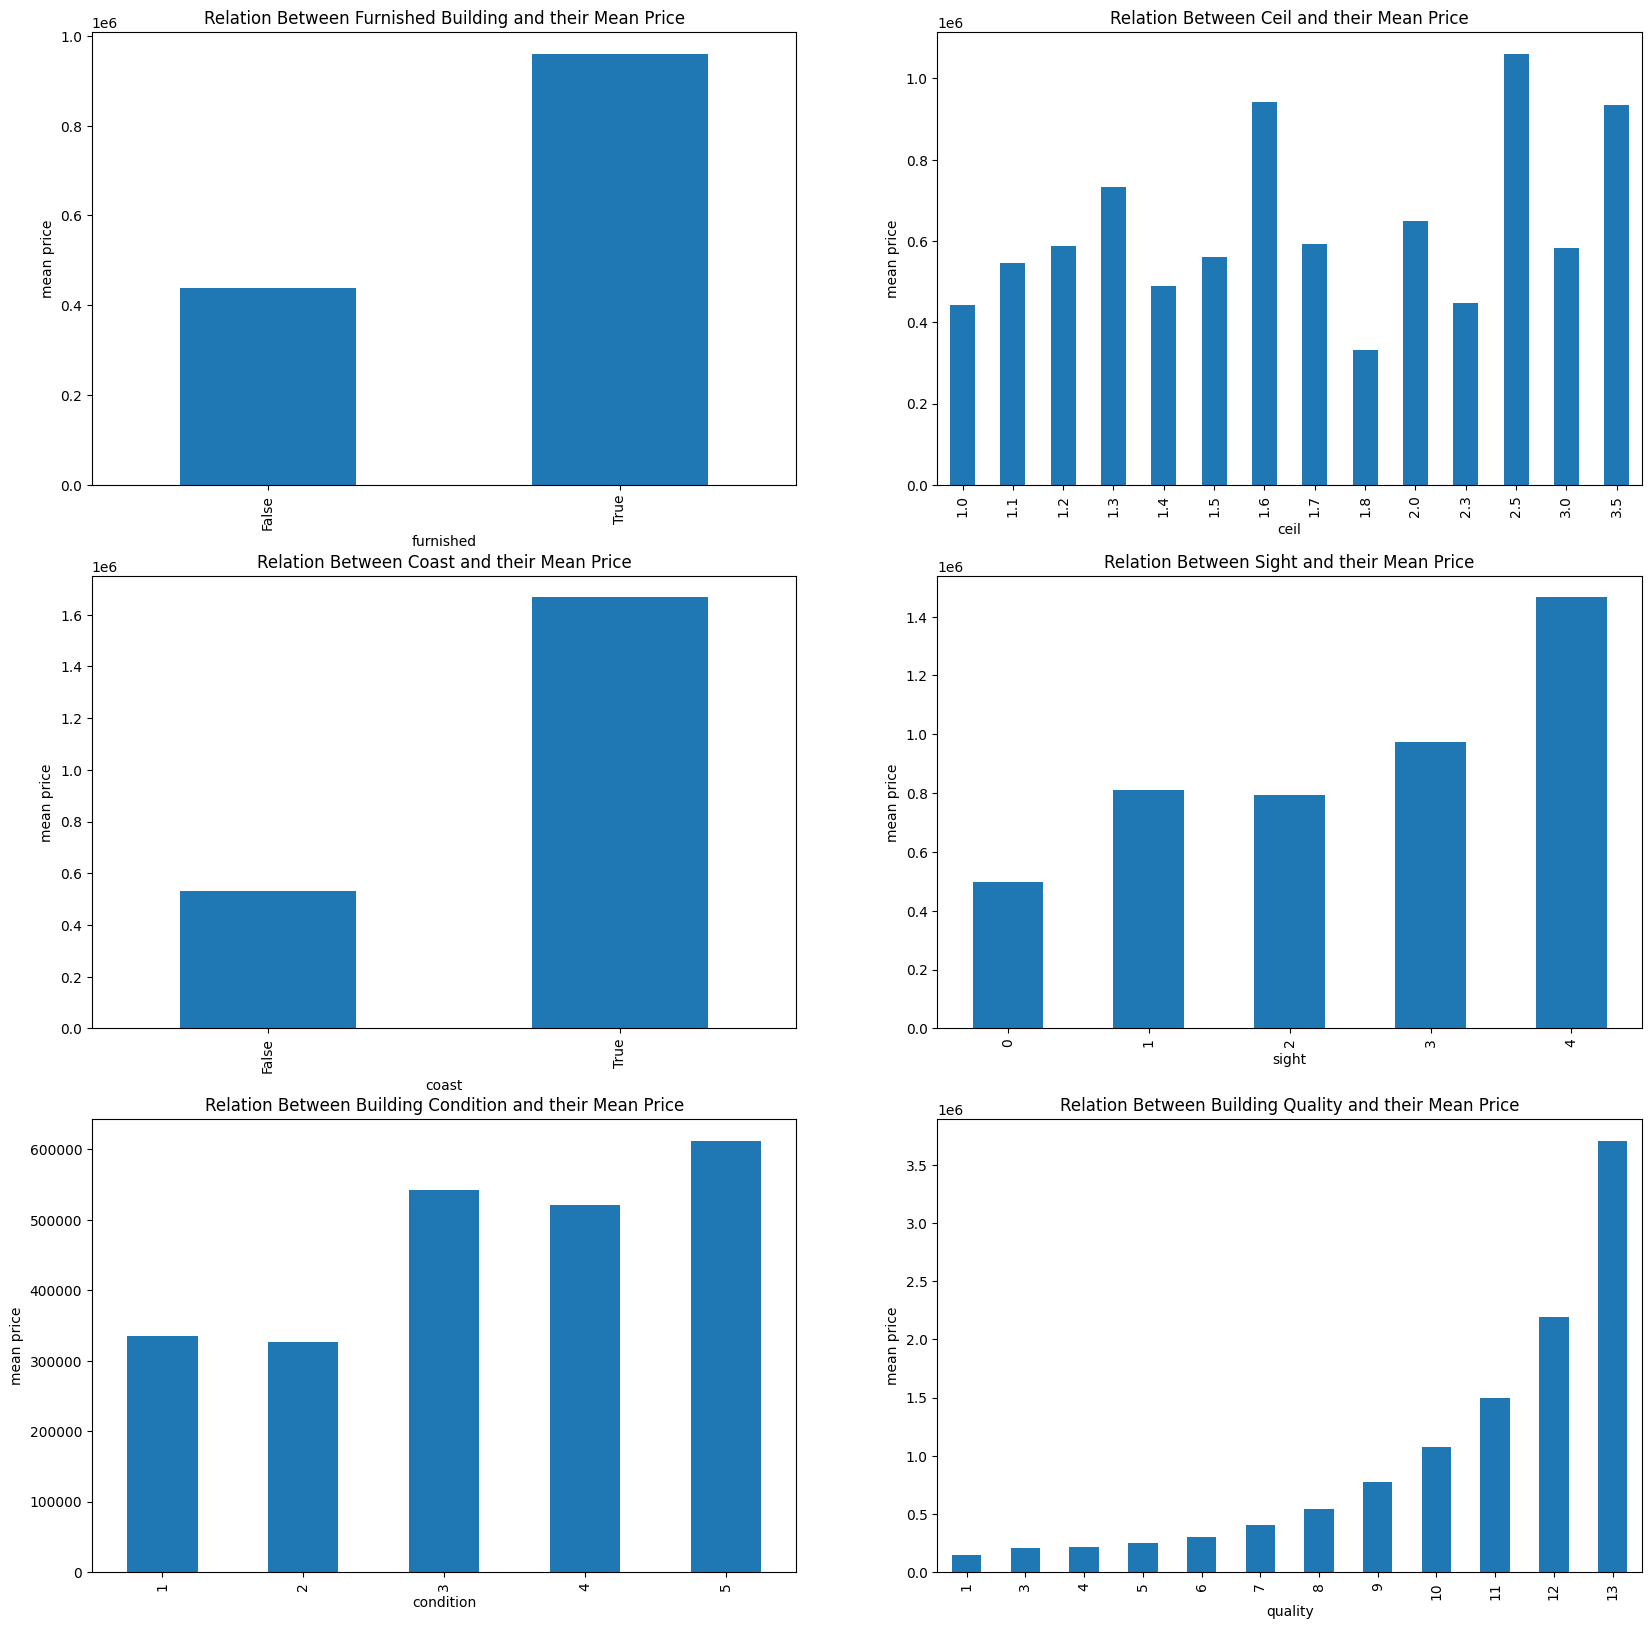

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_size_inches(20, 20)

filtered_df.groupby('furnished')['price'].mean().plot(kind='bar', ylabel='mean price', title='Relation Between Furnished Building and their Mean Price', ax=axes[0][0])
filtered_df.groupby('ceil')['price'].mean().plot(kind='bar', ylabel='mean price', title='Relation Between Ceil and their Mean Price', ax=axes[0][1])
filtered_df.groupby('coast')['price'].mean().plot(kind='bar', ylabel='mean price', title='Relation Between Coast and their Mean Price', ax=axes[1][0])
filtered_df.groupby('sight')['price'].mean().plot(kind='bar', ylabel='mean price', title='Relation Between Sight and their Mean Price', ax=axes[1][1])
filtered_df.groupby('condition')['price'].mean().plot(kind='bar', ylabel='mean price', title='Relation Between Building Condition and their Mean Price', ax=axes[2][0])
filtered_df.groupby('quality')['price'].mean().plot(kind='bar', ylabel='mean price', title='Relation Between Building Quality and their Mean Price', ax=axes[2][1])

plt.show()

## Multi-Varient Clustering Data Graphs

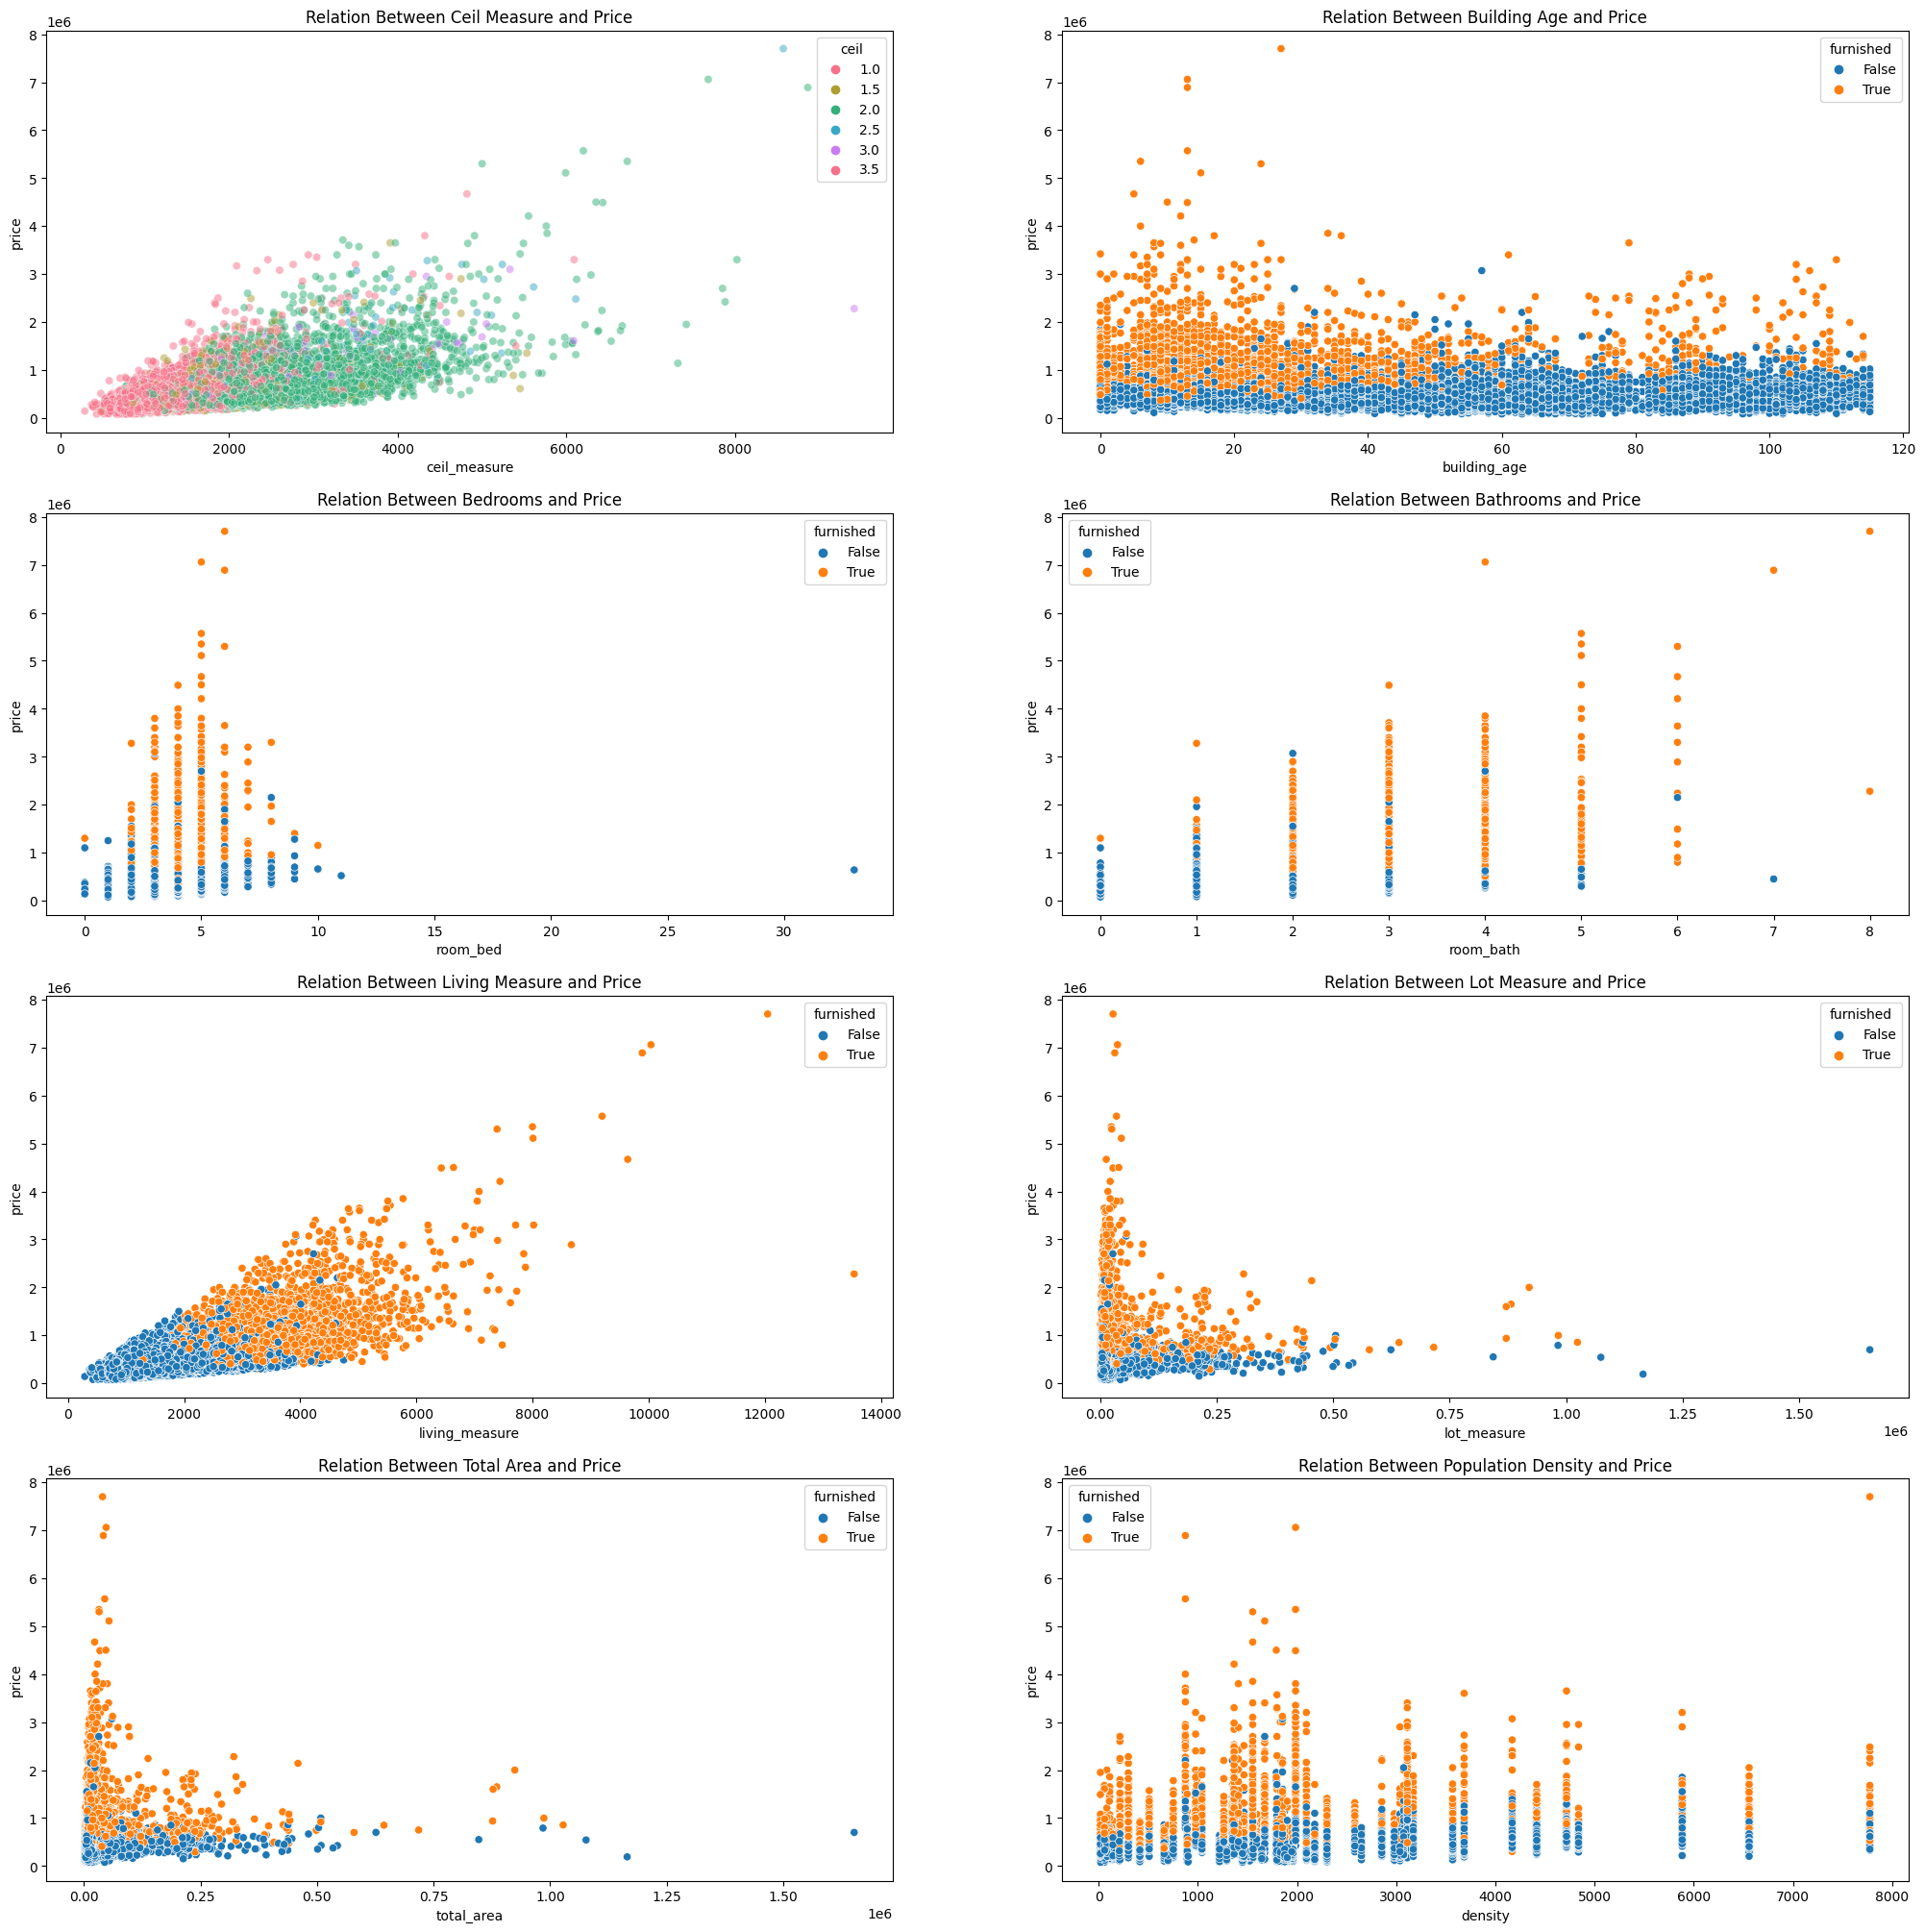

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=2)
fig.set_size_inches(25, 25)

sns.scatterplot(data=filtered_df, x='ceil_measure', y='price', hue='ceil', palette='husl', alpha=0.5,  ax=axes[0][0]).set_title('Relation Between Ceil Measure and Price')
sns.scatterplot(data=filtered_df, x='building_age', y='price', hue='furnished', ax=axes[0][1]).set_title('Relation Between Building Age and Price')
sns.scatterplot(data=filtered_df, x='room_bed', y='price', hue='furnished', ax=axes[1][0]).set_title('Relation Between Bedrooms and Price')
sns.scatterplot(data=filtered_df, x='room_bath', y='price', hue='furnished', ax=axes[1][1]).set_title('Relation Between Bathrooms and Price')
sns.scatterplot(data=filtered_df, x='living_measure', y='price', hue='furnished', ax=axes[2][0]).set_title('Relation Between Living Measure and Price')
sns.scatterplot(data=filtered_df, x='lot_measure', y='price', hue='furnished', ax=axes[2][1]).set_title('Relation Between Lot Measure and Price')
sns.scatterplot(data=filtered_df, x='total_area', y='price', hue='furnished', ax=axes[3][0]).set_title('Relation Between Total Area and Price')
sns.scatterplot(data=filtered_df, x='density', y='price', hue='furnished', ax=axes[3][1]).set_title('Relation Between Population Density and Price')

plt.show()

## Correlation Graph

<ipython-input-133-631bbd420f65>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = filtered_df.corr()['price'].drop('price').sort_values(ascending=False)


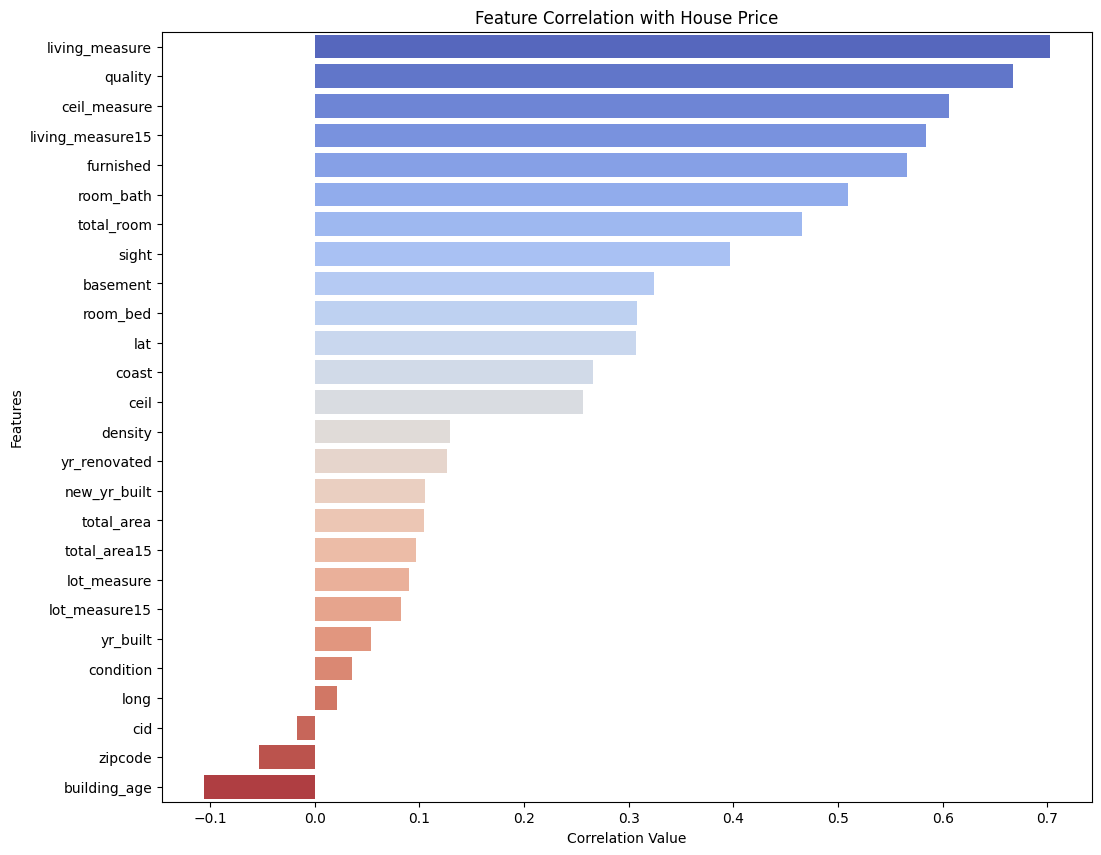

In [ ]:
# Calculate the correlation of each feature with the target variable 'price'
correlations = filtered_df.corr()['price'].drop('price').sort_values(ascending=False)

# Plot the correlations
plt.figure(figsize=(12, 10))
sns.barplot(x=correlations.values, y=correlations.index, palette='coolwarm')
plt.title('Feature Correlation with House Price')
plt.xlabel('Correlation Value')
plt.ylabel('Features')
plt.show()

## Correlation Heatmap

In [ ]:
for column in ['cid', 'dayhours',  'price', 'yr_renovated']:
    init_columns.remove(column)

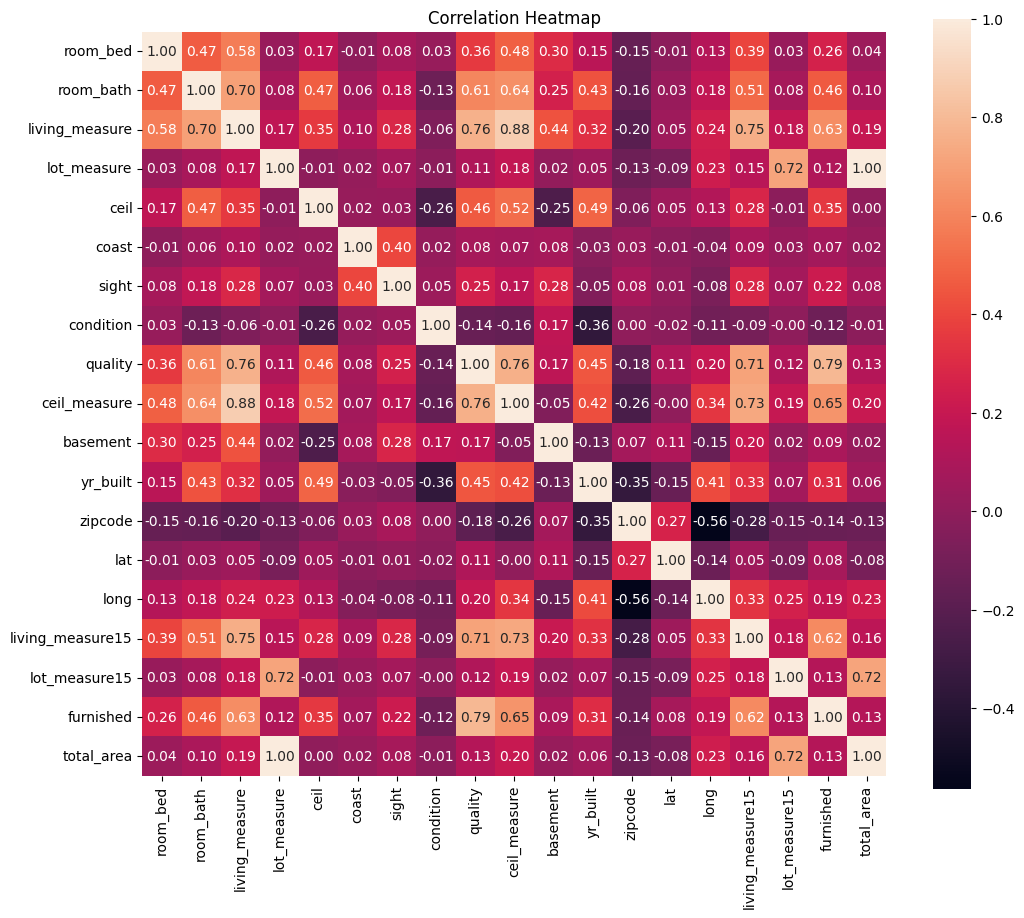

In [ ]:
# Set the figure size and create the heatmap
correlation_matrix = filtered_df[init_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cbar=True, square=True, fmt='.2f')

plt.title('Correlation Heatmap')
plt.show()

In [ ]:
corr_col = filtered_df.columns.tolist()
[corr_col.remove(column) for column in ['cid', 'dayhours', 'dayhours_month', 'dayhours_day', 'price', 'yr_renovated', 'city', 'state', 'state_code']]
corr_col

['dayhours_year',
 'room_bed',
 'room_bath',
 'living_measure',
 'lot_measure',
 'ceil',
 'coast',
 'sight',
 'condition',
 'quality',
 'ceil_measure',
 'basement',
 'yr_built',
 'new_yr_built',
 'building_age',
 'density',
 'zipcode',
 'lat',
 'long',
 'living_measure15',
 'lot_measure15',
 'furnished',
 'total_area',
 'total_area15',
 'total_room']

<ipython-input-137-09838f1edf2e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = filtered_df[corr_col].corr()


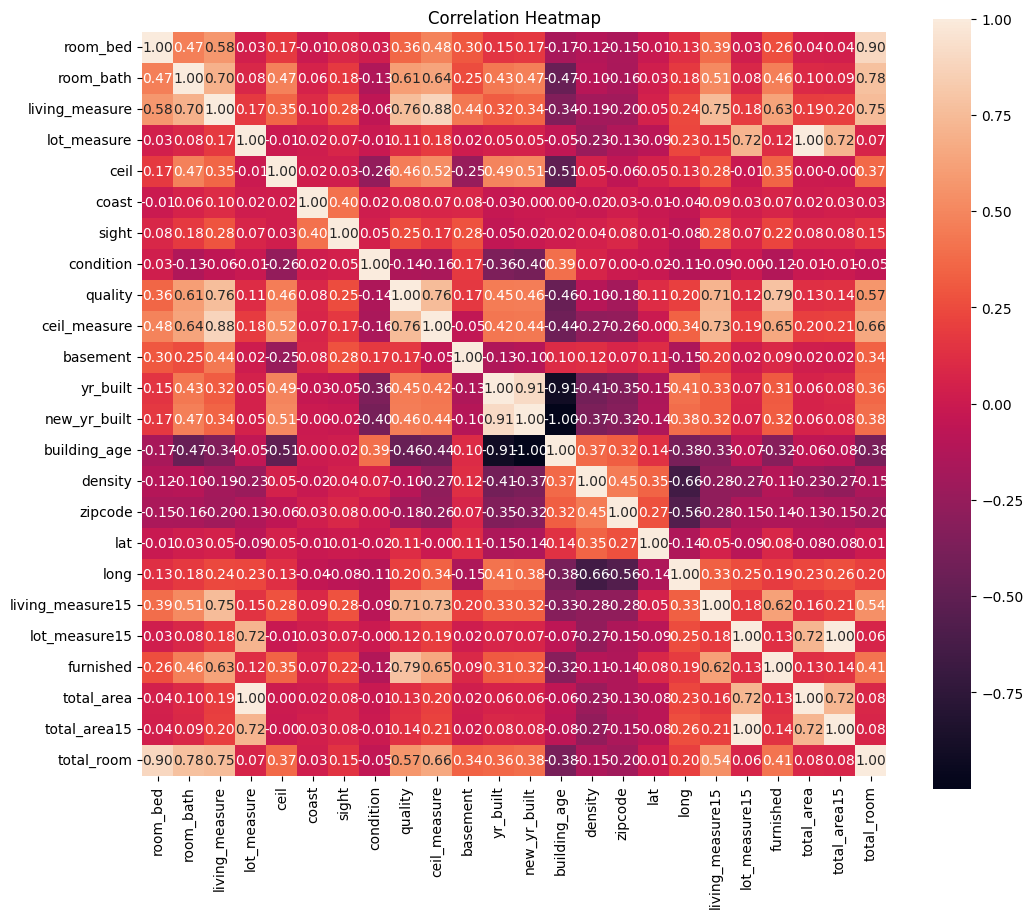

In [ ]:
# Set the figure size and create the heatmap
correlation_matrix = filtered_df[corr_col].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cbar=True, square=True, fmt='.2f')

plt.title('Correlation Heatmap')
plt.show()

# Model Training

In [ ]:
for col in filtered_df.columns.tolist():
    if any(filtered_df['cid'].isna()):
        print(col, any(filtered_df['cid'].isna()))

In [ ]:
filtered_df.head()

cid         dayhours dayhours_year dayhours_month dayhours_day  \
0  3876100940  20150427T000000          2015             04           27   
1  3145600250  20150317T000000          2015             03           17   
2  7129303070  20140820T000000          2014             08           20   
3  7338220280  20141010T000000          2014             10           10   
4  7950300670  20150218T000000          2015             02           18   

    price  room_bed  room_bath  living_measure  lot_measure  ceil  coast  \
0  600000         4          1            3050         9440  1.00  False   
1  190000         2          1             670         3101  1.00  False   
2  735000         4          2            3040         2415  2.00   True   
3  257000         3          2            1740         3721  2.00  False   
4  450000         2          1            1120         4590  1.00  False   

   sight  condition  quality  ceil_measure  basement  yr_built  yr_renovated  \
0      0          3        8          1800      1250      1966             0   
1      0          4        6           670         0      1948             0   
2      4          3        8          3040         0      1966             0   
3      0          3        8          1740         0      2009             0   
4      0          3        7          1120         0      1924             0   

   new_yr_built  building_age      city       state state_code  density  \
0          1966            49  Kirkland  Washington         WA  1853.00   
1          1948            67   Seattle  Washington         WA  3037.80   
2          1966            48   Seattle  Washington         WA  3037.80   
3          2009             5    Auburn  Washington         WA  1797.10   
4          1924            91   Seattle  Washington         WA  3037.80   

   zipcode   lat    long  living_measure15  lot_measure15  furnished  \
0    98034 47.72 -122.18              2020           8660      False   
1    98118 47.55 -122.27              1660           4100      False   
2    98118 47.52 -122.26              2620           2433      False   
3    98002 47.34 -122.21              2030           3794      False   
4    98118 47.57 -122.28              1120           5100      False   

   total_area  total_area15  total_room  
0       12490      10680.00        5.75  
1        3771       5760.00        3.00  
2        5455       5053.00        6.75  
3        5461       5824.00        5.50  
4        5710       6220.00        3.00

In [ ]:
# train = int_room_bath_df.drop(['cid', 'dayhours', 'dayhours_year', 'dayhours_month', 'dayhours_day', 'price', 'yr_built', 'yr_renovated', 'new_yr_built', 'city', 'state', 'state_code', 'zipcode', 'lat', 'long'], axis=1)
X = filtered_df.drop(columns=['cid', 'dayhours', 'dayhours_year', 'dayhours_month', 'dayhours_day', 'price', 'yr_built', 'yr_renovated', 'new_yr_built', 'building_age', 'city', 'state', 'state_code', 'lat', 'long', 'zipcode', 'total_area', 'total_area15', 'total_room'], axis=1)
y = filtered_df[['price']]

In [ ]:
X.head()

room_bed  room_bath  living_measure  lot_measure  ceil  coast  sight  \
0         4          1            3050         9440  1.00  False      0   
1         2          1             670         3101  1.00  False      0   
2         4          2            3040         2415  2.00   True      4   
3         3          2            1740         3721  2.00  False      0   
4         2          1            1120         4590  1.00  False      0   

   condition  quality  ceil_measure  basement  density  living_measure15  \
0          3        8          1800      1250  1853.00              2020   
1          4        6           670         0  3037.80              1660   
2          3        8          3040         0  3037.80              2620   
3          3        8          1740         0  1797.10              2030   
4          3        7          1120         0  3037.80              1120   

   lot_measure15  furnished  
0           8660      False  
1           4100      False  
2           2433      False  
3           3794      False  
4           5100      False

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
# y_train = np.ravel(y_train)
model_df = pd.DataFrame(
                columns=[
                    'Model',
                    'R-squared (Train)',
                    'R-squared (Test)',
                    'Adjusted R-squared (Train)',
                    'Adjusted R-squared (Test)',
                    'Price_Median',
                    'MAE (Train)',
                    'MAE (Test)',
                    'MSE (Train)',
                    'MSE (Test)',
                    'RMSE (Train)',
                    'RMSE (Test)',
                    'Avg Prediction Error Rate (Train)',
                    'Avg Prediction Error Rate (Test)',
                ]
            )

train_n = len(y_train)
train_k = X_train.shape[1]

test_n = len(y_test)
test_k = X_test.shape[1]

## Linear Regressor Model

In [ ]:
linear_regr = LinearRegression()

linear_regr.fit(X_train, y_train)

y_linear_train_pred = linear_regr.predict(X_train)
y_linear_test_pred = linear_regr.predict(X_test)

r2_train = round(r2_score(y_train, y_linear_train_pred), 2)
r2_test = round(r2_score(y_test, y_linear_test_pred), 2)

midpoint = round((filtered_df['price'].min() + filtered_df['price'].max()) / 2, 2)

adj_train_score = round(1 - ((1 - r2_train) * (train_n - 1) / (train_n - train_k - 1)), 2)
adj_test_score = round(1 - ((1 - r2_test) * (test_n - 1) / (test_n - test_k - 1)), 2)

train_mse = round(mean_squared_error(y_train, y_linear_train_pred), 2)
test_mse = round(mean_squared_error(y_test, y_linear_test_pred), 2)

train_mae = round(mean_absolute_error(y_train, y_linear_train_pred), 2)
test_mae = round(mean_absolute_error(y_test, y_linear_test_pred), 2)

train_rmse = round(mean_squared_error(y_true=y_train, y_pred=y_linear_train_pred, squared=False), 2)
test_rmse = round(mean_squared_error(y_true=y_test, y_pred=y_linear_test_pred, squared=False), 2)

avg_train_pred_error_rate = round((train_rmse * 100) / midpoint, 2)
avg_test_pred_error_rate = round((test_rmse * 100) / midpoint, 2)

temp_df = pd.DataFrame(
    {
        'Model': 'Linear Regression',
        'R-squared (Train)': f'{r2_train}',
        'R-squared (Test)': f'{r2_test}',
        'Adjusted R-squared (Train)': f'{adj_train_score}',
        'Adjusted R-squared (Test)': f'{adj_test_score}',
        'Price_Median': f'{midpoint}',
        'MAE (Train)': f'{train_mae}',
        'MAE (Test)': f'{test_mae}',
        'MSE (Train)': f'{train_mse}',
        'MSE (Test)': f'{test_mse}',
        'RMSE (Train)': f'{train_rmse}',
        'RMSE (Test)': f'{test_rmse}',
        'Avg Prediction Error Rate (Train)': f'{avg_train_pred_error_rate}%',
        'Avg Prediction Error Rate (Test)': f'{avg_test_pred_error_rate}%'
    },
    index=[0]
)

model_df = pd.concat([model_df, temp_df])

print(f" Linear Regression ".center(50, '-'))
print(f'Training Score: {r2_train}')
print(f'Test Score: {r2_test}')

--------------- Linear Regression ----------------
Training Score: 0.67
Test Score: 0.66


## Decision Tree Regressor Model

In [ ]:
tree_regr = DecisionTreeRegressor()

tree_regr.fit(X_train, y_train)

y_tree_train_pred = tree_regr.predict(X_train)
y_tree_test_pred = tree_regr.predict(X_test)

r2_train = round(r2_score(y_train, y_tree_train_pred), 2)
r2_test = round(r2_score(y_test, y_tree_test_pred), 2)

midpoint = round((filtered_df['price'].min() + filtered_df['price'].max()) / 2, 2)

adj_train_score = round(1 - ((1 - r2_train) * (train_n - 1) / (train_n - train_k - 1)), 2)
adj_test_score = round(1 - ((1 - r2_test) * (test_n - 1) / (test_n - test_k - 1)), 2)

train_mse = round(mean_squared_error(y_train, y_tree_train_pred), 2)
test_mse = round(mean_squared_error(y_test, y_tree_test_pred), 2)

train_mae = round(mean_absolute_error(y_train, y_tree_train_pred), 2)
test_mae = round(mean_absolute_error(y_test, y_tree_test_pred), 2)

train_rmse = round(mean_squared_error(y_true=y_train, y_pred=y_tree_train_pred, squared=False), 2)
test_rmse = round(mean_squared_error(y_true=y_test, y_pred=y_tree_test_pred, squared=False), 2)

avg_train_pred_error_rate = round((train_rmse * 100) / midpoint, 2)
avg_test_pred_error_rate = round((test_rmse * 100) / midpoint, 2)

temp_df = pd.DataFrame(
    {
        'Model': 'Decision Tree Regression',
        'R-squared (Train)': f'{r2_train}',
        'R-squared (Test)': f'{r2_test}',
        'Adjusted R-squared (Train)': f'{adj_train_score}',
        'Adjusted R-squared (Test)': f'{adj_test_score}',
        'Price_Median': f'{midpoint}',
        'MAE (Train)': f'{train_mae}',
        'MAE (Test)': f'{test_mae}',
        'MSE (Train)': f'{train_mse}',
        'MSE (Test)': f'{test_mse}',
        'RMSE (Train)': f'{train_rmse}',
        'RMSE (Test)': f'{test_rmse}',
        'Avg Prediction Error Rate (Train)': f'{avg_train_pred_error_rate}%',
        'Avg Prediction Error Rate (Test)': f'{avg_test_pred_error_rate}%'
    },
    index=[0]
)

model_df = pd.concat([model_df, temp_df])

print(f" Decision Tree Regression ".center(50, '-'))
print(f'Training Score: {r2_train}')
print(f'Test Score: {r2_test}')

------------ Decision Tree Regression ------------
Training Score: 1.0
Test Score: 0.68


## ElasticNet Regressor Model

In [ ]:
elnt_regr = ElasticNet()

elnt_regr.fit(X_train, y_train)

y_elnt_train_pred = elnt_regr.predict(X_train)
y_elnt_test_pred = elnt_regr.predict(X_test)

r2_train = round(r2_score(y_train, y_elnt_train_pred), 2)
r2_test = round(r2_score(y_test, y_elnt_test_pred), 2)

midpoint = round((filtered_df['price'].min() + filtered_df['price'].max()) / 2, 2)

adj_train_score = round(1 - ((1 - r2_train) * (train_n - 1) / (train_n - train_k - 1)), 2)
adj_test_score = round(1 - ((1 - r2_test) * (test_n - 1) / (test_n - test_k - 1)), 2)

train_mse = round(mean_squared_error(y_train, y_elnt_train_pred), 2)
test_mse = round(mean_squared_error(y_test, y_elnt_test_pred), 2)

train_mae = round(mean_absolute_error(y_train, y_elnt_train_pred), 2)
test_mae = round(mean_absolute_error(y_test, y_elnt_test_pred), 2)

train_rmse = round(mean_squared_error(y_true=y_train, y_pred=y_elnt_train_pred, squared=False), 2)
test_rmse = round(mean_squared_error(y_true=y_test, y_pred=y_elnt_test_pred, squared=False), 2)

avg_train_pred_error_rate = round((train_rmse * 100) / midpoint, 2)
avg_test_pred_error_rate = round((test_rmse * 100) / midpoint, 2)

temp_df = pd.DataFrame(
    {
        'Model': 'ElasticNet Regression',
        'R-squared (Train)': f'{r2_train}',
        'R-squared (Test)': f'{r2_test}',
        'Adjusted R-squared (Train)': f'{adj_train_score}',
        'Adjusted R-squared (Test)': f'{adj_test_score}',
        'Price_Median': f'{midpoint}',
        'MAE (Train)': f'{train_mae}',
        'MAE (Test)': f'{test_mae}',
        'MSE (Train)': f'{train_mse}',
        'MSE (Test)': f'{test_mse}',
        'RMSE (Train)': f'{train_rmse}',
        'RMSE (Test)': f'{test_rmse}',
        'Avg Prediction Error Rate (Train)': f'{avg_train_pred_error_rate}%',
        'Avg Prediction Error Rate (Test)': f'{avg_test_pred_error_rate}%'
    },
    index=[0]
)

model_df = pd.concat([model_df, temp_df])

print(f" ElasticNet Regression ".center(50, '-'))
print(f'Training Score: {r2_train}')
print(f'Test Score: {r2_test}')

------------- ElasticNet Regression --------------
Training Score: 0.64
Test Score: 0.63


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.556e+14, tolerance: 2.394e+11
  model = cd_fast.enet_coordinate_descent(


## KNN Regressor Model

In [ ]:
knn_regr = KNeighborsRegressor()

knn_regr.fit(X_train, y_train)

y_knn_train_pred = knn_regr.predict(X_train)
y_knn_test_pred = knn_regr.predict(X_test)

r2_train = round(r2_score(y_train, y_knn_train_pred), 2)
r2_test = round(r2_score(y_test, y_knn_test_pred), 2)

midpoint = round((filtered_df['price'].min() + filtered_df['price'].max()) / 2, 2)

adj_train_score = round(1 - ((1 - r2_train) * (train_n - 1) / (train_n - train_k - 1)), 2)
adj_test_score = round(1 - ((1 - r2_test) * (test_n - 1) / (test_n - test_k - 1)), 2)

train_mse = round(mean_squared_error(y_train, y_knn_train_pred), 2)
test_mse = round(mean_squared_error(y_test, y_knn_test_pred), 2)

train_mae = round(mean_absolute_error(y_train, y_knn_train_pred), 2)
test_mae = round(mean_absolute_error(y_test, y_knn_test_pred), 2)

train_rmse = round(mean_squared_error(y_true=y_train, y_pred=y_knn_train_pred, squared=False), 2)
test_rmse = round(mean_squared_error(y_true=y_test, y_pred=y_knn_test_pred, squared=False), 2)

avg_train_pred_error_rate = round((train_rmse * 100) / midpoint, 2)
avg_test_pred_error_rate = round((test_rmse * 100) / midpoint, 2)

temp_df = pd.DataFrame(
    {
        'Model': 'KNN Regression',
        'R-squared (Train)': f'{r2_train}',
        'R-squared (Test)': f'{r2_test}',
        'Adjusted R-squared (Train)': f'{adj_train_score}',
        'Adjusted R-squared (Test)': f'{adj_test_score}',
        'Price_Median': f'{midpoint}',
        'MAE (Train)': f'{train_mae}',
        'MAE (Test)': f'{test_mae}',
        'MSE (Train)': f'{train_mse}',
        'MSE (Test)': f'{test_mse}',
        'RMSE (Train)': f'{train_rmse}',
        'RMSE (Test)': f'{test_rmse}',
        'Avg Prediction Error Rate (Train)': f'{avg_train_pred_error_rate}%',
        'Avg Prediction Error Rate (Test)': f'{avg_test_pred_error_rate}%'
    },
    index=[0]
)

model_df = pd.concat([model_df, temp_df])

print(f" KNN Regression ".center(50, '-'))
print(f'Training Score: {r2_train}')
print(f'Test Score: {r2_test}')

----------------- KNN Regression -----------------
Training Score: 0.72
Test Score: 0.61


## Random Forest Regressor Model

In [ ]:
randforst_regr = RandomForestRegressor()

randforst_regr.fit(X_train, np.ravel(y_train))

y_rand_train_pred = randforst_regr.predict(X_train)
y_rand_test_pred = randforst_regr.predict(X_test)

r2_train = round(r2_score(y_train, y_rand_train_pred), 2)
r2_test = round(r2_score(y_test, y_rand_test_pred), 2)

midpoint = round((filtered_df['price'].min() + filtered_df['price'].max()) / 2, 2)

adj_train_score = round(1 - ((1 - r2_train) * (train_n - 1) / (train_n - train_k - 1)), 2)
adj_test_score = round(1 - ((1 - r2_test) * (test_n - 1) / (test_n - test_k - 1)), 2)

train_mse = round(mean_squared_error(y_train, y_rand_train_pred), 2)
test_mse = round(mean_squared_error(y_test, y_rand_test_pred), 2)

train_mae = round(mean_absolute_error(y_train, y_rand_train_pred), 2)
test_mae = round(mean_absolute_error(y_test, y_rand_test_pred), 2)

train_rmse = round(mean_squared_error(y_true=y_train, y_pred=y_rand_train_pred, squared=False), 2)
test_rmse = round(mean_squared_error(y_true=y_test, y_pred=y_rand_test_pred, squared=False), 2)

avg_train_pred_error_rate = round((train_rmse * 100) / midpoint, 2)
avg_test_pred_error_rate = round((test_rmse * 100) / midpoint, 2)

temp_df = pd.DataFrame(
    {
        'Model': 'Random Forest Regression',
        'R-squared (Train)': f'{r2_train}',
        'R-squared (Test)': f'{r2_test}',
        'Adjusted R-squared (Train)': f'{adj_train_score}',
        'Adjusted R-squared (Test)': f'{adj_test_score}',
        'Price_Median': f'{midpoint}',
        'MAE (Train)': f'{train_mae}',
        'MAE (Test)': f'{test_mae}',
        'MSE (Train)': f'{train_mse}',
        'MSE (Test)': f'{test_mse}',
        'RMSE (Train)': f'{train_rmse}',
        'RMSE (Test)': f'{test_rmse}',
        'Avg Prediction Error Rate (Train)': f'{avg_train_pred_error_rate}%',
        'Avg Prediction Error Rate (Test)': f'{avg_test_pred_error_rate}%'
    },
    index=[0]
)

model_df = pd.concat([model_df, temp_df])

print(f" Random Forest Regression ".center(50, '-'))
print(f'Training Score: {r2_train}')
print(f'Test Score: {r2_test}')

------------ Random Forest Regression ------------
Training Score: 0.98
Test Score: 0.85


# Model Tuning

## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

### Linear Regressor Parameter Tuning

In [ ]:

linear_param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False],
}

linear_grid_search = GridSearchCV(estimator=linear_regr, param_grid=linear_param_grid, cv=5, verbose=3)

linear_grid_search.fit(X_test, np.ravel(y_test))

linear_param = linear_grid_search.best_params_

print(f"Best Hyperparameters:", linear_param)
print(f"Best Score:", linear_grid_search.best_score_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END .fit_intercept=True, positive=True;, score=0.674 total time=   0.0s
[CV 2/5] END .fit_intercept=True, positive=True;, score=0.617 total time=   0.0s
[CV 3/5] END .fit_intercept=True, positive=True;, score=0.629 total time=   0.0s
[CV 4/5] END .fit_intercept=True, positive=True;, score=0.678 total time=   0.0s
[CV 5/5] END .fit_intercept=True, positive=True;, score=0.610 total time=   0.0s
[CV 1/5] END fit_intercept=True, positive=False;, score=0.681 total time=   0.0s
[CV 2/5] END fit_intercept=True, positive=False;, score=0.636 total time=   0.0s
[CV 3/5] END fit_intercept=True, positive=False;, score=0.640 total time=   0.0s
[CV 4/5] END fit_intercept=True, positive=False;, score=0.674 total time=   0.0s
[CV 5/5] END fit_intercept=True, positive=False;, score=0.623 total time=   0.0s
[CV 1/5] END fit_intercept=False, positive=True;, score=0.636 total time=   0.0s
[CV 2/5] END fit_intercept=False, positive=True;,

### Decision Tree Regressor Parameter Tuning

In [ ]:

tree_param_grid = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [3, 6, 9],
    'min_weight_fraction_leaf': [0.1, 0.3, 0.5],
    'max_leaf_nodes': [None, 30, 60, 90],
    'random_state': [None, 25, 50, 75],
}

tree_grid_search = GridSearchCV(estimator=tree_regr, param_grid=tree_param_grid, cv=5, verbose=3)

tree_grid_search.fit(X_test, np.ravel(y_test))

tree_param = tree_grid_search.best_params_

print(f"Best Hyperparameters:", tree_param)
print(f"Best Score:", tree_grid_search.best_score_)

Streaming output truncated to the last 5000 lines.
[CV 3/5] END max_depth=None, max_leaf_nodes=60, min_samples_leaf=9, min_samples_split=2, min_weight_fraction_leaf=0.5, random_state=None;, score=-0.001 total time=   0.0s
[CV 4/5] END max_depth=None, max_leaf_nodes=60, min_samples_leaf=9, min_samples_split=2, min_weight_fraction_leaf=0.5, random_state=None;, score=-0.001 total time=   0.0s
[CV 5/5] END max_depth=None, max_leaf_nodes=60, min_samples_leaf=9, min_samples_split=2, min_weight_fraction_leaf=0.5, random_state=None;, score=-0.001 total time=   0.0s
[CV 1/5] END max_depth=None, max_leaf_nodes=60, min_samples_leaf=9, min_samples_split=2, min_weight_fraction_leaf=0.5, random_state=25;, score=0.008 total time=   0.0s
[CV 2/5] END max_depth=None, max_leaf_nodes=60, min_samples_leaf=9, min_samples_split=2, min_weight_fraction_leaf=0.5, random_state=25;, score=0.019 total time=   0.0s
[CV 3/5] END max_depth=None, max_leaf_nodes=60, min_samples_leaf=9, min_samples_split=2, min_weight_

### ElasticNet Regressor Parameter Tuning

In [ ]:

elnt_param_grid = {
    'alpha': [0.3, 0.6, 0.9],
    'max_iter': [100, 500, 1000],
    'l1_ratio': [0.3, 0.6, 0.9],
    'fit_intercept': [True, False],
    'random_state': [None, 25, 50, 75],
}

elnt_grid_search = GridSearchCV(estimator=elnt_regr, param_grid=elnt_param_grid, cv=5, verbose=3)

elnt_grid_search.fit(X_test, np.ravel(y_test))

elnt_param = elnt_grid_search.best_params_

print(f"Best Hyperparameters:", elnt_param)
print(f"Best Score:", elnt_grid_search.best_score_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV 1/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.3, max_iter=100, random_state=None;, score=0.649 total time=   0.0s
[CV 2/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.3, max_iter=100, random_state=None;, score=0.609 total time=   0.0s
[CV 3/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.3, max_iter=100, random_state=None;, score=0.633 total time=   0.0s
[CV 4/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.3, max_iter=100, random_state=None;, score=0.688 total time=   0.0s
[CV 5/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.3, max_iter=100, random_state=None;, score=0.600 total time=   0.0s
[CV 1/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.3, max_iter=100, random_state=25;, score=0.649 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.811e+13, tolerance: 4.125e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.796e+13, tolerance: 4.225e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.144e+13, tolerance: 4.353e

[CV 2/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.3, max_iter=100, random_state=25;, score=0.609 total time=   0.0s
[CV 3/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.3, max_iter=100, random_state=25;, score=0.633 total time=   0.0s
[CV 4/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.3, max_iter=100, random_state=25;, score=0.688 total time=   0.0s
[CV 5/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.3, max_iter=100, random_state=25;, score=0.600 total time=   0.0s
[CV 1/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.3, max_iter=100, random_state=50;, score=0.649 total time=   0.0s
[CV 2/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.3, max_iter=100, random_state=50;, score=0.609 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.144e+13, tolerance: 4.353e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.373e+13, tolerance: 4.354e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.959e+13, tolerance: 3.815e

[CV 3/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.3, max_iter=100, random_state=50;, score=0.633 total time=   0.0s
[CV 4/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.3, max_iter=100, random_state=50;, score=0.688 total time=   0.0s
[CV 5/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.3, max_iter=100, random_state=50;, score=0.600 total time=   0.0s
[CV 1/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.3, max_iter=100, random_state=75;, score=0.649 total time=   0.0s
[CV 2/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.3, max_iter=100, random_state=75;, score=0.609 total time=   0.0s
[CV 3/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.3, max_iter=100, random_state=75;, score=0.633 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.373e+13, tolerance: 4.354e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.959e+13, tolerance: 3.815e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.811e+13, tolerance: 4.125e

[CV 4/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.3, max_iter=100, random_state=75;, score=0.688 total time=   0.0s
[CV 5/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.3, max_iter=100, random_state=75;, score=0.600 total time=   0.0s
[CV 1/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.3, max_iter=500, random_state=None;, score=0.649 total time=   0.1s
[CV 2/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.3, max_iter=500, random_state=None;, score=0.609 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.144e+13, tolerance: 4.353e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.373e+13, tolerance: 4.354e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.959e+13, tolerance: 3.815e

[CV 3/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.3, max_iter=500, random_state=None;, score=0.633 total time=   0.1s
[CV 4/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.3, max_iter=500, random_state=None;, score=0.688 total time=   0.1s
[CV 5/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.3, max_iter=500, random_state=None;, score=0.600 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.811e+13, tolerance: 4.125e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.796e+13, tolerance: 4.225e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.144e+13, tolerance: 4.353e

[CV 1/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.3, max_iter=500, random_state=25;, score=0.649 total time=   0.1s
[CV 2/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.3, max_iter=500, random_state=25;, score=0.609 total time=   0.1s
[CV 3/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.3, max_iter=500, random_state=25;, score=0.633 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.373e+13, tolerance: 4.354e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.959e+13, tolerance: 3.815e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.811e+13, tolerance: 4.125e

[CV 4/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.3, max_iter=500, random_state=25;, score=0.688 total time=   0.1s
[CV 5/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.3, max_iter=500, random_state=25;, score=0.600 total time=   0.1s
[CV 1/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.3, max_iter=500, random_state=50;, score=0.649 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.796e+13, tolerance: 4.225e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.144e+13, tolerance: 4.353e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.373e+13, tolerance: 4.354e

[CV 2/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.3, max_iter=500, random_state=50;, score=0.609 total time=   0.1s
[CV 3/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.3, max_iter=500, random_state=50;, score=0.633 total time=   0.1s
[CV 4/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.3, max_iter=500, random_state=50;, score=0.688 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.959e+13, tolerance: 3.815e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.811e+13, tolerance: 4.125e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.796e+13, tolerance: 4.225e

[CV 5/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.3, max_iter=500, random_state=50;, score=0.600 total time=   0.1s
[CV 1/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.3, max_iter=500, random_state=75;, score=0.649 total time=   0.1s
[CV 2/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.3, max_iter=500, random_state=75;, score=0.609 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.144e+13, tolerance: 4.353e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.373e+13, tolerance: 4.354e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.959e+13, tolerance: 3.815e

[CV 3/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.3, max_iter=500, random_state=75;, score=0.633 total time=   0.1s
[CV 4/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.3, max_iter=500, random_state=75;, score=0.688 total time=   0.1s
[CV 5/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.3, max_iter=500, random_state=75;, score=0.600 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.811e+13, tolerance: 4.125e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.796e+13, tolerance: 4.225e+10
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.3, max_iter=1000, random_state=None;, score=0.649 total time=   0.1s
[CV 2/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.3, max_iter=1000, random_state=None;, score=0.609 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.144e+13, tolerance: 4.353e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.373e+13, tolerance: 4.354e+10
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.3, max_iter=1000, random_state=None;, score=0.633 total time=   0.2s
[CV 4/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.3, max_iter=1000, random_state=None;, score=0.688 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.959e+13, tolerance: 3.815e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.811e+13, tolerance: 4.125e+10
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.3, max_iter=1000, random_state=None;, score=0.600 total time=   0.2s
[CV 1/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.3, max_iter=1000, random_state=25;, score=0.649 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.796e+13, tolerance: 4.225e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.144e+13, tolerance: 4.353e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.373e+13, tolerance: 4.354e

[CV 2/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.3, max_iter=1000, random_state=25;, score=0.609 total time=   0.1s
[CV 3/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.3, max_iter=1000, random_state=25;, score=0.633 total time=   0.1s
[CV 4/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.3, max_iter=1000, random_state=25;, score=0.688 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.959e+13, tolerance: 3.815e+10
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.3, max_iter=1000, random_state=25;, score=0.600 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.811e+13, tolerance: 4.125e+10
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.3, max_iter=1000, random_state=50;, score=0.649 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.796e+13, tolerance: 4.225e+10
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.3, max_iter=1000, random_state=50;, score=0.609 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.144e+13, tolerance: 4.353e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.373e+13, tolerance: 4.354e+10
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.3, max_iter=1000, random_state=50;, score=0.633 total time=   0.2s
[CV 4/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.3, max_iter=1000, random_state=50;, score=0.688 total time=   0.2s
[CV 5/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.3, max_iter=1000, random_state=50;, score=0.600 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.959e+13, tolerance: 3.815e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.811e+13, tolerance: 4.125e+10
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.3, max_iter=1000, random_state=75;, score=0.649 total time=   0.2s
[CV 2/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.3, max_iter=1000, random_state=75;, score=0.609 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.796e+13, tolerance: 4.225e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.144e+13, tolerance: 4.353e+10
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.3, max_iter=1000, random_state=75;, score=0.633 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.373e+13, tolerance: 4.354e+10
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.3, max_iter=1000, random_state=75;, score=0.688 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.959e+13, tolerance: 3.815e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.676e+13, tolerance: 4.125e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.654e+13, tolerance: 4.225e

[CV 5/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.3, max_iter=1000, random_state=75;, score=0.600 total time=   0.2s
[CV 1/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.6, max_iter=100, random_state=None;, score=0.655 total time=   0.0s
[CV 2/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.6, max_iter=100, random_state=None;, score=0.613 total time=   0.0s
[CV 3/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.6, max_iter=100, random_state=None;, score=0.639 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.211e+13, tolerance: 4.354e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.804e+13, tolerance: 3.815e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.676e+13, tolerance: 4.125e

[CV 4/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.6, max_iter=100, random_state=None;, score=0.689 total time=   0.1s
[CV 5/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.6, max_iter=100, random_state=None;, score=0.601 total time=   0.1s
[CV 1/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.6, max_iter=100, random_state=25;, score=0.655 total time=   0.1s
[CV 2/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.6, max_iter=100, random_state=25;, score=0.613 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.001e+13, tolerance: 4.353e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.211e+13, tolerance: 4.354e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.804e+13, tolerance: 3.815e

[CV 3/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.6, max_iter=100, random_state=25;, score=0.639 total time=   0.1s
[CV 4/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.6, max_iter=100, random_state=25;, score=0.689 total time=   0.1s
[CV 5/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.6, max_iter=100, random_state=25;, score=0.601 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.676e+13, tolerance: 4.125e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.654e+13, tolerance: 4.225e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.001e+13, tolerance: 4.353e

[CV 1/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.6, max_iter=100, random_state=50;, score=0.655 total time=   0.1s
[CV 2/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.6, max_iter=100, random_state=50;, score=0.613 total time=   0.1s
[CV 3/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.6, max_iter=100, random_state=50;, score=0.639 total time=   0.1s
[CV 4/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.6, max_iter=100, random_state=50;, score=0.689 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.804e+13, tolerance: 3.815e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.676e+13, tolerance: 4.125e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.654e+13, tolerance: 4.225e

[CV 5/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.6, max_iter=100, random_state=50;, score=0.601 total time=   0.1s
[CV 1/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.6, max_iter=100, random_state=75;, score=0.655 total time=   0.1s
[CV 2/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.6, max_iter=100, random_state=75;, score=0.613 total time=   0.1s
[CV 3/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.6, max_iter=100, random_state=75;, score=0.639 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.211e+13, tolerance: 4.354e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.804e+13, tolerance: 3.815e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.676e+13, tolerance: 4.125e

[CV 4/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.6, max_iter=100, random_state=75;, score=0.689 total time=   0.1s
[CV 5/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.6, max_iter=100, random_state=75;, score=0.601 total time=   0.1s
[CV 1/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.6, max_iter=500, random_state=None;, score=0.655 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.654e+13, tolerance: 4.225e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.001e+13, tolerance: 4.353e+10
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.6, max_iter=500, random_state=None;, score=0.613 total time=   0.1s
[CV 3/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.6, max_iter=500, random_state=None;, score=0.639 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.211e+13, tolerance: 4.354e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.804e+13, tolerance: 3.815e+10
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.6, max_iter=500, random_state=None;, score=0.689 total time=   0.1s
[CV 5/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.6, max_iter=500, random_state=None;, score=0.601 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.676e+13, tolerance: 4.125e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.654e+13, tolerance: 4.225e+10
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.6, max_iter=500, random_state=25;, score=0.655 total time=   0.1s
[CV 2/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.6, max_iter=500, random_state=25;, score=0.613 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.001e+13, tolerance: 4.353e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.211e+13, tolerance: 4.354e+10
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.6, max_iter=500, random_state=25;, score=0.639 total time=   0.1s
[CV 4/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.6, max_iter=500, random_state=25;, score=0.689 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.804e+13, tolerance: 3.815e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.676e+13, tolerance: 4.125e+10
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.6, max_iter=500, random_state=25;, score=0.601 total time=   0.1s
[CV 1/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.6, max_iter=500, random_state=50;, score=0.655 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.654e+13, tolerance: 4.225e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.001e+13, tolerance: 4.353e+10
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.6, max_iter=500, random_state=50;, score=0.613 total time=   0.1s
[CV 3/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.6, max_iter=500, random_state=50;, score=0.639 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.211e+13, tolerance: 4.354e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.804e+13, tolerance: 3.815e+10
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.6, max_iter=500, random_state=50;, score=0.689 total time=   0.1s
[CV 5/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.6, max_iter=500, random_state=50;, score=0.601 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.676e+13, tolerance: 4.125e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.654e+13, tolerance: 4.225e+10
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.6, max_iter=500, random_state=75;, score=0.655 total time=   0.1s
[CV 2/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.6, max_iter=500, random_state=75;, score=0.613 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.001e+13, tolerance: 4.353e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.211e+13, tolerance: 4.354e+10
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.6, max_iter=500, random_state=75;, score=0.639 total time=   0.2s
[CV 4/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.6, max_iter=500, random_state=75;, score=0.689 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.804e+13, tolerance: 3.815e+10
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.6, max_iter=500, random_state=75;, score=0.601 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.676e+13, tolerance: 4.125e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.654e+13, tolerance: 4.225e+10
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.6, max_iter=1000, random_state=None;, score=0.655 total time=   0.3s
[CV 2/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.6, max_iter=1000, random_state=None;, score=0.613 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.001e+13, tolerance: 4.353e+10
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.6, max_iter=1000, random_state=None;, score=0.639 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.211e+13, tolerance: 4.354e+10
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.6, max_iter=1000, random_state=None;, score=0.689 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.804e+13, tolerance: 3.815e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.676e+13, tolerance: 4.125e+10
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.6, max_iter=1000, random_state=None;, score=0.601 total time=   0.2s
[CV 1/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.6, max_iter=1000, random_state=25;, score=0.655 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.654e+13, tolerance: 4.225e+10
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.6, max_iter=1000, random_state=25;, score=0.613 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.001e+13, tolerance: 4.353e+10
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.6, max_iter=1000, random_state=25;, score=0.639 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.211e+13, tolerance: 4.354e+10
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.6, max_iter=1000, random_state=25;, score=0.689 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.804e+13, tolerance: 3.815e+10
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.6, max_iter=1000, random_state=25;, score=0.601 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.676e+13, tolerance: 4.125e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.654e+13, tolerance: 4.225e+10
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.6, max_iter=1000, random_state=50;, score=0.655 total time=   0.3s
[CV 2/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.6, max_iter=1000, random_state=50;, score=0.613 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.001e+13, tolerance: 4.353e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.211e+13, tolerance: 4.354e+10
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.6, max_iter=1000, random_state=50;, score=0.639 total time=   0.1s
[CV 4/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.6, max_iter=1000, random_state=50;, score=0.689 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.804e+13, tolerance: 3.815e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.676e+13, tolerance: 4.125e+10
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.6, max_iter=1000, random_state=50;, score=0.601 total time=   0.2s
[CV 1/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.6, max_iter=1000, random_state=75;, score=0.655 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.654e+13, tolerance: 4.225e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.001e+13, tolerance: 4.353e+10
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.6, max_iter=1000, random_state=75;, score=0.613 total time=   0.1s
[CV 3/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.6, max_iter=1000, random_state=75;, score=0.639 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.211e+13, tolerance: 4.354e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.804e+13, tolerance: 3.815e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.441e+13, tolerance: 4.125e

[CV 4/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.6, max_iter=1000, random_state=75;, score=0.689 total time=   0.1s
[CV 5/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.6, max_iter=1000, random_state=75;, score=0.601 total time=   0.1s
[CV 1/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.9, max_iter=100, random_state=None;, score=0.664 total time=   0.0s
[CV 2/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.9, max_iter=100, random_state=None;, score=0.620 total time=   0.0s
[CV 3/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.9, max_iter=100, random_state=None;, score=0.647 total time=   0.0s
[CV 4/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.9, max_iter=100, random_state=None;, score=0.687 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.548e+13, tolerance: 3.815e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.441e+13, tolerance: 4.125e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.408e+13, tolerance: 4.225e

[CV 5/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.9, max_iter=100, random_state=None;, score=0.603 total time=   0.0s
[CV 1/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.9, max_iter=100, random_state=25;, score=0.664 total time=   0.0s
[CV 2/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.9, max_iter=100, random_state=25;, score=0.620 total time=   0.0s
[CV 3/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.9, max_iter=100, random_state=25;, score=0.647 total time=   0.0s
[CV 4/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.9, max_iter=100, random_state=25;, score=0.687 total time=   0.0s
[CV 5/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.9, max_iter=100, random_state=25;, score=0.603 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.408e+13, tolerance: 4.225e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.741e+13, tolerance: 4.353e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.918e+13, tolerance: 4.354e

[CV 1/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.9, max_iter=100, random_state=50;, score=0.664 total time=   0.0s
[CV 2/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.9, max_iter=100, random_state=50;, score=0.620 total time=   0.0s
[CV 3/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.9, max_iter=100, random_state=50;, score=0.647 total time=   0.0s
[CV 4/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.9, max_iter=100, random_state=50;, score=0.687 total time=   0.0s
[CV 5/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.9, max_iter=100, random_state=50;, score=0.603 total time=   0.0s
[CV 1/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.9, max_iter=100, random_state=75;, score=0.664 total time=   0.0s
[CV 2/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.9, max_iter=100, random_state=75;, score=0.620 total time=   0.0s
[CV 3/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.9, max_iter=100, random_state=75;, score=0.647 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.918e+13, tolerance: 4.354e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.548e+13, tolerance: 3.815e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.441e+13, tolerance: 4.125e

[CV 4/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.9, max_iter=100, random_state=75;, score=0.687 total time=   0.0s
[CV 5/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.9, max_iter=100, random_state=75;, score=0.603 total time=   0.0s
[CV 1/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.9, max_iter=500, random_state=None;, score=0.664 total time=   0.1s
[CV 2/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.9, max_iter=500, random_state=None;, score=0.620 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.741e+13, tolerance: 4.353e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.918e+13, tolerance: 4.354e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.548e+13, tolerance: 3.815e

[CV 3/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.9, max_iter=500, random_state=None;, score=0.647 total time=   0.1s
[CV 4/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.9, max_iter=500, random_state=None;, score=0.687 total time=   0.1s
[CV 5/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.9, max_iter=500, random_state=None;, score=0.603 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.441e+13, tolerance: 4.125e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.408e+13, tolerance: 4.225e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.741e+13, tolerance: 4.353e

[CV 1/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.9, max_iter=500, random_state=25;, score=0.664 total time=   0.1s
[CV 2/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.9, max_iter=500, random_state=25;, score=0.620 total time=   0.1s
[CV 3/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.9, max_iter=500, random_state=25;, score=0.647 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.918e+13, tolerance: 4.354e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.548e+13, tolerance: 3.815e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.441e+13, tolerance: 4.125e

[CV 4/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.9, max_iter=500, random_state=25;, score=0.687 total time=   0.1s
[CV 5/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.9, max_iter=500, random_state=25;, score=0.603 total time=   0.1s
[CV 1/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.9, max_iter=500, random_state=50;, score=0.664 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.408e+13, tolerance: 4.225e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.741e+13, tolerance: 4.353e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.918e+13, tolerance: 4.354e

[CV 2/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.9, max_iter=500, random_state=50;, score=0.620 total time=   0.1s
[CV 3/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.9, max_iter=500, random_state=50;, score=0.647 total time=   0.0s
[CV 4/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.9, max_iter=500, random_state=50;, score=0.687 total time=   0.1s
[CV 5/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.9, max_iter=500, random_state=50;, score=0.603 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.441e+13, tolerance: 4.125e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.408e+13, tolerance: 4.225e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.741e+13, tolerance: 4.353e

[CV 1/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.9, max_iter=500, random_state=75;, score=0.664 total time=   0.1s
[CV 2/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.9, max_iter=500, random_state=75;, score=0.620 total time=   0.1s
[CV 3/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.9, max_iter=500, random_state=75;, score=0.647 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.918e+13, tolerance: 4.354e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.548e+13, tolerance: 3.815e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.441e+13, tolerance: 4.125e

[CV 4/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.9, max_iter=500, random_state=75;, score=0.687 total time=   0.1s
[CV 5/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.9, max_iter=500, random_state=75;, score=0.603 total time=   0.1s
[CV 1/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.9, max_iter=1000, random_state=None;, score=0.664 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.408e+13, tolerance: 4.225e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.741e+13, tolerance: 4.353e+10
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.9, max_iter=1000, random_state=None;, score=0.620 total time=   0.1s
[CV 3/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.9, max_iter=1000, random_state=None;, score=0.647 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.918e+13, tolerance: 4.354e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.548e+13, tolerance: 3.815e+10
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.9, max_iter=1000, random_state=None;, score=0.687 total time=   0.1s
[CV 5/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.9, max_iter=1000, random_state=None;, score=0.603 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.441e+13, tolerance: 4.125e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.408e+13, tolerance: 4.225e+10
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.9, max_iter=1000, random_state=25;, score=0.664 total time=   0.1s
[CV 2/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.9, max_iter=1000, random_state=25;, score=0.620 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.741e+13, tolerance: 4.353e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.918e+13, tolerance: 4.354e+10
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.9, max_iter=1000, random_state=25;, score=0.647 total time=   0.1s
[CV 4/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.9, max_iter=1000, random_state=25;, score=0.687 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.548e+13, tolerance: 3.815e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.441e+13, tolerance: 4.125e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.408e+13, tolerance: 4.225e

[CV 5/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.9, max_iter=1000, random_state=25;, score=0.603 total time=   0.1s
[CV 1/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.9, max_iter=1000, random_state=50;, score=0.664 total time=   0.1s
[CV 2/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.9, max_iter=1000, random_state=50;, score=0.620 total time=   0.1s
[CV 3/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.9, max_iter=1000, random_state=50;, score=0.647 total time=   0.1s
[CV 4/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.9, max_iter=1000, random_state=50;, score=0.687 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.741e+13, tolerance: 4.353e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.918e+13, tolerance: 4.354e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.548e+13, tolerance: 3.815e

[CV 5/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.9, max_iter=1000, random_state=50;, score=0.603 total time=   0.2s
[CV 1/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.9, max_iter=1000, random_state=75;, score=0.664 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.408e+13, tolerance: 4.225e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.741e+13, tolerance: 4.353e+10
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.9, max_iter=1000, random_state=75;, score=0.620 total time=   0.1s
[CV 3/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.9, max_iter=1000, random_state=75;, score=0.647 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.918e+13, tolerance: 4.354e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.548e+13, tolerance: 3.815e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.258e+13, tolerance: 1.375e

[CV 4/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.9, max_iter=1000, random_state=75;, score=0.687 total time=   0.2s
[CV 5/5] END alpha=0.3, fit_intercept=True, l1_ratio=0.9, max_iter=1000, random_state=75;, score=0.603 total time=   0.1s
[CV 1/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.3, max_iter=100, random_state=None;, score=0.618 total time=   0.0s
[CV 2/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.3, max_iter=100, random_state=None;, score=0.587 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.655e+13, tolerance: 1.409e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.862e+13, tolerance: 1.410e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.529e+13, tolerance: 1.338e

[CV 3/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.3, max_iter=100, random_state=None;, score=0.610 total time=   0.0s
[CV 4/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.3, max_iter=100, random_state=None;, score=0.658 total time=   0.0s
[CV 5/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.3, max_iter=100, random_state=None;, score=0.594 total time=   0.0s
[CV 1/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.3, max_iter=100, random_state=25;, score=0.618 total time=   0.0s
[CV 2/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.3, max_iter=100, random_state=25;, score=0.587 total time=   0.0s
[CV 3/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.3, max_iter=100, random_state=25;, score=0.610 total time=   0.0s
[CV 4/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.3, max_iter=100, random_state=25;, score=0.658 total time=   0.0s
[CV 5/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.3, max_iter=100, random_state=25;, score=0.594 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.258e+13, tolerance: 1.375e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.300e+13, tolerance: 1.387e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.655e+13, tolerance: 1.409e

[CV 1/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.3, max_iter=100, random_state=50;, score=0.618 total time=   0.0s
[CV 2/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.3, max_iter=100, random_state=50;, score=0.587 total time=   0.0s
[CV 3/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.3, max_iter=100, random_state=50;, score=0.610 total time=   0.0s
[CV 4/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.3, max_iter=100, random_state=50;, score=0.658 total time=   0.0s
[CV 5/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.3, max_iter=100, random_state=50;, score=0.594 total time=   0.0s
[CV 1/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.3, max_iter=100, random_state=75;, score=0.618 total time=   0.0s
[CV 2/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.3, max_iter=100, random_state=75;, score=0.587 total time=   0.0s
[CV 3/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.3, max_iter=100, random_state=75;, score=0.610 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.862e+13, tolerance: 1.410e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.529e+13, tolerance: 1.338e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.256e+13, tolerance: 1.375e

[CV 4/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.3, max_iter=100, random_state=75;, score=0.658 total time=   0.0s
[CV 5/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.3, max_iter=100, random_state=75;, score=0.594 total time=   0.0s
[CV 1/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.3, max_iter=500, random_state=None;, score=0.618 total time=   0.0s
[CV 2/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.3, max_iter=500, random_state=None;, score=0.587 total time=   0.0s
[CV 3/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.3, max_iter=500, random_state=None;, score=0.609 total time=   0.1s
[CV 4/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.3, max_iter=500, random_state=None;, score=0.658 total time=   0.1s
[CV 5/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.3, max_iter=500, random_state=None;, score=0.594 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.861e+13, tolerance: 1.410e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.528e+13, tolerance: 1.338e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.256e+13, tolerance: 1.375e

[CV 1/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.3, max_iter=500, random_state=25;, score=0.618 total time=   0.1s
[CV 2/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.3, max_iter=500, random_state=25;, score=0.587 total time=   0.0s
[CV 3/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.3, max_iter=500, random_state=25;, score=0.609 total time=   0.0s
[CV 4/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.3, max_iter=500, random_state=25;, score=0.658 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.653e+13, tolerance: 1.409e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.861e+13, tolerance: 1.410e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.528e+13, tolerance: 1.338e

[CV 5/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.3, max_iter=500, random_state=25;, score=0.594 total time=   0.1s
[CV 1/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.3, max_iter=500, random_state=50;, score=0.618 total time=   0.1s
[CV 2/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.3, max_iter=500, random_state=50;, score=0.587 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.256e+13, tolerance: 1.375e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.298e+13, tolerance: 1.387e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.653e+13, tolerance: 1.409e

[CV 3/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.3, max_iter=500, random_state=50;, score=0.609 total time=   0.1s
[CV 4/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.3, max_iter=500, random_state=50;, score=0.658 total time=   0.1s
[CV 5/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.3, max_iter=500, random_state=50;, score=0.594 total time=   0.0s
[CV 1/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.3, max_iter=500, random_state=75;, score=0.618 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.861e+13, tolerance: 1.410e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.528e+13, tolerance: 1.338e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.256e+13, tolerance: 1.375e

[CV 2/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.3, max_iter=500, random_state=75;, score=0.587 total time=   0.1s
[CV 3/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.3, max_iter=500, random_state=75;, score=0.609 total time=   0.1s
[CV 4/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.3, max_iter=500, random_state=75;, score=0.658 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.653e+13, tolerance: 1.409e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.861e+13, tolerance: 1.410e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.528e+13, tolerance: 1.338e

[CV 5/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.3, max_iter=500, random_state=75;, score=0.594 total time=   0.1s
[CV 1/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.3, max_iter=1000, random_state=None;, score=0.618 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.252e+13, tolerance: 1.375e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.294e+13, tolerance: 1.387e+11
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.3, max_iter=1000, random_state=None;, score=0.587 total time=   0.1s
[CV 3/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.3, max_iter=1000, random_state=None;, score=0.609 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.648e+13, tolerance: 1.409e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.857e+13, tolerance: 1.410e+11
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.3, max_iter=1000, random_state=None;, score=0.658 total time=   0.1s
[CV 5/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.3, max_iter=1000, random_state=None;, score=0.594 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.525e+13, tolerance: 1.338e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.252e+13, tolerance: 1.375e+11
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.3, max_iter=1000, random_state=25;, score=0.618 total time=   0.1s
[CV 2/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.3, max_iter=1000, random_state=25;, score=0.587 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.294e+13, tolerance: 1.387e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.648e+13, tolerance: 1.409e+11
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.3, max_iter=1000, random_state=25;, score=0.609 total time=   0.1s
[CV 4/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.3, max_iter=1000, random_state=25;, score=0.658 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.857e+13, tolerance: 1.410e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.525e+13, tolerance: 1.338e+11
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.3, max_iter=1000, random_state=25;, score=0.594 total time=   0.1s
[CV 1/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.3, max_iter=1000, random_state=50;, score=0.618 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.252e+13, tolerance: 1.375e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.294e+13, tolerance: 1.387e+11
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.3, max_iter=1000, random_state=50;, score=0.587 total time=   0.1s
[CV 3/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.3, max_iter=1000, random_state=50;, score=0.609 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.648e+13, tolerance: 1.409e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.857e+13, tolerance: 1.410e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.525e+13, tolerance: 1.338e

[CV 4/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.3, max_iter=1000, random_state=50;, score=0.658 total time=   0.1s
[CV 5/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.3, max_iter=1000, random_state=50;, score=0.594 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.252e+13, tolerance: 1.375e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.294e+13, tolerance: 1.387e+11
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.3, max_iter=1000, random_state=75;, score=0.618 total time=   0.1s
[CV 2/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.3, max_iter=1000, random_state=75;, score=0.587 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.648e+13, tolerance: 1.409e+11
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.3, max_iter=1000, random_state=75;, score=0.609 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.857e+13, tolerance: 1.410e+11
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.3, max_iter=1000, random_state=75;, score=0.658 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.525e+13, tolerance: 1.338e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.102e+13, tolerance: 1.375e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.132e+13, tolerance: 1.387e

[CV 5/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.3, max_iter=1000, random_state=75;, score=0.594 total time=   0.2s
[CV 1/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.6, max_iter=100, random_state=None;, score=0.626 total time=   0.0s
[CV 2/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.6, max_iter=100, random_state=None;, score=0.592 total time=   0.0s
[CV 3/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.6, max_iter=100, random_state=None;, score=0.616 total time=   0.0s
[CV 4/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.6, max_iter=100, random_state=None;, score=0.661 total time=   0.0s
[CV 5/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.6, max_iter=100, random_state=None;, score=0.598 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.102e+13, tolerance: 1.375e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.132e+13, tolerance: 1.387e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.488e+13, tolerance: 1.409e

[CV 1/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.6, max_iter=100, random_state=25;, score=0.626 total time=   0.1s
[CV 2/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.6, max_iter=100, random_state=25;, score=0.592 total time=   0.1s
[CV 3/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.6, max_iter=100, random_state=25;, score=0.616 total time=   0.1s
[CV 4/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.6, max_iter=100, random_state=25;, score=0.661 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.361e+13, tolerance: 1.338e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.102e+13, tolerance: 1.375e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.132e+13, tolerance: 1.387e

[CV 5/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.6, max_iter=100, random_state=25;, score=0.598 total time=   0.1s
[CV 1/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.6, max_iter=100, random_state=50;, score=0.626 total time=   0.0s
[CV 2/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.6, max_iter=100, random_state=50;, score=0.592 total time=   0.0s
[CV 3/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.6, max_iter=100, random_state=50;, score=0.616 total time=   0.0s
[CV 4/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.6, max_iter=100, random_state=50;, score=0.661 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.361e+13, tolerance: 1.338e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.102e+13, tolerance: 1.375e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.132e+13, tolerance: 1.387e

[CV 5/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.6, max_iter=100, random_state=50;, score=0.598 total time=   0.1s
[CV 1/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.6, max_iter=100, random_state=75;, score=0.626 total time=   0.0s
[CV 2/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.6, max_iter=100, random_state=75;, score=0.592 total time=   0.0s
[CV 3/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.6, max_iter=100, random_state=75;, score=0.616 total time=   0.0s
[CV 4/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.6, max_iter=100, random_state=75;, score=0.661 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.361e+13, tolerance: 1.338e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.100e+13, tolerance: 1.375e+11
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.6, max_iter=100, random_state=75;, score=0.598 total time=   0.0s
[CV 1/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.6, max_iter=500, random_state=None;, score=0.626 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.130e+13, tolerance: 1.387e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.486e+13, tolerance: 1.409e+11
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.6, max_iter=500, random_state=None;, score=0.592 total time=   0.1s
[CV 3/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.6, max_iter=500, random_state=None;, score=0.616 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.679e+13, tolerance: 1.410e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.359e+13, tolerance: 1.338e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.100e+13, tolerance: 1.375e

[CV 4/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.6, max_iter=500, random_state=None;, score=0.661 total time=   0.1s
[CV 5/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.6, max_iter=500, random_state=None;, score=0.598 total time=   0.1s
[CV 1/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.6, max_iter=500, random_state=25;, score=0.626 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.130e+13, tolerance: 1.387e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.486e+13, tolerance: 1.409e+11
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.6, max_iter=500, random_state=25;, score=0.592 total time=   0.1s
[CV 3/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.6, max_iter=500, random_state=25;, score=0.616 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.679e+13, tolerance: 1.410e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.359e+13, tolerance: 1.338e+11
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.6, max_iter=500, random_state=25;, score=0.661 total time=   0.1s
[CV 5/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.6, max_iter=500, random_state=25;, score=0.598 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.100e+13, tolerance: 1.375e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.130e+13, tolerance: 1.387e+11
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.6, max_iter=500, random_state=50;, score=0.626 total time=   0.1s
[CV 2/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.6, max_iter=500, random_state=50;, score=0.592 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.486e+13, tolerance: 1.409e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.679e+13, tolerance: 1.410e+11
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.6, max_iter=500, random_state=50;, score=0.616 total time=   0.1s
[CV 4/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.6, max_iter=500, random_state=50;, score=0.661 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.359e+13, tolerance: 1.338e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.100e+13, tolerance: 1.375e+11
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.6, max_iter=500, random_state=50;, score=0.598 total time=   0.1s
[CV 1/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.6, max_iter=500, random_state=75;, score=0.626 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.130e+13, tolerance: 1.387e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.486e+13, tolerance: 1.409e+11
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.6, max_iter=500, random_state=75;, score=0.592 total time=   0.1s
[CV 3/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.6, max_iter=500, random_state=75;, score=0.616 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.679e+13, tolerance: 1.410e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.359e+13, tolerance: 1.338e+11
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.6, max_iter=500, random_state=75;, score=0.661 total time=   0.1s
[CV 5/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.6, max_iter=500, random_state=75;, score=0.598 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.088e+13, tolerance: 1.375e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.116e+13, tolerance: 1.387e+11
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.6, max_iter=1000, random_state=None;, score=0.626 total time=   0.2s
[CV 2/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.6, max_iter=1000, random_state=None;, score=0.592 total time=   0.2s
[CV 3/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.6, max_iter=1000, random_state=None;, score=0.616 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.471e+13, tolerance: 1.409e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.667e+13, tolerance: 1.410e+11
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.6, max_iter=1000, random_state=None;, score=0.661 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.349e+13, tolerance: 1.338e+11
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.6, max_iter=1000, random_state=None;, score=0.598 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.088e+13, tolerance: 1.375e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.116e+13, tolerance: 1.387e+11
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.6, max_iter=1000, random_state=25;, score=0.626 total time=   0.3s
[CV 2/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.6, max_iter=1000, random_state=25;, score=0.592 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.471e+13, tolerance: 1.409e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.667e+13, tolerance: 1.410e+11
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.6, max_iter=1000, random_state=25;, score=0.616 total time=   0.2s
[CV 4/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.6, max_iter=1000, random_state=25;, score=0.661 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.349e+13, tolerance: 1.338e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.088e+13, tolerance: 1.375e+11
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.6, max_iter=1000, random_state=25;, score=0.598 total time=   0.2s
[CV 1/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.6, max_iter=1000, random_state=50;, score=0.626 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.116e+13, tolerance: 1.387e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.471e+13, tolerance: 1.409e+11
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.6, max_iter=1000, random_state=50;, score=0.592 total time=   0.2s
[CV 3/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.6, max_iter=1000, random_state=50;, score=0.616 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.667e+13, tolerance: 1.410e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.349e+13, tolerance: 1.338e+11
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.6, max_iter=1000, random_state=50;, score=0.661 total time=   0.2s
[CV 5/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.6, max_iter=1000, random_state=50;, score=0.598 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.088e+13, tolerance: 1.375e+11
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.6, max_iter=1000, random_state=75;, score=0.626 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.116e+13, tolerance: 1.387e+11
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.6, max_iter=1000, random_state=75;, score=0.592 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.471e+13, tolerance: 1.409e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.667e+13, tolerance: 1.410e+11
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.6, max_iter=1000, random_state=75;, score=0.616 total time=   0.2s
[CV 4/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.6, max_iter=1000, random_state=75;, score=0.661 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.349e+13, tolerance: 1.338e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.830e+13, tolerance: 1.375e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.836e+13, tolerance: 1.387e

[CV 5/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.6, max_iter=1000, random_state=75;, score=0.598 total time=   0.2s
[CV 1/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.9, max_iter=100, random_state=None;, score=0.638 total time=   0.0s
[CV 2/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.9, max_iter=100, random_state=None;, score=0.600 total time=   0.0s
[CV 3/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.9, max_iter=100, random_state=None;, score=0.626 total time=   0.0s
[CV 4/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.9, max_iter=100, random_state=None;, score=0.664 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.067e+13, tolerance: 1.338e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.830e+13, tolerance: 1.375e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.836e+13, tolerance: 1.387e

[CV 5/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.9, max_iter=100, random_state=None;, score=0.603 total time=   0.1s
[CV 1/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.9, max_iter=100, random_state=25;, score=0.638 total time=   0.0s
[CV 2/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.9, max_iter=100, random_state=25;, score=0.600 total time=   0.0s
[CV 3/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.9, max_iter=100, random_state=25;, score=0.626 total time=   0.0s
[CV 4/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.9, max_iter=100, random_state=25;, score=0.664 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.067e+13, tolerance: 1.338e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.830e+13, tolerance: 1.375e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.836e+13, tolerance: 1.387e

[CV 5/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.9, max_iter=100, random_state=25;, score=0.603 total time=   0.0s
[CV 1/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.9, max_iter=100, random_state=50;, score=0.638 total time=   0.0s
[CV 2/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.9, max_iter=100, random_state=50;, score=0.600 total time=   0.0s
[CV 3/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.9, max_iter=100, random_state=50;, score=0.626 total time=   0.0s
[CV 4/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.9, max_iter=100, random_state=50;, score=0.664 total time=   0.0s
[CV 5/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.9, max_iter=100, random_state=50;, score=0.603 total time=   0.0s
[CV 1/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.9, max_iter=100, random_state=75;, score=0.638 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.836e+13, tolerance: 1.387e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.191e+13, tolerance: 1.409e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.360e+13, tolerance: 1.410e

[CV 2/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.9, max_iter=100, random_state=75;, score=0.600 total time=   0.0s
[CV 3/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.9, max_iter=100, random_state=75;, score=0.626 total time=   0.0s
[CV 4/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.9, max_iter=100, random_state=75;, score=0.664 total time=   0.0s
[CV 5/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.9, max_iter=100, random_state=75;, score=0.603 total time=   0.0s
[CV 1/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.9, max_iter=500, random_state=None;, score=0.638 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.835e+13, tolerance: 1.387e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.189e+13, tolerance: 1.409e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.354e+13, tolerance: 1.410e

[CV 2/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.9, max_iter=500, random_state=None;, score=0.600 total time=   0.1s
[CV 3/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.9, max_iter=500, random_state=None;, score=0.626 total time=   0.1s
[CV 4/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.9, max_iter=500, random_state=None;, score=0.664 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.063e+13, tolerance: 1.338e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.828e+13, tolerance: 1.375e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.835e+13, tolerance: 1.387e

[CV 5/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.9, max_iter=500, random_state=None;, score=0.603 total time=   0.1s
[CV 1/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.9, max_iter=500, random_state=25;, score=0.638 total time=   0.1s
[CV 2/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.9, max_iter=500, random_state=25;, score=0.600 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.189e+13, tolerance: 1.409e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.354e+13, tolerance: 1.410e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.063e+13, tolerance: 1.338e

[CV 3/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.9, max_iter=500, random_state=25;, score=0.626 total time=   0.1s
[CV 4/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.9, max_iter=500, random_state=25;, score=0.664 total time=   0.1s
[CV 5/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.9, max_iter=500, random_state=25;, score=0.603 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.828e+13, tolerance: 1.375e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.835e+13, tolerance: 1.387e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.189e+13, tolerance: 1.409e

[CV 1/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.9, max_iter=500, random_state=50;, score=0.638 total time=   0.1s
[CV 2/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.9, max_iter=500, random_state=50;, score=0.600 total time=   0.1s
[CV 3/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.9, max_iter=500, random_state=50;, score=0.626 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.354e+13, tolerance: 1.410e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.063e+13, tolerance: 1.338e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.828e+13, tolerance: 1.375e

[CV 4/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.9, max_iter=500, random_state=50;, score=0.664 total time=   0.1s
[CV 5/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.9, max_iter=500, random_state=50;, score=0.603 total time=   0.1s
[CV 1/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.9, max_iter=500, random_state=75;, score=0.638 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.835e+13, tolerance: 1.387e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.189e+13, tolerance: 1.409e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.354e+13, tolerance: 1.410e

[CV 2/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.9, max_iter=500, random_state=75;, score=0.600 total time=   0.1s
[CV 3/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.9, max_iter=500, random_state=75;, score=0.626 total time=   0.1s
[CV 4/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.9, max_iter=500, random_state=75;, score=0.664 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.063e+13, tolerance: 1.338e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.756e+13, tolerance: 1.375e+11
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.9, max_iter=500, random_state=75;, score=0.603 total time=   0.1s
[CV 1/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.9, max_iter=1000, random_state=None;, score=0.638 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.755e+13, tolerance: 1.387e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.104e+13, tolerance: 1.409e+11
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.9, max_iter=1000, random_state=None;, score=0.600 total time=   0.2s
[CV 3/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.9, max_iter=1000, random_state=None;, score=0.626 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.283e+13, tolerance: 1.410e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.001e+13, tolerance: 1.338e+11
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.9, max_iter=1000, random_state=None;, score=0.664 total time=   0.2s
[CV 5/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.9, max_iter=1000, random_state=None;, score=0.603 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.756e+13, tolerance: 1.375e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.755e+13, tolerance: 1.387e+11
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.9, max_iter=1000, random_state=25;, score=0.638 total time=   0.1s
[CV 2/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.9, max_iter=1000, random_state=25;, score=0.600 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.104e+13, tolerance: 1.409e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.283e+13, tolerance: 1.410e+11
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.9, max_iter=1000, random_state=25;, score=0.626 total time=   0.1s
[CV 4/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.9, max_iter=1000, random_state=25;, score=0.664 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.001e+13, tolerance: 1.338e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.756e+13, tolerance: 1.375e+11
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.9, max_iter=1000, random_state=25;, score=0.603 total time=   0.2s
[CV 1/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.9, max_iter=1000, random_state=50;, score=0.638 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.755e+13, tolerance: 1.387e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.104e+13, tolerance: 1.409e+11
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.9, max_iter=1000, random_state=50;, score=0.600 total time=   0.1s
[CV 3/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.9, max_iter=1000, random_state=50;, score=0.626 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.283e+13, tolerance: 1.410e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.001e+13, tolerance: 1.338e+11
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.9, max_iter=1000, random_state=50;, score=0.664 total time=   0.1s
[CV 5/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.9, max_iter=1000, random_state=50;, score=0.603 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.756e+13, tolerance: 1.375e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.755e+13, tolerance: 1.387e+11
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.9, max_iter=1000, random_state=75;, score=0.638 total time=   0.2s
[CV 2/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.9, max_iter=1000, random_state=75;, score=0.600 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.104e+13, tolerance: 1.409e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.283e+13, tolerance: 1.410e+11
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.9, max_iter=1000, random_state=75;, score=0.626 total time=   0.2s
[CV 4/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.9, max_iter=1000, random_state=75;, score=0.664 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.001e+13, tolerance: 1.338e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.004e+13, tolerance: 4.125e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.003e+13, tolerance: 4.225e

[CV 5/5] END alpha=0.3, fit_intercept=False, l1_ratio=0.9, max_iter=1000, random_state=75;, score=0.603 total time=   0.2s
[CV 1/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.3, max_iter=100, random_state=None;, score=0.638 total time=   0.0s
[CV 2/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.3, max_iter=100, random_state=None;, score=0.600 total time=   0.0s
[CV 3/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.3, max_iter=100, random_state=None;, score=0.622 total time=   0.0s
[CV 4/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.3, max_iter=100, random_state=None;, score=0.683 total time=   0.0s
[CV 5/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.3, max_iter=100, random_state=None;, score=0.597 total time=   0.0s
[CV 1/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.3, max_iter=100, random_state=25;, score=0.638 total time=   0.0s
[CV 2/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.3, max_iter=100, random_state=25;, score=0.600 total time=   0.0s
[CV 3/5] END alpha=0

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.349e+13, tolerance: 4.353e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.603e+13, tolerance: 4.354e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.186e+13, tolerance: 3.815e

[CV 3/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.3, max_iter=100, random_state=50;, score=0.622 total time=   0.0s
[CV 4/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.3, max_iter=100, random_state=50;, score=0.683 total time=   0.0s
[CV 5/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.3, max_iter=100, random_state=50;, score=0.597 total time=   0.0s
[CV 1/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.3, max_iter=100, random_state=75;, score=0.638 total time=   0.0s
[CV 2/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.3, max_iter=100, random_state=75;, score=0.600 total time=   0.0s
[CV 3/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.3, max_iter=100, random_state=75;, score=0.622 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.603e+13, tolerance: 4.354e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.186e+13, tolerance: 3.815e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.004e+13, tolerance: 4.125e

[CV 4/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.3, max_iter=100, random_state=75;, score=0.683 total time=   0.0s
[CV 5/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.3, max_iter=100, random_state=75;, score=0.597 total time=   0.0s
[CV 1/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.3, max_iter=500, random_state=None;, score=0.638 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.186e+13, tolerance: 3.815e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.004e+13, tolerance: 4.125e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.003e+13, tolerance: 4.225e

[CV 2/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.3, max_iter=500, random_state=None;, score=0.600 total time=   0.1s
[CV 3/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.3, max_iter=500, random_state=None;, score=0.622 total time=   0.1s
[CV 4/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.3, max_iter=500, random_state=None;, score=0.683 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.349e+13, tolerance: 4.353e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.603e+13, tolerance: 4.354e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.186e+13, tolerance: 3.815e

[CV 5/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.3, max_iter=500, random_state=None;, score=0.597 total time=   0.1s
[CV 1/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.3, max_iter=500, random_state=25;, score=0.638 total time=   0.1s
[CV 2/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.3, max_iter=500, random_state=25;, score=0.600 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.004e+13, tolerance: 4.125e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.003e+13, tolerance: 4.225e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.349e+13, tolerance: 4.353e

[CV 3/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.3, max_iter=500, random_state=25;, score=0.622 total time=   0.1s
[CV 4/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.3, max_iter=500, random_state=25;, score=0.683 total time=   0.1s
[CV 5/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.3, max_iter=500, random_state=25;, score=0.597 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.603e+13, tolerance: 4.354e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.186e+13, tolerance: 3.815e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.004e+13, tolerance: 4.125e

[CV 1/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.3, max_iter=500, random_state=50;, score=0.638 total time=   0.1s
[CV 2/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.3, max_iter=500, random_state=50;, score=0.600 total time=   0.1s
[CV 3/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.3, max_iter=500, random_state=50;, score=0.622 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.003e+13, tolerance: 4.225e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.349e+13, tolerance: 4.353e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.603e+13, tolerance: 4.354e

[CV 4/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.3, max_iter=500, random_state=50;, score=0.683 total time=   0.1s
[CV 5/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.3, max_iter=500, random_state=50;, score=0.597 total time=   0.1s
[CV 1/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.3, max_iter=500, random_state=75;, score=0.638 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.186e+13, tolerance: 3.815e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.004e+13, tolerance: 4.125e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.003e+13, tolerance: 4.225e

[CV 2/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.3, max_iter=500, random_state=75;, score=0.600 total time=   0.1s
[CV 3/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.3, max_iter=500, random_state=75;, score=0.622 total time=   0.1s
[CV 4/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.3, max_iter=500, random_state=75;, score=0.683 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.349e+13, tolerance: 4.353e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.603e+13, tolerance: 4.354e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.186e+13, tolerance: 3.815e

[CV 5/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.3, max_iter=500, random_state=75;, score=0.597 total time=   0.1s
[CV 1/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.3, max_iter=1000, random_state=None;, score=0.638 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.004e+13, tolerance: 4.125e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.003e+13, tolerance: 4.225e+10
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.3, max_iter=1000, random_state=None;, score=0.600 total time=   0.1s
[CV 3/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.3, max_iter=1000, random_state=None;, score=0.622 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.349e+13, tolerance: 4.353e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.603e+13, tolerance: 4.354e+10
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.3, max_iter=1000, random_state=None;, score=0.683 total time=   0.1s
[CV 5/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.3, max_iter=1000, random_state=None;, score=0.597 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.186e+13, tolerance: 3.815e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.004e+13, tolerance: 4.125e+10
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.3, max_iter=1000, random_state=25;, score=0.638 total time=   0.1s
[CV 2/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.3, max_iter=1000, random_state=25;, score=0.600 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.003e+13, tolerance: 4.225e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.349e+13, tolerance: 4.353e+10
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.3, max_iter=1000, random_state=25;, score=0.622 total time=   0.1s
[CV 4/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.3, max_iter=1000, random_state=25;, score=0.683 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.603e+13, tolerance: 4.354e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.186e+13, tolerance: 3.815e+10
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.3, max_iter=1000, random_state=25;, score=0.597 total time=   0.1s
[CV 1/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.3, max_iter=1000, random_state=50;, score=0.638 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.004e+13, tolerance: 4.125e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.003e+13, tolerance: 4.225e+10
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.3, max_iter=1000, random_state=50;, score=0.600 total time=   0.1s
[CV 3/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.3, max_iter=1000, random_state=50;, score=0.622 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.349e+13, tolerance: 4.353e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.603e+13, tolerance: 4.354e+10
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.3, max_iter=1000, random_state=50;, score=0.683 total time=   0.1s
[CV 5/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.3, max_iter=1000, random_state=50;, score=0.597 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.186e+13, tolerance: 3.815e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.004e+13, tolerance: 4.125e+10
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.3, max_iter=1000, random_state=75;, score=0.638 total time=   0.1s
[CV 2/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.3, max_iter=1000, random_state=75;, score=0.600 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.003e+13, tolerance: 4.225e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.349e+13, tolerance: 4.353e+10
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.3, max_iter=1000, random_state=75;, score=0.622 total time=   0.1s
[CV 4/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.3, max_iter=1000, random_state=75;, score=0.683 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.603e+13, tolerance: 4.354e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.186e+13, tolerance: 3.815e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.841e+13, tolerance: 4.125e

[CV 5/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.3, max_iter=1000, random_state=75;, score=0.597 total time=   0.3s
[CV 1/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.6, max_iter=100, random_state=None;, score=0.647 total time=   0.0s
[CV 2/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.6, max_iter=100, random_state=None;, score=0.607 total time=   0.0s
[CV 3/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.6, max_iter=100, random_state=None;, score=0.631 total time=   0.0s
[CV 4/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.6, max_iter=100, random_state=None;, score=0.687 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.996e+13, tolerance: 3.815e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.841e+13, tolerance: 4.125e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.828e+13, tolerance: 4.225e

[CV 5/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.6, max_iter=100, random_state=None;, score=0.600 total time=   0.1s
[CV 1/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.6, max_iter=100, random_state=25;, score=0.647 total time=   0.0s
[CV 2/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.6, max_iter=100, random_state=25;, score=0.607 total time=   0.0s
[CV 3/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.6, max_iter=100, random_state=25;, score=0.631 total time=   0.0s
[CV 4/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.6, max_iter=100, random_state=25;, score=0.687 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.996e+13, tolerance: 3.815e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.841e+13, tolerance: 4.125e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.828e+13, tolerance: 4.225e

[CV 5/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.6, max_iter=100, random_state=25;, score=0.600 total time=   0.1s
[CV 1/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.6, max_iter=100, random_state=50;, score=0.647 total time=   0.1s
[CV 2/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.6, max_iter=100, random_state=50;, score=0.607 total time=   0.1s
[CV 3/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.6, max_iter=100, random_state=50;, score=0.631 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.409e+13, tolerance: 4.354e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.996e+13, tolerance: 3.815e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.841e+13, tolerance: 4.125e

[CV 4/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.6, max_iter=100, random_state=50;, score=0.687 total time=   0.1s
[CV 5/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.6, max_iter=100, random_state=50;, score=0.600 total time=   0.1s
[CV 1/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.6, max_iter=100, random_state=75;, score=0.647 total time=   0.0s
[CV 2/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.6, max_iter=100, random_state=75;, score=0.607 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.175e+13, tolerance: 4.353e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.409e+13, tolerance: 4.354e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.996e+13, tolerance: 3.815e

[CV 3/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.6, max_iter=100, random_state=75;, score=0.631 total time=   0.1s
[CV 4/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.6, max_iter=100, random_state=75;, score=0.687 total time=   0.1s
[CV 5/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.6, max_iter=100, random_state=75;, score=0.600 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.841e+13, tolerance: 4.125e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.828e+13, tolerance: 4.225e+10
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.6, max_iter=500, random_state=None;, score=0.647 total time=   0.1s
[CV 2/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.6, max_iter=500, random_state=None;, score=0.607 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.175e+13, tolerance: 4.353e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.409e+13, tolerance: 4.354e+10
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.6, max_iter=500, random_state=None;, score=0.631 total time=   0.1s
[CV 4/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.6, max_iter=500, random_state=None;, score=0.687 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.996e+13, tolerance: 3.815e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.841e+13, tolerance: 4.125e+10
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.6, max_iter=500, random_state=None;, score=0.600 total time=   0.2s
[CV 1/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.6, max_iter=500, random_state=25;, score=0.647 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.828e+13, tolerance: 4.225e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.175e+13, tolerance: 4.353e+10
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.6, max_iter=500, random_state=25;, score=0.607 total time=   0.2s
[CV 3/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.6, max_iter=500, random_state=25;, score=0.631 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.409e+13, tolerance: 4.354e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.996e+13, tolerance: 3.815e+10
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.6, max_iter=500, random_state=25;, score=0.687 total time=   0.1s
[CV 5/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.6, max_iter=500, random_state=25;, score=0.600 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.841e+13, tolerance: 4.125e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.828e+13, tolerance: 4.225e+10
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.6, max_iter=500, random_state=50;, score=0.647 total time=   0.1s
[CV 2/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.6, max_iter=500, random_state=50;, score=0.607 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.175e+13, tolerance: 4.353e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.409e+13, tolerance: 4.354e+10
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.6, max_iter=500, random_state=50;, score=0.631 total time=   0.2s
[CV 4/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.6, max_iter=500, random_state=50;, score=0.687 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.996e+13, tolerance: 3.815e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.841e+13, tolerance: 4.125e+10
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.6, max_iter=500, random_state=50;, score=0.600 total time=   0.2s
[CV 1/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.6, max_iter=500, random_state=75;, score=0.647 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.828e+13, tolerance: 4.225e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.175e+13, tolerance: 4.353e+10
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.6, max_iter=500, random_state=75;, score=0.607 total time=   0.2s
[CV 3/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.6, max_iter=500, random_state=75;, score=0.631 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.409e+13, tolerance: 4.354e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.996e+13, tolerance: 3.815e+10
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.6, max_iter=500, random_state=75;, score=0.687 total time=   0.2s
[CV 5/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.6, max_iter=500, random_state=75;, score=0.600 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.841e+13, tolerance: 4.125e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.828e+13, tolerance: 4.225e+10
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.6, max_iter=1000, random_state=None;, score=0.647 total time=   0.2s
[CV 2/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.6, max_iter=1000, random_state=None;, score=0.607 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.175e+13, tolerance: 4.353e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.409e+13, tolerance: 4.354e+10
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.6, max_iter=1000, random_state=None;, score=0.631 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.996e+13, tolerance: 3.815e+10
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.6, max_iter=1000, random_state=None;, score=0.687 total time=   0.2s
[CV 5/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.6, max_iter=1000, random_state=None;, score=0.600 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.841e+13, tolerance: 4.125e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.828e+13, tolerance: 4.225e+10
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.6, max_iter=1000, random_state=25;, score=0.647 total time=   0.2s
[CV 2/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.6, max_iter=1000, random_state=25;, score=0.607 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.175e+13, tolerance: 4.353e+10
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.6, max_iter=1000, random_state=25;, score=0.631 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.409e+13, tolerance: 4.354e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.996e+13, tolerance: 3.815e+10
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.6, max_iter=1000, random_state=25;, score=0.687 total time=   0.2s
[CV 5/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.6, max_iter=1000, random_state=25;, score=0.600 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.841e+13, tolerance: 4.125e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.828e+13, tolerance: 4.225e+10
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.6, max_iter=1000, random_state=50;, score=0.647 total time=   0.2s
[CV 2/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.6, max_iter=1000, random_state=50;, score=0.607 total time=   0.2s
[CV 3/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.6, max_iter=1000, random_state=50;, score=0.631 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.175e+13, tolerance: 4.353e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.409e+13, tolerance: 4.354e+10
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.6, max_iter=1000, random_state=50;, score=0.687 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.996e+13, tolerance: 3.815e+10
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.6, max_iter=1000, random_state=50;, score=0.600 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.841e+13, tolerance: 4.125e+10
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.6, max_iter=1000, random_state=75;, score=0.647 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.828e+13, tolerance: 4.225e+10
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.6, max_iter=1000, random_state=75;, score=0.607 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.175e+13, tolerance: 4.353e+10
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.6, max_iter=1000, random_state=75;, score=0.631 total time=   0.2s
[CV 4/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.6, max_iter=1000, random_state=75;, score=0.687 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.409e+13, tolerance: 4.354e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.996e+13, tolerance: 3.815e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.527e+13, tolerance: 4.125e

[CV 5/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.6, max_iter=1000, random_state=75;, score=0.600 total time=   0.3s
[CV 1/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.9, max_iter=100, random_state=None;, score=0.660 total time=   0.0s
[CV 2/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.9, max_iter=100, random_state=None;, score=0.617 total time=   0.1s
[CV 3/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.9, max_iter=100, random_state=None;, score=0.644 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.029e+13, tolerance: 4.354e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.641e+13, tolerance: 3.815e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.527e+13, tolerance: 4.125e

[CV 4/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.9, max_iter=100, random_state=None;, score=0.688 total time=   0.1s
[CV 5/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.9, max_iter=100, random_state=None;, score=0.602 total time=   0.1s
[CV 1/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.9, max_iter=100, random_state=25;, score=0.660 total time=   0.1s
[CV 2/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.9, max_iter=100, random_state=25;, score=0.617 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.836e+13, tolerance: 4.353e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.029e+13, tolerance: 4.354e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.641e+13, tolerance: 3.815e

[CV 3/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.9, max_iter=100, random_state=25;, score=0.644 total time=   0.1s
[CV 4/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.9, max_iter=100, random_state=25;, score=0.688 total time=   0.0s
[CV 5/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.9, max_iter=100, random_state=25;, score=0.602 total time=   0.0s
[CV 1/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.9, max_iter=100, random_state=50;, score=0.660 total time=   0.0s
[CV 2/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.9, max_iter=100, random_state=50;, score=0.617 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.836e+13, tolerance: 4.353e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.029e+13, tolerance: 4.354e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.641e+13, tolerance: 3.815e

[CV 3/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.9, max_iter=100, random_state=50;, score=0.644 total time=   0.1s
[CV 4/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.9, max_iter=100, random_state=50;, score=0.688 total time=   0.0s
[CV 5/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.9, max_iter=100, random_state=50;, score=0.602 total time=   0.0s
[CV 1/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.9, max_iter=100, random_state=75;, score=0.660 total time=   0.0s
[CV 2/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.9, max_iter=100, random_state=75;, score=0.617 total time=   0.0s
[CV 3/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.9, max_iter=100, random_state=75;, score=0.644 total time=   0.0s
[CV 4/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.9, max_iter=100, random_state=75;, score=0.688 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.641e+13, tolerance: 3.815e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.527e+13, tolerance: 4.125e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.499e+13, tolerance: 4.225e

[CV 5/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.9, max_iter=100, random_state=75;, score=0.602 total time=   0.1s
[CV 1/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.9, max_iter=500, random_state=None;, score=0.660 total time=   0.1s
[CV 2/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.9, max_iter=500, random_state=None;, score=0.617 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.836e+13, tolerance: 4.353e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.029e+13, tolerance: 4.354e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.641e+13, tolerance: 3.815e

[CV 3/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.9, max_iter=500, random_state=None;, score=0.644 total time=   0.1s
[CV 4/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.9, max_iter=500, random_state=None;, score=0.688 total time=   0.1s
[CV 5/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.9, max_iter=500, random_state=None;, score=0.602 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.527e+13, tolerance: 4.125e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.499e+13, tolerance: 4.225e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.836e+13, tolerance: 4.353e

[CV 1/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.9, max_iter=500, random_state=25;, score=0.660 total time=   0.1s
[CV 2/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.9, max_iter=500, random_state=25;, score=0.617 total time=   0.1s
[CV 3/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.9, max_iter=500, random_state=25;, score=0.644 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.029e+13, tolerance: 4.354e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.641e+13, tolerance: 3.815e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.527e+13, tolerance: 4.125e

[CV 4/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.9, max_iter=500, random_state=25;, score=0.688 total time=   0.1s
[CV 5/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.9, max_iter=500, random_state=25;, score=0.602 total time=   0.1s
[CV 1/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.9, max_iter=500, random_state=50;, score=0.660 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.499e+13, tolerance: 4.225e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.836e+13, tolerance: 4.353e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.029e+13, tolerance: 4.354e

[CV 2/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.9, max_iter=500, random_state=50;, score=0.617 total time=   0.1s
[CV 3/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.9, max_iter=500, random_state=50;, score=0.644 total time=   0.1s
[CV 4/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.9, max_iter=500, random_state=50;, score=0.688 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.641e+13, tolerance: 3.815e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.527e+13, tolerance: 4.125e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.499e+13, tolerance: 4.225e

[CV 5/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.9, max_iter=500, random_state=50;, score=0.602 total time=   0.1s
[CV 1/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.9, max_iter=500, random_state=75;, score=0.660 total time=   0.1s
[CV 2/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.9, max_iter=500, random_state=75;, score=0.617 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.836e+13, tolerance: 4.353e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.029e+13, tolerance: 4.354e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.641e+13, tolerance: 3.815e

[CV 3/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.9, max_iter=500, random_state=75;, score=0.644 total time=   0.1s
[CV 4/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.9, max_iter=500, random_state=75;, score=0.688 total time=   0.1s
[CV 5/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.9, max_iter=500, random_state=75;, score=0.602 total time=   0.1s
[CV 1/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.9, max_iter=1000, random_state=None;, score=0.660 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.527e+13, tolerance: 4.125e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.499e+13, tolerance: 4.225e+10
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.9, max_iter=1000, random_state=None;, score=0.617 total time=   0.1s
[CV 3/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.9, max_iter=1000, random_state=None;, score=0.644 total time=   0.1s
[CV 4/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.9, max_iter=1000, random_state=None;, score=0.688 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.836e+13, tolerance: 4.353e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.029e+13, tolerance: 4.354e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.641e+13, tolerance: 3.815e

[CV 5/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.9, max_iter=1000, random_state=None;, score=0.602 total time=   0.1s
[CV 1/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.9, max_iter=1000, random_state=25;, score=0.660 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.527e+13, tolerance: 4.125e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.499e+13, tolerance: 4.225e+10
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.9, max_iter=1000, random_state=25;, score=0.617 total time=   0.1s
[CV 3/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.9, max_iter=1000, random_state=25;, score=0.644 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.836e+13, tolerance: 4.353e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.029e+13, tolerance: 4.354e+10
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.9, max_iter=1000, random_state=25;, score=0.688 total time=   0.2s
[CV 5/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.9, max_iter=1000, random_state=25;, score=0.602 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.641e+13, tolerance: 3.815e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.527e+13, tolerance: 4.125e+10
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.9, max_iter=1000, random_state=50;, score=0.660 total time=   0.1s
[CV 2/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.9, max_iter=1000, random_state=50;, score=0.617 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.499e+13, tolerance: 4.225e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.836e+13, tolerance: 4.353e+10
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.9, max_iter=1000, random_state=50;, score=0.644 total time=   0.1s
[CV 4/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.9, max_iter=1000, random_state=50;, score=0.688 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.029e+13, tolerance: 4.354e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.641e+13, tolerance: 3.815e+10
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.9, max_iter=1000, random_state=50;, score=0.602 total time=   0.1s
[CV 1/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.9, max_iter=1000, random_state=75;, score=0.660 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.527e+13, tolerance: 4.125e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.499e+13, tolerance: 4.225e+10
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.9, max_iter=1000, random_state=75;, score=0.617 total time=   0.2s
[CV 3/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.9, max_iter=1000, random_state=75;, score=0.644 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.836e+13, tolerance: 4.353e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.029e+13, tolerance: 4.354e+10
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.9, max_iter=1000, random_state=75;, score=0.688 total time=   0.1s
[CV 5/5] END alpha=0.6, fit_intercept=True, l1_ratio=0.9, max_iter=1000, random_state=75;, score=0.602 total time=   0.1s
[CV 1/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.3, max_iter=100, random_state=None;, score=0.607 total time=   0.0s
[CV 2/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.3, max_iter=100, random_state=None;, score=0.579 total time=   0.0s
[CV 3/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.3, max_iter=100, random_state=None;, score=0.599 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.641e+13, tolerance: 3.815e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.486e+13, tolerance: 1.375e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.548e+13, tolerance: 1.387e

[CV 4/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.3, max_iter=100, random_state=None;, score=0.652 total time=   0.0s
[CV 5/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.3, max_iter=100, random_state=None;, score=0.587 total time=   0.0s
[CV 1/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.3, max_iter=100, random_state=25;, score=0.607 total time=   0.0s
[CV 2/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.3, max_iter=100, random_state=25;, score=0.579 total time=   0.0s
[CV 3/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.3, max_iter=100, random_state=25;, score=0.599 total time=   0.0s
[CV 4/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.3, max_iter=100, random_state=25;, score=0.652 total time=   0.0s
[CV 5/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.3, max_iter=100, random_state=25;, score=0.587 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.548e+13, tolerance: 1.387e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.898e+13, tolerance: 1.409e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.127e+13, tolerance: 1.410e

[CV 1/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.3, max_iter=100, random_state=50;, score=0.607 total time=   0.0s
[CV 2/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.3, max_iter=100, random_state=50;, score=0.579 total time=   0.0s
[CV 3/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.3, max_iter=100, random_state=50;, score=0.599 total time=   0.0s
[CV 4/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.3, max_iter=100, random_state=50;, score=0.652 total time=   0.0s
[CV 5/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.3, max_iter=100, random_state=50;, score=0.587 total time=   0.0s
[CV 1/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.3, max_iter=100, random_state=75;, score=0.607 total time=   0.0s
[CV 2/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.3, max_iter=100, random_state=75;, score=0.579 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.127e+13, tolerance: 1.410e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.770e+13, tolerance: 1.338e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.486e+13, tolerance: 1.375e

[CV 3/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.3, max_iter=100, random_state=75;, score=0.599 total time=   0.0s
[CV 4/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.3, max_iter=100, random_state=75;, score=0.652 total time=   0.0s
[CV 5/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.3, max_iter=100, random_state=75;, score=0.587 total time=   0.0s
[CV 1/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.3, max_iter=500, random_state=None;, score=0.607 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.483e+13, tolerance: 1.375e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.543e+13, tolerance: 1.387e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.894e+13, tolerance: 1.409e

[CV 2/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.3, max_iter=500, random_state=None;, score=0.578 total time=   0.1s
[CV 3/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.3, max_iter=500, random_state=None;, score=0.598 total time=   0.1s
[CV 4/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.3, max_iter=500, random_state=None;, score=0.653 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.124e+13, tolerance: 1.410e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.767e+13, tolerance: 1.338e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.483e+13, tolerance: 1.375e

[CV 5/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.3, max_iter=500, random_state=None;, score=0.587 total time=   0.1s
[CV 1/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.3, max_iter=500, random_state=25;, score=0.607 total time=   0.1s
[CV 2/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.3, max_iter=500, random_state=25;, score=0.578 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.543e+13, tolerance: 1.387e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.894e+13, tolerance: 1.409e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.124e+13, tolerance: 1.410e

[CV 3/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.3, max_iter=500, random_state=25;, score=0.598 total time=   0.1s
[CV 4/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.3, max_iter=500, random_state=25;, score=0.653 total time=   0.1s
[CV 5/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.3, max_iter=500, random_state=25;, score=0.587 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.767e+13, tolerance: 1.338e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.483e+13, tolerance: 1.375e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.543e+13, tolerance: 1.387e

[CV 1/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.3, max_iter=500, random_state=50;, score=0.607 total time=   0.1s
[CV 2/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.3, max_iter=500, random_state=50;, score=0.578 total time=   0.1s
[CV 3/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.3, max_iter=500, random_state=50;, score=0.598 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.894e+13, tolerance: 1.409e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.124e+13, tolerance: 1.410e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.767e+13, tolerance: 1.338e

[CV 4/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.3, max_iter=500, random_state=50;, score=0.653 total time=   0.1s
[CV 5/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.3, max_iter=500, random_state=50;, score=0.587 total time=   0.1s
[CV 1/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.3, max_iter=500, random_state=75;, score=0.607 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.483e+13, tolerance: 1.375e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.543e+13, tolerance: 1.387e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.894e+13, tolerance: 1.409e

[CV 2/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.3, max_iter=500, random_state=75;, score=0.578 total time=   0.1s
[CV 3/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.3, max_iter=500, random_state=75;, score=0.598 total time=   0.0s
[CV 4/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.3, max_iter=500, random_state=75;, score=0.653 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.767e+13, tolerance: 1.338e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.480e+13, tolerance: 1.375e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.539e+13, tolerance: 1.387e

[CV 5/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.3, max_iter=500, random_state=75;, score=0.587 total time=   0.1s
[CV 1/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.3, max_iter=1000, random_state=None;, score=0.607 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.890e+13, tolerance: 1.409e+11
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.3, max_iter=1000, random_state=None;, score=0.578 total time=   0.1s
[CV 3/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.3, max_iter=1000, random_state=None;, score=0.598 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.121e+13, tolerance: 1.410e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.765e+13, tolerance: 1.338e+11
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.3, max_iter=1000, random_state=None;, score=0.653 total time=   0.1s
[CV 5/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.3, max_iter=1000, random_state=None;, score=0.587 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.480e+13, tolerance: 1.375e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.539e+13, tolerance: 1.387e+11
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.3, max_iter=1000, random_state=25;, score=0.607 total time=   0.2s
[CV 2/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.3, max_iter=1000, random_state=25;, score=0.578 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.890e+13, tolerance: 1.409e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.121e+13, tolerance: 1.410e+11
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.3, max_iter=1000, random_state=25;, score=0.598 total time=   0.1s
[CV 4/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.3, max_iter=1000, random_state=25;, score=0.653 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.765e+13, tolerance: 1.338e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.480e+13, tolerance: 1.375e+11
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.3, max_iter=1000, random_state=25;, score=0.587 total time=   0.2s
[CV 1/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.3, max_iter=1000, random_state=50;, score=0.607 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.539e+13, tolerance: 1.387e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.890e+13, tolerance: 1.409e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.121e+13, tolerance: 1.410e

[CV 2/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.3, max_iter=1000, random_state=50;, score=0.578 total time=   0.1s
[CV 3/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.3, max_iter=1000, random_state=50;, score=0.598 total time=   0.1s
[CV 4/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.3, max_iter=1000, random_state=50;, score=0.653 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.765e+13, tolerance: 1.338e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.480e+13, tolerance: 1.375e+11
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.3, max_iter=1000, random_state=50;, score=0.587 total time=   0.1s
[CV 1/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.3, max_iter=1000, random_state=75;, score=0.607 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.539e+13, tolerance: 1.387e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.890e+13, tolerance: 1.409e+11
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.3, max_iter=1000, random_state=75;, score=0.578 total time=   0.1s
[CV 3/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.3, max_iter=1000, random_state=75;, score=0.598 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.121e+13, tolerance: 1.410e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.765e+13, tolerance: 1.338e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.299e+13, tolerance: 1.375e

[CV 4/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.3, max_iter=1000, random_state=75;, score=0.653 total time=   0.1s
[CV 5/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.3, max_iter=1000, random_state=75;, score=0.587 total time=   0.2s
[CV 1/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.6, max_iter=100, random_state=None;, score=0.616 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.345e+13, tolerance: 1.387e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.699e+13, tolerance: 1.409e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.910e+13, tolerance: 1.410e

[CV 2/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.6, max_iter=100, random_state=None;, score=0.586 total time=   0.0s
[CV 3/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.6, max_iter=100, random_state=None;, score=0.608 total time=   0.0s
[CV 4/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.6, max_iter=100, random_state=None;, score=0.657 total time=   0.0s
[CV 5/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.6, max_iter=100, random_state=None;, score=0.593 total time=   0.0s
[CV 1/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.6, max_iter=100, random_state=25;, score=0.616 total time=   0.0s
[CV 2/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.6, max_iter=100, random_state=25;, score=0.586 total time=   0.0s
[CV 3/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.6, max_iter=100, random_state=25;, score=0.608 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.910e+13, tolerance: 1.410e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.573e+13, tolerance: 1.338e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.299e+13, tolerance: 1.375e

[CV 4/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.6, max_iter=100, random_state=25;, score=0.657 total time=   0.0s
[CV 5/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.6, max_iter=100, random_state=25;, score=0.593 total time=   0.0s
[CV 1/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.6, max_iter=100, random_state=50;, score=0.616 total time=   0.0s
[CV 2/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.6, max_iter=100, random_state=50;, score=0.586 total time=   0.0s
[CV 3/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.6, max_iter=100, random_state=50;, score=0.608 total time=   0.0s
[CV 4/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.6, max_iter=100, random_state=50;, score=0.657 total time=   0.0s
[CV 5/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.6, max_iter=100, random_state=50;, score=0.593 total time=   0.0s
[CV 1/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.6, max_iter=100, random_state=75;, score=0.616 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.345e+13, tolerance: 1.387e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.699e+13, tolerance: 1.409e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.910e+13, tolerance: 1.410e

[CV 2/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.6, max_iter=100, random_state=75;, score=0.586 total time=   0.0s
[CV 3/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.6, max_iter=100, random_state=75;, score=0.608 total time=   0.0s
[CV 4/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.6, max_iter=100, random_state=75;, score=0.657 total time=   0.0s
[CV 5/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.6, max_iter=100, random_state=75;, score=0.593 total time=   0.0s
[CV 1/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.6, max_iter=500, random_state=None;, score=0.616 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.341e+13, tolerance: 1.387e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.695e+13, tolerance: 1.409e+11
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.6, max_iter=500, random_state=None;, score=0.585 total time=   0.1s
[CV 3/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.6, max_iter=500, random_state=None;, score=0.607 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.906e+13, tolerance: 1.410e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.570e+13, tolerance: 1.338e+11
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.6, max_iter=500, random_state=None;, score=0.658 total time=   0.2s
[CV 5/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.6, max_iter=500, random_state=None;, score=0.593 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.295e+13, tolerance: 1.375e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.341e+13, tolerance: 1.387e+11
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.6, max_iter=500, random_state=25;, score=0.616 total time=   0.1s
[CV 2/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.6, max_iter=500, random_state=25;, score=0.585 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.695e+13, tolerance: 1.409e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.906e+13, tolerance: 1.410e+11
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.6, max_iter=500, random_state=25;, score=0.607 total time=   0.1s
[CV 4/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.6, max_iter=500, random_state=25;, score=0.658 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.570e+13, tolerance: 1.338e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.295e+13, tolerance: 1.375e+11
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.6, max_iter=500, random_state=25;, score=0.593 total time=   0.1s
[CV 1/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.6, max_iter=500, random_state=50;, score=0.616 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.341e+13, tolerance: 1.387e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.695e+13, tolerance: 1.409e+11
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.6, max_iter=500, random_state=50;, score=0.585 total time=   0.1s
[CV 3/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.6, max_iter=500, random_state=50;, score=0.607 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.906e+13, tolerance: 1.410e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.570e+13, tolerance: 1.338e+11
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.6, max_iter=500, random_state=50;, score=0.658 total time=   0.2s
[CV 5/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.6, max_iter=500, random_state=50;, score=0.593 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.295e+13, tolerance: 1.375e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.341e+13, tolerance: 1.387e+11
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.6, max_iter=500, random_state=75;, score=0.616 total time=   0.1s
[CV 2/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.6, max_iter=500, random_state=75;, score=0.585 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.695e+13, tolerance: 1.409e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.906e+13, tolerance: 1.410e+11
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.6, max_iter=500, random_state=75;, score=0.607 total time=   0.1s
[CV 4/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.6, max_iter=500, random_state=75;, score=0.658 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.570e+13, tolerance: 1.338e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.283e+13, tolerance: 1.375e+11
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.6, max_iter=500, random_state=75;, score=0.593 total time=   0.1s
[CV 1/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.6, max_iter=1000, random_state=None;, score=0.616 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.325e+13, tolerance: 1.387e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.679e+13, tolerance: 1.409e+11
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.6, max_iter=1000, random_state=None;, score=0.585 total time=   0.2s
[CV 3/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.6, max_iter=1000, random_state=None;, score=0.607 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.893e+13, tolerance: 1.410e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.560e+13, tolerance: 1.338e+11
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.6, max_iter=1000, random_state=None;, score=0.658 total time=   0.2s
[CV 5/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.6, max_iter=1000, random_state=None;, score=0.593 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.283e+13, tolerance: 1.375e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.325e+13, tolerance: 1.387e+11
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.6, max_iter=1000, random_state=25;, score=0.616 total time=   0.2s
[CV 2/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.6, max_iter=1000, random_state=25;, score=0.585 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.679e+13, tolerance: 1.409e+11
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.6, max_iter=1000, random_state=25;, score=0.607 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.893e+13, tolerance: 1.410e+11
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.6, max_iter=1000, random_state=25;, score=0.658 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.560e+13, tolerance: 1.338e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.283e+13, tolerance: 1.375e+11
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.6, max_iter=1000, random_state=25;, score=0.593 total time=   0.2s
[CV 1/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.6, max_iter=1000, random_state=50;, score=0.616 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.325e+13, tolerance: 1.387e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.679e+13, tolerance: 1.409e+11
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.6, max_iter=1000, random_state=50;, score=0.585 total time=   0.2s
[CV 3/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.6, max_iter=1000, random_state=50;, score=0.607 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.893e+13, tolerance: 1.410e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.560e+13, tolerance: 1.338e+11
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.6, max_iter=1000, random_state=50;, score=0.658 total time=   0.2s
[CV 5/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.6, max_iter=1000, random_state=50;, score=0.593 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.283e+13, tolerance: 1.375e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.325e+13, tolerance: 1.387e+11
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.6, max_iter=1000, random_state=75;, score=0.616 total time=   0.2s
[CV 2/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.6, max_iter=1000, random_state=75;, score=0.585 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.679e+13, tolerance: 1.409e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.893e+13, tolerance: 1.410e+11
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.6, max_iter=1000, random_state=75;, score=0.607 total time=   0.2s
[CV 4/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.6, max_iter=1000, random_state=75;, score=0.658 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.560e+13, tolerance: 1.338e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.947e+13, tolerance: 1.375e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.965e+13, tolerance: 1.387e

[CV 5/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.6, max_iter=1000, random_state=75;, score=0.593 total time=   0.2s
[CV 1/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.9, max_iter=100, random_state=None;, score=0.632 total time=   0.0s
[CV 2/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.9, max_iter=100, random_state=None;, score=0.596 total time=   0.0s
[CV 3/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.9, max_iter=100, random_state=None;, score=0.622 total time=   0.0s
[CV 4/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.9, max_iter=100, random_state=None;, score=0.663 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.193e+13, tolerance: 1.338e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.947e+13, tolerance: 1.375e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.965e+13, tolerance: 1.387e

[CV 5/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.9, max_iter=100, random_state=None;, score=0.601 total time=   0.1s
[CV 1/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.9, max_iter=100, random_state=25;, score=0.632 total time=   0.0s
[CV 2/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.9, max_iter=100, random_state=25;, score=0.596 total time=   0.0s
[CV 3/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.9, max_iter=100, random_state=25;, score=0.622 total time=   0.0s
[CV 4/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.9, max_iter=100, random_state=25;, score=0.663 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.193e+13, tolerance: 1.338e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.947e+13, tolerance: 1.375e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.965e+13, tolerance: 1.387e

[CV 5/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.9, max_iter=100, random_state=25;, score=0.601 total time=   0.1s
[CV 1/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.9, max_iter=100, random_state=50;, score=0.632 total time=   0.0s
[CV 2/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.9, max_iter=100, random_state=50;, score=0.596 total time=   0.0s
[CV 3/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.9, max_iter=100, random_state=50;, score=0.622 total time=   0.0s
[CV 4/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.9, max_iter=100, random_state=50;, score=0.663 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.193e+13, tolerance: 1.338e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.947e+13, tolerance: 1.375e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.965e+13, tolerance: 1.387e

[CV 5/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.9, max_iter=100, random_state=50;, score=0.601 total time=   0.0s
[CV 1/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.9, max_iter=100, random_state=75;, score=0.632 total time=   0.0s
[CV 2/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.9, max_iter=100, random_state=75;, score=0.596 total time=   0.0s
[CV 3/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.9, max_iter=100, random_state=75;, score=0.622 total time=   0.0s
[CV 4/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.9, max_iter=100, random_state=75;, score=0.663 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.193e+13, tolerance: 1.338e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.943e+13, tolerance: 1.375e+11
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.9, max_iter=100, random_state=75;, score=0.601 total time=   0.1s
[CV 1/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.9, max_iter=500, random_state=None;, score=0.632 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.962e+13, tolerance: 1.387e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.317e+13, tolerance: 1.409e+11
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.9, max_iter=500, random_state=None;, score=0.596 total time=   0.1s
[CV 3/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.9, max_iter=500, random_state=None;, score=0.622 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.494e+13, tolerance: 1.410e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.187e+13, tolerance: 1.338e+11
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.9, max_iter=500, random_state=None;, score=0.663 total time=   0.2s
[CV 5/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.9, max_iter=500, random_state=None;, score=0.601 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.943e+13, tolerance: 1.375e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.962e+13, tolerance: 1.387e+11
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.9, max_iter=500, random_state=25;, score=0.632 total time=   0.2s
[CV 2/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.9, max_iter=500, random_state=25;, score=0.596 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.317e+13, tolerance: 1.409e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.494e+13, tolerance: 1.410e+11
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.9, max_iter=500, random_state=25;, score=0.622 total time=   0.1s
[CV 4/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.9, max_iter=500, random_state=25;, score=0.663 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.187e+13, tolerance: 1.338e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.943e+13, tolerance: 1.375e+11
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.9, max_iter=500, random_state=25;, score=0.601 total time=   0.1s
[CV 1/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.9, max_iter=500, random_state=50;, score=0.632 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.962e+13, tolerance: 1.387e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.317e+13, tolerance: 1.409e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.494e+13, tolerance: 1.410e

[CV 2/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.9, max_iter=500, random_state=50;, score=0.596 total time=   0.2s
[CV 3/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.9, max_iter=500, random_state=50;, score=0.622 total time=   0.1s
[CV 4/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.9, max_iter=500, random_state=50;, score=0.663 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.187e+13, tolerance: 1.338e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.943e+13, tolerance: 1.375e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.962e+13, tolerance: 1.387e

[CV 5/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.9, max_iter=500, random_state=50;, score=0.601 total time=   0.1s
[CV 1/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.9, max_iter=500, random_state=75;, score=0.632 total time=   0.1s
[CV 2/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.9, max_iter=500, random_state=75;, score=0.596 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.317e+13, tolerance: 1.409e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.494e+13, tolerance: 1.410e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.187e+13, tolerance: 1.338e

[CV 3/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.9, max_iter=500, random_state=75;, score=0.622 total time=   0.1s
[CV 4/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.9, max_iter=500, random_state=75;, score=0.663 total time=   0.1s
[CV 5/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.9, max_iter=500, random_state=75;, score=0.601 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.872e+13, tolerance: 1.375e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.880e+13, tolerance: 1.387e+11
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.9, max_iter=1000, random_state=None;, score=0.632 total time=   0.1s
[CV 2/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.9, max_iter=1000, random_state=None;, score=0.596 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.233e+13, tolerance: 1.409e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.424e+13, tolerance: 1.410e+11
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.9, max_iter=1000, random_state=None;, score=0.622 total time=   0.2s
[CV 4/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.9, max_iter=1000, random_state=None;, score=0.663 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.127e+13, tolerance: 1.338e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.872e+13, tolerance: 1.375e+11
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.9, max_iter=1000, random_state=None;, score=0.601 total time=   0.1s
[CV 1/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.9, max_iter=1000, random_state=25;, score=0.632 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.880e+13, tolerance: 1.387e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.233e+13, tolerance: 1.409e+11
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.9, max_iter=1000, random_state=25;, score=0.596 total time=   0.1s
[CV 3/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.9, max_iter=1000, random_state=25;, score=0.622 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.424e+13, tolerance: 1.410e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.127e+13, tolerance: 1.338e+11
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.9, max_iter=1000, random_state=25;, score=0.663 total time=   0.1s
[CV 5/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.9, max_iter=1000, random_state=25;, score=0.601 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.872e+13, tolerance: 1.375e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.880e+13, tolerance: 1.387e+11
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.9, max_iter=1000, random_state=50;, score=0.632 total time=   0.1s
[CV 2/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.9, max_iter=1000, random_state=50;, score=0.596 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.233e+13, tolerance: 1.409e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.424e+13, tolerance: 1.410e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.127e+13, tolerance: 1.338e

[CV 3/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.9, max_iter=1000, random_state=50;, score=0.622 total time=   0.1s
[CV 4/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.9, max_iter=1000, random_state=50;, score=0.663 total time=   0.1s
[CV 5/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.9, max_iter=1000, random_state=50;, score=0.601 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.872e+13, tolerance: 1.375e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.880e+13, tolerance: 1.387e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.233e+13, tolerance: 1.409e

[CV 1/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.9, max_iter=1000, random_state=75;, score=0.632 total time=   0.2s
[CV 2/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.9, max_iter=1000, random_state=75;, score=0.596 total time=   0.1s
[CV 3/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.9, max_iter=1000, random_state=75;, score=0.622 total time=   0.1s
[CV 4/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.9, max_iter=1000, random_state=75;, score=0.663 total time=   0.1s
[CV 5/5] END alpha=0.6, fit_intercept=False, l1_ratio=0.9, max_iter=1000, random_state=75;, score=0.601 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.424e+13, tolerance: 1.410e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.127e+13, tolerance: 1.338e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.124e+13, tolerance: 4.125e

[CV 1/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.3, max_iter=100, random_state=None;, score=0.630 total time=   0.0s
[CV 2/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.3, max_iter=100, random_state=None;, score=0.593 total time=   0.0s
[CV 3/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.3, max_iter=100, random_state=None;, score=0.613 total time=   0.0s
[CV 4/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.3, max_iter=100, random_state=None;, score=0.678 total time=   0.0s
[CV 5/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.3, max_iter=100, random_state=None;, score=0.594 total time=   0.0s
[CV 1/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.3, max_iter=100, random_state=25;, score=0.630 total time=   0.0s
[CV 2/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.3, max_iter=100, random_state=25;, score=0.593 total time=   0.0s
[CV 3/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.3, max_iter=100, random_state=25;, score=0.613 total time=   0.0s
[CV 4/5] END alpha=0.9

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.326e+13, tolerance: 3.815e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.124e+13, tolerance: 4.125e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.131e+13, tolerance: 4.225e


[CV 2/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.3, max_iter=100, random_state=50;, score=0.593 total time=   0.0s
[CV 3/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.3, max_iter=100, random_state=50;, score=0.613 total time=   0.0s
[CV 4/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.3, max_iter=100, random_state=50;, score=0.678 total time=   0.0s
[CV 5/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.3, max_iter=100, random_state=50;, score=0.594 total time=   0.0s
[CV 1/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.3, max_iter=100, random_state=75;, score=0.630 total time=   0.0s
[CV 2/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.3, max_iter=100, random_state=75;, score=0.593 total time=   0.0s
[CV 3/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.3, max_iter=100, random_state=75;, score=0.613 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.745e+13, tolerance: 4.354e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.326e+13, tolerance: 3.815e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.124e+13, tolerance: 4.125e

[CV 4/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.3, max_iter=100, random_state=75;, score=0.678 total time=   0.0s
[CV 5/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.3, max_iter=100, random_state=75;, score=0.594 total time=   0.0s
[CV 1/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.3, max_iter=500, random_state=None;, score=0.630 total time=   0.1s
[CV 2/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.3, max_iter=500, random_state=None;, score=0.593 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.124e+13, tolerance: 4.125e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.131e+13, tolerance: 4.225e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.475e+13, tolerance: 4.353e

[CV 3/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.3, max_iter=500, random_state=None;, score=0.613 total time=   0.1s
[CV 4/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.3, max_iter=500, random_state=None;, score=0.678 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.745e+13, tolerance: 4.354e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.326e+13, tolerance: 3.815e+10
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.3, max_iter=500, random_state=None;, score=0.594 total time=   0.1s
[CV 1/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.3, max_iter=500, random_state=25;, score=0.630 total time=   0.1s
[CV 2/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.3, max_iter=500, random_state=25;, score=0.593 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.124e+13, tolerance: 4.125e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.131e+13, tolerance: 4.225e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.475e+13, tolerance: 4.353e

[CV 3/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.3, max_iter=500, random_state=25;, score=0.613 total time=   0.1s
[CV 4/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.3, max_iter=500, random_state=25;, score=0.678 total time=   0.1s
[CV 5/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.3, max_iter=500, random_state=25;, score=0.594 total time=   0.0s
[CV 1/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.3, max_iter=500, random_state=50;, score=0.630 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.745e+13, tolerance: 4.354e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.326e+13, tolerance: 3.815e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.124e+13, tolerance: 4.125e

[CV 2/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.3, max_iter=500, random_state=50;, score=0.593 total time=   0.1s
[CV 3/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.3, max_iter=500, random_state=50;, score=0.613 total time=   0.1s
[CV 4/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.3, max_iter=500, random_state=50;, score=0.678 total time=   0.0s
[CV 5/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.3, max_iter=500, random_state=50;, score=0.594 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.475e+13, tolerance: 4.353e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.745e+13, tolerance: 4.354e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.326e+13, tolerance: 3.815e

[CV 1/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.3, max_iter=500, random_state=75;, score=0.630 total time=   0.1s
[CV 2/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.3, max_iter=500, random_state=75;, score=0.593 total time=   0.1s
[CV 3/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.3, max_iter=500, random_state=75;, score=0.613 total time=   0.0s
[CV 4/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.3, max_iter=500, random_state=75;, score=0.678 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.131e+13, tolerance: 4.225e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.475e+13, tolerance: 4.353e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.745e+13, tolerance: 4.354e

[CV 5/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.3, max_iter=500, random_state=75;, score=0.594 total time=   0.1s
[CV 1/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.3, max_iter=1000, random_state=None;, score=0.630 total time=   0.1s
[CV 2/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.3, max_iter=1000, random_state=None;, score=0.593 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.124e+13, tolerance: 4.125e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.131e+13, tolerance: 4.225e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.475e+13, tolerance: 4.353e

[CV 3/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.3, max_iter=1000, random_state=None;, score=0.613 total time=   0.1s
[CV 4/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.3, max_iter=1000, random_state=None;, score=0.678 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.745e+13, tolerance: 4.354e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.326e+13, tolerance: 3.815e+10
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.3, max_iter=1000, random_state=None;, score=0.594 total time=   0.2s
[CV 1/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.3, max_iter=1000, random_state=25;, score=0.630 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.124e+13, tolerance: 4.125e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.131e+13, tolerance: 4.225e+10
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.3, max_iter=1000, random_state=25;, score=0.593 total time=   0.1s
[CV 3/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.3, max_iter=1000, random_state=25;, score=0.613 total time=   0.1s
[CV 4/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.3, max_iter=1000, random_state=25;, score=0.678 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.475e+13, tolerance: 4.353e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.745e+13, tolerance: 4.354e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.326e+13, tolerance: 3.815e

[CV 5/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.3, max_iter=1000, random_state=25;, score=0.594 total time=   0.1s
[CV 1/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.3, max_iter=1000, random_state=50;, score=0.630 total time=   0.1s
[CV 2/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.3, max_iter=1000, random_state=50;, score=0.593 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.124e+13, tolerance: 4.125e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.131e+13, tolerance: 4.225e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.475e+13, tolerance: 4.353e

[CV 3/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.3, max_iter=1000, random_state=50;, score=0.613 total time=   0.1s
[CV 4/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.3, max_iter=1000, random_state=50;, score=0.678 total time=   0.1s
[CV 5/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.3, max_iter=1000, random_state=50;, score=0.594 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.124e+13, tolerance: 4.125e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.131e+13, tolerance: 4.225e+10
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.3, max_iter=1000, random_state=75;, score=0.630 total time=   0.1s
[CV 2/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.3, max_iter=1000, random_state=75;, score=0.593 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.475e+13, tolerance: 4.353e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.745e+13, tolerance: 4.354e+10
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.3, max_iter=1000, random_state=75;, score=0.613 total time=   0.2s
[CV 4/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.3, max_iter=1000, random_state=75;, score=0.678 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.326e+13, tolerance: 3.815e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.954e+13, tolerance: 4.125e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.949e+13, tolerance: 4.225e

[CV 5/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.3, max_iter=1000, random_state=75;, score=0.594 total time=   0.2s
[CV 1/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.6, max_iter=100, random_state=None;, score=0.641 total time=   0.0s
[CV 2/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.6, max_iter=100, random_state=None;, score=0.602 total time=   0.0s
[CV 3/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.6, max_iter=100, random_state=None;, score=0.625 total time=   0.0s
[CV 4/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.6, max_iter=100, random_state=None;, score=0.684 total time=   0.0s
[CV 5/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.6, max_iter=100, random_state=None;, score=0.598 total time=   0.0s
[CV 1/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.6, max_iter=100, random_state=25;, score=0.641 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.949e+13, tolerance: 4.225e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.295e+13, tolerance: 4.353e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.544e+13, tolerance: 4.354e

[CV 2/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.6, max_iter=100, random_state=25;, score=0.602 total time=   0.0s
[CV 3/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.6, max_iter=100, random_state=25;, score=0.625 total time=   0.0s
[CV 4/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.6, max_iter=100, random_state=25;, score=0.684 total time=   0.0s
[CV 5/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.6, max_iter=100, random_state=25;, score=0.598 total time=   0.0s
[CV 1/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.6, max_iter=100, random_state=50;, score=0.641 total time=   0.0s
[CV 2/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.6, max_iter=100, random_state=50;, score=0.602 total time=   0.0s
[CV 3/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.6, max_iter=100, random_state=50;, score=0.625 total time=   0.0s
[CV 4/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.6, max_iter=100, random_state=50;, score=0.684 total time=   0.0s
[CV 5/5] END alpha=0.9, fit_inte

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.954e+13, tolerance: 4.125e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.949e+13, tolerance: 4.225e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.295e+13, tolerance: 4.353e

[CV 1/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.6, max_iter=100, random_state=75;, score=0.641 total time=   0.1s
[CV 2/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.6, max_iter=100, random_state=75;, score=0.602 total time=   0.0s
[CV 3/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.6, max_iter=100, random_state=75;, score=0.625 total time=   0.0s
[CV 4/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.6, max_iter=100, random_state=75;, score=0.684 total time=   0.0s
[CV 5/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.6, max_iter=100, random_state=75;, score=0.598 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.954e+13, tolerance: 4.125e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.949e+13, tolerance: 4.225e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.295e+13, tolerance: 4.353e

[CV 1/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.6, max_iter=500, random_state=None;, score=0.641 total time=   0.1s
[CV 2/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.6, max_iter=500, random_state=None;, score=0.602 total time=   0.1s
[CV 3/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.6, max_iter=500, random_state=None;, score=0.625 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.544e+13, tolerance: 4.354e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.129e+13, tolerance: 3.815e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.954e+13, tolerance: 4.125e

[CV 4/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.6, max_iter=500, random_state=None;, score=0.684 total time=   0.1s
[CV 5/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.6, max_iter=500, random_state=None;, score=0.598 total time=   0.1s
[CV 1/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.6, max_iter=500, random_state=25;, score=0.641 total time=   0.1s
[CV 2/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.6, max_iter=500, random_state=25;, score=0.602 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.295e+13, tolerance: 4.353e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.544e+13, tolerance: 4.354e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.129e+13, tolerance: 3.815e

[CV 3/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.6, max_iter=500, random_state=25;, score=0.625 total time=   0.1s
[CV 4/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.6, max_iter=500, random_state=25;, score=0.684 total time=   0.1s
[CV 5/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.6, max_iter=500, random_state=25;, score=0.598 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.954e+13, tolerance: 4.125e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.949e+13, tolerance: 4.225e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.295e+13, tolerance: 4.353e

[CV 1/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.6, max_iter=500, random_state=50;, score=0.641 total time=   0.1s
[CV 2/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.6, max_iter=500, random_state=50;, score=0.602 total time=   0.1s
[CV 3/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.6, max_iter=500, random_state=50;, score=0.625 total time=   0.0s
[CV 4/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.6, max_iter=500, random_state=50;, score=0.684 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.129e+13, tolerance: 3.815e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.954e+13, tolerance: 4.125e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.949e+13, tolerance: 4.225e

[CV 5/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.6, max_iter=500, random_state=50;, score=0.598 total time=   0.1s
[CV 1/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.6, max_iter=500, random_state=75;, score=0.641 total time=   0.0s
[CV 2/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.6, max_iter=500, random_state=75;, score=0.602 total time=   0.1s
[CV 3/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.6, max_iter=500, random_state=75;, score=0.625 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.544e+13, tolerance: 4.354e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.129e+13, tolerance: 3.815e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.954e+13, tolerance: 4.125e

[CV 4/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.6, max_iter=500, random_state=75;, score=0.684 total time=   0.1s
[CV 5/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.6, max_iter=500, random_state=75;, score=0.598 total time=   0.0s
[CV 1/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.6, max_iter=1000, random_state=None;, score=0.641 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.949e+13, tolerance: 4.225e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.295e+13, tolerance: 4.353e+10
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.6, max_iter=1000, random_state=None;, score=0.602 total time=   0.2s
[CV 3/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.6, max_iter=1000, random_state=None;, score=0.625 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.544e+13, tolerance: 4.354e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.129e+13, tolerance: 3.815e+10
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.6, max_iter=1000, random_state=None;, score=0.684 total time=   0.2s
[CV 5/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.6, max_iter=1000, random_state=None;, score=0.598 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.954e+13, tolerance: 4.125e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.949e+13, tolerance: 4.225e+10
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.6, max_iter=1000, random_state=25;, score=0.641 total time=   0.2s
[CV 2/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.6, max_iter=1000, random_state=25;, score=0.602 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.295e+13, tolerance: 4.353e+10
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.6, max_iter=1000, random_state=25;, score=0.625 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.544e+13, tolerance: 4.354e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.129e+13, tolerance: 3.815e+10
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.6, max_iter=1000, random_state=25;, score=0.684 total time=   0.3s
[CV 5/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.6, max_iter=1000, random_state=25;, score=0.598 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.954e+13, tolerance: 4.125e+10
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.6, max_iter=1000, random_state=50;, score=0.641 total time=   0.2s
[CV 2/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.6, max_iter=1000, random_state=50;, score=0.602 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.949e+13, tolerance: 4.225e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.295e+13, tolerance: 4.353e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.544e+13, tolerance: 4.354e

[CV 3/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.6, max_iter=1000, random_state=50;, score=0.625 total time=   0.2s
[CV 4/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.6, max_iter=1000, random_state=50;, score=0.684 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.129e+13, tolerance: 3.815e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.954e+13, tolerance: 4.125e+10
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.6, max_iter=1000, random_state=50;, score=0.598 total time=   0.2s
[CV 1/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.6, max_iter=1000, random_state=75;, score=0.641 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.949e+13, tolerance: 4.225e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.295e+13, tolerance: 4.353e+10
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.6, max_iter=1000, random_state=75;, score=0.602 total time=   0.2s
[CV 3/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.6, max_iter=1000, random_state=75;, score=0.625 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.544e+13, tolerance: 4.354e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.129e+13, tolerance: 3.815e+10
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.6, max_iter=1000, random_state=75;, score=0.684 total time=   0.2s
[CV 5/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.6, max_iter=1000, random_state=75;, score=0.598 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.592e+13, tolerance: 4.125e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.568e+13, tolerance: 4.225e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.906e+13, tolerance: 4.353e

[CV 1/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.9, max_iter=100, random_state=None;, score=0.657 total time=   0.1s
[CV 2/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.9, max_iter=100, random_state=None;, score=0.615 total time=   0.1s
[CV 3/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.9, max_iter=100, random_state=None;, score=0.641 total time=   0.1s
[CV 4/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.9, max_iter=100, random_state=None;, score=0.689 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.714e+13, tolerance: 3.815e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.592e+13, tolerance: 4.125e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.568e+13, tolerance: 4.225e

[CV 5/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.9, max_iter=100, random_state=None;, score=0.601 total time=   0.1s
[CV 1/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.9, max_iter=100, random_state=25;, score=0.657 total time=   0.1s
[CV 2/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.9, max_iter=100, random_state=25;, score=0.615 total time=   0.1s
[CV 3/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.9, max_iter=100, random_state=25;, score=0.641 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.110e+13, tolerance: 4.354e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.714e+13, tolerance: 3.815e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.592e+13, tolerance: 4.125e

[CV 4/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.9, max_iter=100, random_state=25;, score=0.689 total time=   0.1s
[CV 5/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.9, max_iter=100, random_state=25;, score=0.601 total time=   0.1s
[CV 1/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.9, max_iter=100, random_state=50;, score=0.657 total time=   0.1s
[CV 2/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.9, max_iter=100, random_state=50;, score=0.615 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.906e+13, tolerance: 4.353e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.110e+13, tolerance: 4.354e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.714e+13, tolerance: 3.815e

[CV 3/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.9, max_iter=100, random_state=50;, score=0.641 total time=   0.1s
[CV 4/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.9, max_iter=100, random_state=50;, score=0.689 total time=   0.1s
[CV 5/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.9, max_iter=100, random_state=50;, score=0.601 total time=   0.1s
[CV 1/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.9, max_iter=100, random_state=75;, score=0.657 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.568e+13, tolerance: 4.225e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.906e+13, tolerance: 4.353e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.110e+13, tolerance: 4.354e

[CV 2/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.9, max_iter=100, random_state=75;, score=0.615 total time=   0.1s
[CV 3/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.9, max_iter=100, random_state=75;, score=0.641 total time=   0.1s
[CV 4/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.9, max_iter=100, random_state=75;, score=0.689 total time=   0.1s
[CV 5/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.9, max_iter=100, random_state=75;, score=0.601 total time=   0.1s
[CV 1/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.9, max_iter=500, random_state=None;, score=0.657 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.592e+13, tolerance: 4.125e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.567e+13, tolerance: 4.225e+10
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.9, max_iter=500, random_state=None;, score=0.615 total time=   0.1s
[CV 3/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.9, max_iter=500, random_state=None;, score=0.641 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.906e+13, tolerance: 4.353e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.110e+13, tolerance: 4.354e+10
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.9, max_iter=500, random_state=None;, score=0.689 total time=   0.1s
[CV 5/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.9, max_iter=500, random_state=None;, score=0.601 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.714e+13, tolerance: 3.815e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.592e+13, tolerance: 4.125e+10
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.9, max_iter=500, random_state=25;, score=0.657 total time=   0.2s
[CV 2/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.9, max_iter=500, random_state=25;, score=0.615 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.567e+13, tolerance: 4.225e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.906e+13, tolerance: 4.353e+10
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.9, max_iter=500, random_state=25;, score=0.641 total time=   0.1s
[CV 4/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.9, max_iter=500, random_state=25;, score=0.689 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.110e+13, tolerance: 4.354e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.714e+13, tolerance: 3.815e+10
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.9, max_iter=500, random_state=25;, score=0.601 total time=   0.1s
[CV 1/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.9, max_iter=500, random_state=50;, score=0.657 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.592e+13, tolerance: 4.125e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.567e+13, tolerance: 4.225e+10
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.9, max_iter=500, random_state=50;, score=0.615 total time=   0.2s
[CV 3/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.9, max_iter=500, random_state=50;, score=0.641 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.906e+13, tolerance: 4.353e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.110e+13, tolerance: 4.354e+10
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.9, max_iter=500, random_state=50;, score=0.689 total time=   0.1s
[CV 5/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.9, max_iter=500, random_state=50;, score=0.601 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.714e+13, tolerance: 3.815e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.592e+13, tolerance: 4.125e+10
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.9, max_iter=500, random_state=75;, score=0.657 total time=   0.1s
[CV 2/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.9, max_iter=500, random_state=75;, score=0.615 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.567e+13, tolerance: 4.225e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.906e+13, tolerance: 4.353e+10
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.9, max_iter=500, random_state=75;, score=0.641 total time=   0.1s
[CV 4/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.9, max_iter=500, random_state=75;, score=0.689 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.110e+13, tolerance: 4.354e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.714e+13, tolerance: 3.815e+10
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.9, max_iter=500, random_state=75;, score=0.601 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.592e+13, tolerance: 4.125e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.567e+13, tolerance: 4.225e+10
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.9, max_iter=1000, random_state=None;, score=0.657 total time=   0.2s
[CV 2/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.9, max_iter=1000, random_state=None;, score=0.615 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.906e+13, tolerance: 4.353e+10
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.9, max_iter=1000, random_state=None;, score=0.641 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.110e+13, tolerance: 4.354e+10
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.9, max_iter=1000, random_state=None;, score=0.689 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.714e+13, tolerance: 3.815e+10
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.9, max_iter=1000, random_state=None;, score=0.601 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.592e+13, tolerance: 4.125e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.567e+13, tolerance: 4.225e+10
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.9, max_iter=1000, random_state=25;, score=0.657 total time=   0.2s
[CV 2/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.9, max_iter=1000, random_state=25;, score=0.615 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.906e+13, tolerance: 4.353e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.110e+13, tolerance: 4.354e+10
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.9, max_iter=1000, random_state=25;, score=0.641 total time=   0.2s
[CV 4/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.9, max_iter=1000, random_state=25;, score=0.689 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.714e+13, tolerance: 3.815e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.592e+13, tolerance: 4.125e+10
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.9, max_iter=1000, random_state=25;, score=0.601 total time=   0.2s
[CV 1/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.9, max_iter=1000, random_state=50;, score=0.657 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.567e+13, tolerance: 4.225e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.906e+13, tolerance: 4.353e+10
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.9, max_iter=1000, random_state=50;, score=0.615 total time=   0.2s
[CV 3/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.9, max_iter=1000, random_state=50;, score=0.641 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.110e+13, tolerance: 4.354e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.714e+13, tolerance: 3.815e+10
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.9, max_iter=1000, random_state=50;, score=0.689 total time=   0.1s
[CV 5/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.9, max_iter=1000, random_state=50;, score=0.601 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.592e+13, tolerance: 4.125e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.567e+13, tolerance: 4.225e+10
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.9, max_iter=1000, random_state=75;, score=0.657 total time=   0.2s
[CV 2/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.9, max_iter=1000, random_state=75;, score=0.615 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.906e+13, tolerance: 4.353e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.110e+13, tolerance: 4.354e+10
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.9, max_iter=1000, random_state=75;, score=0.641 total time=   0.1s
[CV 4/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.9, max_iter=1000, random_state=75;, score=0.689 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.714e+13, tolerance: 3.815e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.633e+13, tolerance: 1.375e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.706e+13, tolerance: 1.387e

[CV 5/5] END alpha=0.9, fit_intercept=True, l1_ratio=0.9, max_iter=1000, random_state=75;, score=0.601 total time=   0.1s
[CV 1/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.3, max_iter=100, random_state=None;, score=0.599 total time=   0.0s
[CV 2/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.3, max_iter=100, random_state=None;, score=0.573 total time=   0.0s
[CV 3/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.3, max_iter=100, random_state=None;, score=0.591 total time=   0.0s
[CV 4/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.3, max_iter=100, random_state=None;, score=0.648 total time=   0.0s
[CV 5/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.3, max_iter=100, random_state=None;, score=0.581 total time=   0.0s
[CV 1/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.3, max_iter=100, random_state=25;, score=0.599 total time=   0.0s
[CV 2/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.3, max_iter=100, random_state=25;, score=0.573 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.053e+13, tolerance: 1.409e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.297e+13, tolerance: 1.410e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.921e+13, tolerance: 1.338e

[CV 3/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.3, max_iter=100, random_state=25;, score=0.591 total time=   0.0s
[CV 4/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.3, max_iter=100, random_state=25;, score=0.648 total time=   0.0s
[CV 5/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.3, max_iter=100, random_state=25;, score=0.581 total time=   0.0s
[CV 1/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.3, max_iter=100, random_state=50;, score=0.599 total time=   0.0s
[CV 2/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.3, max_iter=100, random_state=50;, score=0.573 total time=   0.0s
[CV 3/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.3, max_iter=100, random_state=50;, score=0.591 total time=   0.0s
[CV 4/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.3, max_iter=100, random_state=50;, score=0.648 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.921e+13, tolerance: 1.338e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.633e+13, tolerance: 1.375e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.706e+13, tolerance: 1.387e

[CV 5/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.3, max_iter=100, random_state=50;, score=0.581 total time=   0.1s
[CV 1/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.3, max_iter=100, random_state=75;, score=0.599 total time=   0.0s
[CV 2/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.3, max_iter=100, random_state=75;, score=0.573 total time=   0.0s
[CV 3/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.3, max_iter=100, random_state=75;, score=0.591 total time=   0.0s
[CV 4/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.3, max_iter=100, random_state=75;, score=0.648 total time=   0.0s
[CV 5/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.3, max_iter=100, random_state=75;, score=0.581 total time=   0.0s
[CV 1/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.3, max_iter=500, random_state=None;, score=0.599 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.700e+13, tolerance: 1.387e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.047e+13, tolerance: 1.409e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.291e+13, tolerance: 1.410e

[CV 2/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.3, max_iter=500, random_state=None;, score=0.573 total time=   0.1s
[CV 3/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.3, max_iter=500, random_state=None;, score=0.590 total time=   0.0s
[CV 4/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.3, max_iter=500, random_state=None;, score=0.648 total time=   0.0s
[CV 5/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.3, max_iter=500, random_state=None;, score=0.581 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.627e+13, tolerance: 1.375e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.700e+13, tolerance: 1.387e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.047e+13, tolerance: 1.409e

[CV 1/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.3, max_iter=500, random_state=25;, score=0.599 total time=   0.1s
[CV 2/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.3, max_iter=500, random_state=25;, score=0.573 total time=   0.0s
[CV 3/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.3, max_iter=500, random_state=25;, score=0.590 total time=   0.1s
[CV 4/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.3, max_iter=500, random_state=25;, score=0.648 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.916e+13, tolerance: 1.338e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.627e+13, tolerance: 1.375e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.700e+13, tolerance: 1.387e

[CV 5/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.3, max_iter=500, random_state=25;, score=0.581 total time=   0.1s
[CV 1/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.3, max_iter=500, random_state=50;, score=0.599 total time=   0.1s
[CV 2/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.3, max_iter=500, random_state=50;, score=0.573 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.047e+13, tolerance: 1.409e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.291e+13, tolerance: 1.410e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.916e+13, tolerance: 1.338e

[CV 3/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.3, max_iter=500, random_state=50;, score=0.590 total time=   0.1s
[CV 4/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.3, max_iter=500, random_state=50;, score=0.648 total time=   0.1s
[CV 5/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.3, max_iter=500, random_state=50;, score=0.581 total time=   0.1s
[CV 1/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.3, max_iter=500, random_state=75;, score=0.599 total time=   0.0s
[CV 2/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.3, max_iter=500, random_state=75;, score=0.573 total time=   0.1s
[CV 3/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.3, max_iter=500, random_state=75;, score=0.590 total time=   0.0s
[CV 4/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.3, max_iter=500, random_state=75;, score=0.648 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.700e+13, tolerance: 1.387e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.047e+13, tolerance: 1.409e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.291e+13, tolerance: 1.410e

[CV 5/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.3, max_iter=500, random_state=75;, score=0.581 total time=   0.1s
[CV 1/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.3, max_iter=1000, random_state=None;, score=0.599 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.625e+13, tolerance: 1.375e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.697e+13, tolerance: 1.387e+11
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.3, max_iter=1000, random_state=None;, score=0.573 total time=   0.1s
[CV 3/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.3, max_iter=1000, random_state=None;, score=0.590 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.045e+13, tolerance: 1.409e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.289e+13, tolerance: 1.410e+11
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.3, max_iter=1000, random_state=None;, score=0.648 total time=   0.1s
[CV 5/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.3, max_iter=1000, random_state=None;, score=0.581 total time=   0.1s
[CV 1/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.3, max_iter=1000, random_state=25;, score=0.599 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.915e+13, tolerance: 1.338e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.625e+13, tolerance: 1.375e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.697e+13, tolerance: 1.387e

[CV 2/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.3, max_iter=1000, random_state=25;, score=0.573 total time=   0.1s
[CV 3/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.3, max_iter=1000, random_state=25;, score=0.590 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.289e+13, tolerance: 1.410e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.915e+13, tolerance: 1.338e+11
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.3, max_iter=1000, random_state=25;, score=0.648 total time=   0.1s
[CV 5/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.3, max_iter=1000, random_state=25;, score=0.581 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.625e+13, tolerance: 1.375e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.697e+13, tolerance: 1.387e+11
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.3, max_iter=1000, random_state=50;, score=0.599 total time=   0.2s
[CV 2/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.3, max_iter=1000, random_state=50;, score=0.573 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.045e+13, tolerance: 1.409e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.289e+13, tolerance: 1.410e+11
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.3, max_iter=1000, random_state=50;, score=0.590 total time=   0.1s
[CV 4/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.3, max_iter=1000, random_state=50;, score=0.648 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.915e+13, tolerance: 1.338e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.625e+13, tolerance: 1.375e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.697e+13, tolerance: 1.387e

[CV 5/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.3, max_iter=1000, random_state=50;, score=0.581 total time=   0.1s
[CV 1/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.3, max_iter=1000, random_state=75;, score=0.599 total time=   0.1s
[CV 2/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.3, max_iter=1000, random_state=75;, score=0.573 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.045e+13, tolerance: 1.409e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.289e+13, tolerance: 1.410e+11
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.3, max_iter=1000, random_state=75;, score=0.590 total time=   0.1s
[CV 4/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.3, max_iter=1000, random_state=75;, score=0.648 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.915e+13, tolerance: 1.338e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.433e+13, tolerance: 1.375e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.489e+13, tolerance: 1.387e

[CV 5/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.3, max_iter=1000, random_state=75;, score=0.581 total time=   0.2s
[CV 1/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.6, max_iter=100, random_state=None;, score=0.610 total time=   0.0s
[CV 2/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.6, max_iter=100, random_state=None;, score=0.581 total time=   0.0s
[CV 3/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.6, max_iter=100, random_state=None;, score=0.602 total time=   0.0s
[CV 4/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.6, max_iter=100, random_state=None;, score=0.654 total time=   0.0s
[CV 5/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.6, max_iter=100, random_state=None;, score=0.589 total time=   0.0s
[CV 1/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.6, max_iter=100, random_state=25;, score=0.610 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.489e+13, tolerance: 1.387e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.841e+13, tolerance: 1.409e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.065e+13, tolerance: 1.410e

[CV 2/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.6, max_iter=100, random_state=25;, score=0.581 total time=   0.0s
[CV 3/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.6, max_iter=100, random_state=25;, score=0.602 total time=   0.0s
[CV 4/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.6, max_iter=100, random_state=25;, score=0.654 total time=   0.0s
[CV 5/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.6, max_iter=100, random_state=25;, score=0.589 total time=   0.0s
[CV 1/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.6, max_iter=100, random_state=50;, score=0.610 total time=   0.0s
[CV 2/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.6, max_iter=100, random_state=50;, score=0.581 total time=   0.0s
[CV 3/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.6, max_iter=100, random_state=50;, score=0.602 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.065e+13, tolerance: 1.410e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.714e+13, tolerance: 1.338e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.433e+13, tolerance: 1.375e

[CV 4/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.6, max_iter=100, random_state=50;, score=0.654 total time=   0.0s
[CV 5/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.6, max_iter=100, random_state=50;, score=0.589 total time=   0.0s
[CV 1/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.6, max_iter=100, random_state=75;, score=0.610 total time=   0.0s
[CV 2/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.6, max_iter=100, random_state=75;, score=0.581 total time=   0.0s
[CV 3/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.6, max_iter=100, random_state=75;, score=0.602 total time=   0.0s
[CV 4/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.6, max_iter=100, random_state=75;, score=0.654 total time=   0.0s
[CV 5/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.6, max_iter=100, random_state=75;, score=0.589 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.426e+13, tolerance: 1.375e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.482e+13, tolerance: 1.387e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.834e+13, tolerance: 1.409e

[CV 1/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.6, max_iter=500, random_state=None;, score=0.610 total time=   0.1s
[CV 2/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.6, max_iter=500, random_state=None;, score=0.580 total time=   0.1s
[CV 3/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.6, max_iter=500, random_state=None;, score=0.601 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.058e+13, tolerance: 1.410e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.708e+13, tolerance: 1.338e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.426e+13, tolerance: 1.375e

[CV 4/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.6, max_iter=500, random_state=None;, score=0.654 total time=   0.1s
[CV 5/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.6, max_iter=500, random_state=None;, score=0.589 total time=   0.1s
[CV 1/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.6, max_iter=500, random_state=25;, score=0.610 total time=   0.1s
[CV 2/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.6, max_iter=500, random_state=25;, score=0.580 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.834e+13, tolerance: 1.409e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.058e+13, tolerance: 1.410e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.708e+13, tolerance: 1.338e

[CV 3/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.6, max_iter=500, random_state=25;, score=0.601 total time=   0.1s
[CV 4/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.6, max_iter=500, random_state=25;, score=0.654 total time=   0.1s
[CV 5/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.6, max_iter=500, random_state=25;, score=0.589 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.426e+13, tolerance: 1.375e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.482e+13, tolerance: 1.387e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.834e+13, tolerance: 1.409e

[CV 1/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.6, max_iter=500, random_state=50;, score=0.610 total time=   0.1s
[CV 2/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.6, max_iter=500, random_state=50;, score=0.580 total time=   0.0s
[CV 3/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.6, max_iter=500, random_state=50;, score=0.601 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.058e+13, tolerance: 1.410e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.708e+13, tolerance: 1.338e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.426e+13, tolerance: 1.375e

[CV 4/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.6, max_iter=500, random_state=50;, score=0.654 total time=   0.1s
[CV 5/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.6, max_iter=500, random_state=50;, score=0.589 total time=   0.1s
[CV 1/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.6, max_iter=500, random_state=75;, score=0.610 total time=   0.0s
[CV 2/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.6, max_iter=500, random_state=75;, score=0.580 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.834e+13, tolerance: 1.409e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.058e+13, tolerance: 1.410e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.708e+13, tolerance: 1.338e

[CV 3/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.6, max_iter=500, random_state=75;, score=0.601 total time=   0.1s
[CV 4/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.6, max_iter=500, random_state=75;, score=0.654 total time=   0.1s
[CV 5/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.6, max_iter=500, random_state=75;, score=0.589 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.414e+13, tolerance: 1.375e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.467e+13, tolerance: 1.387e+11
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.6, max_iter=1000, random_state=None;, score=0.610 total time=   0.1s
[CV 2/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.6, max_iter=1000, random_state=None;, score=0.580 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.819e+13, tolerance: 1.409e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.046e+13, tolerance: 1.410e+11
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.6, max_iter=1000, random_state=None;, score=0.601 total time=   0.1s
[CV 4/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.6, max_iter=1000, random_state=None;, score=0.654 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.699e+13, tolerance: 1.338e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.414e+13, tolerance: 1.375e+11
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.6, max_iter=1000, random_state=None;, score=0.589 total time=   0.1s
[CV 1/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.6, max_iter=1000, random_state=25;, score=0.610 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.467e+13, tolerance: 1.387e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.819e+13, tolerance: 1.409e+11
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.6, max_iter=1000, random_state=25;, score=0.580 total time=   0.1s
[CV 3/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.6, max_iter=1000, random_state=25;, score=0.601 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.046e+13, tolerance: 1.410e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.699e+13, tolerance: 1.338e+11
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.6, max_iter=1000, random_state=25;, score=0.654 total time=   0.1s
[CV 5/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.6, max_iter=1000, random_state=25;, score=0.589 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.414e+13, tolerance: 1.375e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.467e+13, tolerance: 1.387e+11
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.6, max_iter=1000, random_state=50;, score=0.610 total time=   0.1s
[CV 2/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.6, max_iter=1000, random_state=50;, score=0.580 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.819e+13, tolerance: 1.409e+11
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.6, max_iter=1000, random_state=50;, score=0.601 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.046e+13, tolerance: 1.410e+11
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.6, max_iter=1000, random_state=50;, score=0.654 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.699e+13, tolerance: 1.338e+11
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.6, max_iter=1000, random_state=50;, score=0.589 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.414e+13, tolerance: 1.375e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.467e+13, tolerance: 1.387e+11
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.6, max_iter=1000, random_state=75;, score=0.610 total time=   0.2s
[CV 2/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.6, max_iter=1000, random_state=75;, score=0.580 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.819e+13, tolerance: 1.409e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.046e+13, tolerance: 1.410e+11
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.6, max_iter=1000, random_state=75;, score=0.601 total time=   0.2s
[CV 4/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.6, max_iter=1000, random_state=75;, score=0.654 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.699e+13, tolerance: 1.338e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.032e+13, tolerance: 1.375e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.057e+13, tolerance: 1.387e

[CV 5/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.6, max_iter=1000, random_state=75;, score=0.589 total time=   0.2s
[CV 1/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.9, max_iter=100, random_state=None;, score=0.629 total time=   0.0s
[CV 2/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.9, max_iter=100, random_state=None;, score=0.594 total time=   0.0s
[CV 3/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.9, max_iter=100, random_state=None;, score=0.619 total time=   0.0s
[CV 4/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.9, max_iter=100, random_state=None;, score=0.662 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.286e+13, tolerance: 1.338e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.032e+13, tolerance: 1.375e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.057e+13, tolerance: 1.387e

[CV 5/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.9, max_iter=100, random_state=None;, score=0.599 total time=   0.0s
[CV 1/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.9, max_iter=100, random_state=25;, score=0.629 total time=   0.0s
[CV 2/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.9, max_iter=100, random_state=25;, score=0.594 total time=   0.0s
[CV 3/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.9, max_iter=100, random_state=25;, score=0.619 total time=   0.0s
[CV 4/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.9, max_iter=100, random_state=25;, score=0.662 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.286e+13, tolerance: 1.338e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.032e+13, tolerance: 1.375e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.057e+13, tolerance: 1.387e

[CV 5/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.9, max_iter=100, random_state=25;, score=0.599 total time=   0.0s
[CV 1/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.9, max_iter=100, random_state=50;, score=0.629 total time=   0.0s
[CV 2/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.9, max_iter=100, random_state=50;, score=0.594 total time=   0.1s
[CV 3/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.9, max_iter=100, random_state=50;, score=0.619 total time=   0.0s
[CV 4/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.9, max_iter=100, random_state=50;, score=0.662 total time=   0.0s
[CV 5/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.9, max_iter=100, random_state=50;, score=0.599 total time=   0.0s
[CV 1/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.9, max_iter=100, random_state=75;, score=0.629 total time=   0.0s
[CV 2/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.9, max_iter=100, random_state=75;, score=0.594 total time=   0.0s
[CV 3/5] END alpha=0.9, 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.286e+13, tolerance: 1.338e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.032e+13, tolerance: 1.375e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.057e+13, tolerance: 1.387e

[CV 4/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.9, max_iter=100, random_state=75;, score=0.662 total time=   0.1s
[CV 5/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.9, max_iter=100, random_state=75;, score=0.599 total time=   0.0s
[CV 1/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.9, max_iter=500, random_state=None;, score=0.629 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.286e+13, tolerance: 1.338e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.027e+13, tolerance: 1.375e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.053e+13, tolerance: 1.387e

[CV 2/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.9, max_iter=500, random_state=None;, score=0.594 total time=   0.1s
[CV 3/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.9, max_iter=500, random_state=None;, score=0.619 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.593e+13, tolerance: 1.410e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.279e+13, tolerance: 1.338e+11
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.9, max_iter=500, random_state=None;, score=0.662 total time=   0.1s
[CV 5/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.9, max_iter=500, random_state=None;, score=0.599 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.027e+13, tolerance: 1.375e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.053e+13, tolerance: 1.387e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.408e+13, tolerance: 1.409e

[CV 1/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.9, max_iter=500, random_state=25;, score=0.629 total time=   0.1s
[CV 2/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.9, max_iter=500, random_state=25;, score=0.594 total time=   0.1s
[CV 3/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.9, max_iter=500, random_state=25;, score=0.619 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.593e+13, tolerance: 1.410e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.279e+13, tolerance: 1.338e+11
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.9, max_iter=500, random_state=25;, score=0.662 total time=   0.1s
[CV 5/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.9, max_iter=500, random_state=25;, score=0.599 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.027e+13, tolerance: 1.375e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.053e+13, tolerance: 1.387e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.408e+13, tolerance: 1.409e

[CV 1/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.9, max_iter=500, random_state=50;, score=0.629 total time=   0.1s
[CV 2/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.9, max_iter=500, random_state=50;, score=0.594 total time=   0.1s
[CV 3/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.9, max_iter=500, random_state=50;, score=0.619 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.593e+13, tolerance: 1.410e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.279e+13, tolerance: 1.338e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.027e+13, tolerance: 1.375e

[CV 4/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.9, max_iter=500, random_state=50;, score=0.662 total time=   0.1s
[CV 5/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.9, max_iter=500, random_state=50;, score=0.599 total time=   0.1s
[CV 1/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.9, max_iter=500, random_state=75;, score=0.629 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.053e+13, tolerance: 1.387e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.408e+13, tolerance: 1.409e+11
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.9, max_iter=500, random_state=75;, score=0.594 total time=   0.1s
[CV 3/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.9, max_iter=500, random_state=75;, score=0.619 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.593e+13, tolerance: 1.410e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.279e+13, tolerance: 1.338e+11
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.9, max_iter=500, random_state=75;, score=0.662 total time=   0.2s
[CV 5/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.9, max_iter=500, random_state=75;, score=0.599 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.955e+13, tolerance: 1.375e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.970e+13, tolerance: 1.387e+11
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.9, max_iter=1000, random_state=None;, score=0.629 total time=   0.2s
[CV 2/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.9, max_iter=1000, random_state=None;, score=0.594 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.323e+13, tolerance: 1.409e+11
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.9, max_iter=1000, random_state=None;, score=0.619 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.522e+13, tolerance: 1.410e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.219e+13, tolerance: 1.338e+11
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.9, max_iter=1000, random_state=None;, score=0.662 total time=   0.2s
[CV 5/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.9, max_iter=1000, random_state=None;, score=0.599 total time=   0.2s
[CV 1/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.9, max_iter=1000, random_state=25;, score=0.629 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.955e+13, tolerance: 1.375e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.970e+13, tolerance: 1.387e+11
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.9, max_iter=1000, random_state=25;, score=0.594 total time=   0.2s
[CV 3/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.9, max_iter=1000, random_state=25;, score=0.619 total time=   0.2s

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.323e+13, tolerance: 1.409e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.522e+13, tolerance: 1.410e+11
  model = cd_fast.enet_coordinate_descent(



[CV 4/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.9, max_iter=1000, random_state=25;, score=0.662 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.219e+13, tolerance: 1.338e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.955e+13, tolerance: 1.375e+11
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.9, max_iter=1000, random_state=25;, score=0.599 total time=   0.2s
[CV 1/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.9, max_iter=1000, random_state=50;, score=0.629 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.970e+13, tolerance: 1.387e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.323e+13, tolerance: 1.409e+11
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.9, max_iter=1000, random_state=50;, score=0.594 total time=   0.2s
[CV 3/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.9, max_iter=1000, random_state=50;, score=0.619 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.522e+13, tolerance: 1.410e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.219e+13, tolerance: 1.338e+11
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.9, max_iter=1000, random_state=50;, score=0.662 total time=   0.2s
[CV 5/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.9, max_iter=1000, random_state=50;, score=0.599 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.955e+13, tolerance: 1.375e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.970e+13, tolerance: 1.387e+11
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.9, max_iter=1000, random_state=75;, score=0.629 total time=   0.2s
[CV 2/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.9, max_iter=1000, random_state=75;, score=0.594 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.323e+13, tolerance: 1.409e+11
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.9, max_iter=1000, random_state=75;, score=0.619 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.522e+13, tolerance: 1.410e+11
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.9, max_iter=1000, random_state=75;, score=0.662 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.219e+13, tolerance: 1.338e+11
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END alpha=0.9, fit_intercept=False, l1_ratio=0.9, max_iter=1000, random_state=75;, score=0.599 total time=   0.3s
Best Hyperparameters: {'alpha': 0.3, 'fit_intercept': True, 'l1_ratio': 0.9, 'max_iter': 1000, 'random_state': None}
Best Score: 0.64425711641559


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.286e+13, tolerance: 5.218e+10
  model = cd_fast.enet_coordinate_descent(


### KNN Regressor Parameter Tuning

In [ ]:

knn_param_grid = {
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30],
    'p': [1, 2],
}

knn_grid_search = GridSearchCV(estimator=knn_regr, param_grid=knn_param_grid, cv=5, verbose=3)

knn_grid_search.fit(X_test, np.ravel(y_test))

knn_param = knn_grid_search.best_params_

print(f"Best Hyperparameters:", knn_param)
print(f"Best Score:", knn_grid_search.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END .algorithm=auto, leaf_size=10, p=1;, score=0.559 total time=   0.1s
[CV 2/5] END .algorithm=auto, leaf_size=10, p=1;, score=0.545 total time=   0.1s
[CV 3/5] END .algorithm=auto, leaf_size=10, p=1;, score=0.527 total time=   0.1s
[CV 4/5] END .algorithm=auto, leaf_size=10, p=1;, score=0.590 total time=   0.1s
[CV 5/5] END .algorithm=auto, leaf_size=10, p=1;, score=0.460 total time=   0.1s
[CV 1/5] END .algorithm=auto, leaf_size=10, p=2;, score=0.488 total time=   0.0s
[CV 2/5] END .algorithm=auto, leaf_size=10, p=2;, score=0.539 total time=   0.1s
[CV 3/5] END .algorithm=auto, leaf_size=10, p=2;, score=0.479 total time=   0.0s
[CV 4/5] END .algorithm=auto, leaf_size=10, p=2;, score=0.571 total time=   0.0s
[CV 5/5] END .algorithm=auto, leaf_size=10, p=2;, score=0.445 total time=   0.0s
[CV 1/5] END .algorithm=auto, leaf_size=20, p=1;, score=0.559 total time=   0.1s
[CV 2/5] END .algorithm=auto, leaf_size=20, p=1

### Random Forest Regressor Parameter Tuning

In [ ]:

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'random_state': [25, 50, 75],
}

# randforst_class = RandomForestClassifier()

rand_grid_search = GridSearchCV(estimator=randforst_regr, param_grid=param_grid, cv=2, verbose=3)

rand_grid_search.fit(X_test, np.ravel(y_test))

randforst_param = rand_grid_search.best_params_

print("Best Hyperparameters: ", randforst_param)
print(f"Best Score:", rand_grid_search.best_score_)

Fitting 2 folds for each of 81 candidates, totalling 162 fits
[CV 1/2] END max_depth=None, min_samples_split=2, n_estimators=50, random_state=25;, score=0.729 total time=   3.3s
[CV 2/2] END max_depth=None, min_samples_split=2, n_estimators=50, random_state=25;, score=0.716 total time=   2.8s
[CV 1/2] END max_depth=None, min_samples_split=2, n_estimators=50, random_state=50;, score=0.723 total time=   2.7s
[CV 2/2] END max_depth=None, min_samples_split=2, n_estimators=50, random_state=50;, score=0.717 total time=   0.7s
[CV 1/2] END max_depth=None, min_samples_split=2, n_estimators=50, random_state=75;, score=0.723 total time=   0.7s
[CV 2/2] END max_depth=None, min_samples_split=2, n_estimators=50, random_state=75;, score=0.714 total time=   0.7s
[CV 1/2] END max_depth=None, min_samples_split=2, n_estimators=100, random_state=25;, score=0.732 total time=   1.5s
[CV 2/2] END max_depth=None, min_samples_split=2, n_estimators=100, random_state=25;, score=0.722 total time=   1.4s
[CV 1/2]

## Fine Tuning Models

In [ ]:
tune_model_df = pd.DataFrame(
                columns=[
                    'Model',
                    'R-squared (Train)',
                    'R-squared (Test)',
                    'Adjusted R-squared (Train)',
                    'Adjusted R-squared (Test)',
                    'Price_Median',
                    'MAE (Train)',
                    'MAE (Test)',
                    'MSE (Train)',
                    'MSE (Test)',
                    'RMSE (Train)',
                    'RMSE (Test)',
                    'Avg Prediction Error Rate (Train)',
                    'Avg Prediction Error Rate (Test)',
                ]
            )

### Fine Tune Linear Regressor Model

In [ ]:
tuned_linear_regr = LinearRegression(**linear_param)

tuned_linear_regr.fit(X_train, y_train)

y_tuned_linear_train_pred = tuned_linear_regr.predict(X_train)
y_tuned_linear_test_pred = tuned_linear_regr.predict(X_test)

r2_train = round(r2_score(y_train, y_tuned_linear_train_pred), 2)
r2_test = round(r2_score(y_test, y_tuned_linear_test_pred), 2)

midpoint = round((filtered_df['price'].min() + filtered_df['price'].max()) / 2, 2)

adj_train_score = round(1 - ((1 - r2_train) * (train_n - 1) / (train_n - train_k - 1)), 2)
adj_test_score = round(1 - ((1 - r2_test) * (test_n - 1) / (test_n - test_k - 1)), 2)

train_mse = round(mean_squared_error(y_train, y_tuned_linear_train_pred), 2)
test_mse = round(mean_squared_error(y_test, y_tuned_linear_test_pred), 2)

train_mae = round(mean_absolute_error(y_train, y_tuned_linear_train_pred), 2)
test_mae = round(mean_absolute_error(y_test, y_tuned_linear_test_pred), 2)

train_rmse = round(mean_squared_error(y_true=y_train, y_pred=y_tuned_linear_train_pred, squared=False), 2)
test_rmse = round(mean_squared_error(y_true=y_test, y_pred=y_tuned_linear_test_pred, squared=False), 2)

avg_train_pred_error_rate = round((train_rmse * 100) / midpoint, 2)
avg_test_pred_error_rate = round((test_rmse * 100) / midpoint, 2)

temp_df = pd.DataFrame(
    {
        'Model': 'Tuned Linear Regression',
        'R-squared (Train)': f'{r2_train}',
        'R-squared (Test)': f'{r2_test}',
        'Adjusted R-squared (Train)': f'{adj_train_score}',
        'Adjusted R-squared (Test)': f'{adj_test_score}',
        'Price_Median': f'{midpoint}',
        'MAE (Train)': f'{train_mae}',
        'MAE (Test)': f'{test_mae}',
        'MSE (Train)': f'{train_mse}',
        'MSE (Test)': f'{test_mse}',
        'RMSE (Train)': f'{train_rmse}',
        'RMSE (Test)': f'{test_rmse}',
        'Avg Prediction Error Rate (Train)': f'{avg_train_pred_error_rate}%',
        'Avg Prediction Error Rate (Test)': f'{avg_test_pred_error_rate}%'
    },
    index=[0]
)

tune_model_df = pd.concat([tune_model_df, temp_df])

print(f" Tuned Linear Regression ".center(50, '-'))
print(f'Training Score: {r2_train}')
print(f'Test Score: {r2_test}')

------------ Tuned Linear Regression -------------
Training Score: 0.67
Test Score: 0.66


### Fine Tune Decision Tree Regressor Model

In [ ]:
tuned_tree_regr = DecisionTreeRegressor()

tuned_tree_regr.fit(X_train, y_train)

y_tuned_tree_train_pred = tuned_tree_regr.predict(X_train)
y_tuned_tree_test_pred = tuned_tree_regr.predict(X_test)

r2_train = round(r2_score(y_train, y_tuned_tree_train_pred), 2)
r2_test = round(r2_score(y_test, y_tuned_tree_test_pred), 2)

midpoint = round((filtered_df['price'].min() + filtered_df['price'].max()) / 2, 2)

adj_train_score = round(1 - ((1 - r2_train) * (train_n - 1) / (train_n - train_k - 1)), 2)
adj_test_score = round(1 - ((1 - r2_test) * (test_n - 1) / (test_n - test_k - 1)), 2)

train_mse = round(mean_squared_error(y_train, y_tuned_tree_train_pred), 2)
test_mse = round(mean_squared_error(y_test, y_tuned_tree_test_pred), 2)

train_mae = round(mean_absolute_error(y_train, y_tuned_tree_train_pred), 2)
test_mae = round(mean_absolute_error(y_test, y_tuned_tree_test_pred), 2)

train_rmse = round(mean_squared_error(y_true=y_train, y_pred=y_tuned_tree_train_pred, squared=False), 2)
test_rmse = round(mean_squared_error(y_true=y_test, y_pred=y_tuned_tree_test_pred, squared=False), 2)

avg_train_pred_error_rate = round((train_rmse * 100) / midpoint, 2)
avg_test_pred_error_rate = round((test_rmse * 100) / midpoint, 2)

temp_df = pd.DataFrame(
    {
        'Model': 'Tuned Decision Tree Regression',
        'R-squared (Train)': f'{r2_train}',
        'R-squared (Test)': f'{r2_test}',
        'Adjusted R-squared (Train)': f'{adj_train_score}',
        'Adjusted R-squared (Test)': f'{adj_test_score}',
        'Price_Median': f'{midpoint}',
        'MAE (Train)': f'{train_mae}',
        'MAE (Test)': f'{test_mae}',
        'MSE (Train)': f'{train_mse}',
        'MSE (Test)': f'{test_mse}',
        'RMSE (Train)': f'{train_rmse}',
        'RMSE (Test)': f'{test_rmse}',
        'Avg Prediction Error Rate (Train)': f'{avg_train_pred_error_rate}%',
        'Avg Prediction Error Rate (Test)': f'{avg_test_pred_error_rate}%'
    },
    index=[0]
)

tune_model_df = pd.concat([tune_model_df, temp_df])

print(f" Tuned Decision Tree Regression ".center(50, '-'))
print(f'Training Score: {r2_train}')
print(f'Test Score: {r2_test}')

--------- Tuned Decision Tree Regression ---------
Training Score: 1.0
Test Score: 0.69


### Fine Tune ElasticNet Regressor Model

In [ ]:
tuned_elnt_regr = ElasticNet(**elnt_param)

tuned_elnt_regr.fit(X_train, y_train)

y_tuned_elnt_train_pred = tuned_elnt_regr.predict(X_train)
y_tuned_elnt_test_pred = tuned_elnt_regr.predict(X_test)

r2_train = round(r2_score(y_train, y_tuned_elnt_train_pred), 2)
r2_test = round(r2_score(y_test, y_tuned_elnt_test_pred), 2)

midpoint = round((filtered_df['price'].min() + filtered_df['price'].max()) / 2, 2)

adj_train_score = round(1 - ((1 - r2_train) * (train_n - 1) / (train_n - train_k - 1)), 2)
adj_test_score = round(1 - ((1 - r2_test) * (test_n - 1) / (test_n - test_k - 1)), 2)

train_mse = round(mean_squared_error(y_train, y_tuned_elnt_train_pred), 2)
test_mse = round(mean_squared_error(y_test, y_tuned_elnt_test_pred), 2)

train_mae = round(mean_absolute_error(y_train, y_tuned_elnt_train_pred), 2)
test_mae = round(mean_absolute_error(y_test, y_tuned_elnt_test_pred), 2)

train_rmse = round(mean_squared_error(y_true=y_train, y_pred=y_tuned_elnt_train_pred, squared=False), 2)
test_rmse = round(mean_squared_error(y_true=y_test, y_pred=y_tuned_elnt_test_pred, squared=False), 2)

avg_train_pred_error_rate = round((train_rmse * 100) / midpoint, 2)
avg_test_pred_error_rate = round((test_rmse * 100) / midpoint, 2)

temp_df = pd.DataFrame(
    {
        'Model': 'Tuned ElasticNet Regression',
        'R-squared (Train)': f'{r2_train}',
        'R-squared (Test)': f'{r2_test}',
        'Adjusted R-squared (Train)': f'{adj_train_score}',
        'Adjusted R-squared (Test)': f'{adj_test_score}',
        'Price_Median': f'{midpoint}',
        'MAE (Train)': f'{train_mae}',
        'MAE (Test)': f'{test_mae}',
        'MSE (Train)': f'{train_mse}',
        'MSE (Test)': f'{test_mse}',
        'RMSE (Train)': f'{train_rmse}',
        'RMSE (Test)': f'{test_rmse}',
        'Avg Prediction Error Rate (Train)': f'{avg_train_pred_error_rate}%',
        'Avg Prediction Error Rate (Test)': f'{avg_test_pred_error_rate}%'
    },
    index=[0]
)

tune_model_df = pd.concat([tune_model_df, temp_df])

print(f" Tuned ElasticNet Regression ".center(50, '-'))
print(f'Training Score: {r2_train}')
print(f'Test Score: {r2_test}')

---------- Tuned ElasticNet Regression -----------
Training Score: 0.66
Test Score: 0.65


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.153e+14, tolerance: 2.394e+11
  model = cd_fast.enet_coordinate_descent(


### Fine Tune KNN Regressor Model

In [ ]:
tuned_knn_regr = KNeighborsRegressor()

tuned_knn_regr.fit(X_train, y_train)

y_tuned_knn_train_pred = tuned_knn_regr.predict(X_train)
y_tuned_knn_test_pred = tuned_knn_regr.predict(X_test)

r2_train = round(r2_score(y_train, y_tuned_knn_train_pred), 2)
r2_test = round(r2_score(y_test, y_tuned_knn_test_pred), 2)

midpoint = round((filtered_df['price'].min() + filtered_df['price'].max()) / 2, 2)

adj_train_score = round(1 - ((1 - r2_train) * (train_n - 1) / (train_n - train_k - 1)), 2)
adj_test_score = round(1 - ((1 - r2_test) * (test_n - 1) / (test_n - test_k - 1)), 2)

train_mse = round(mean_squared_error(y_train, y_tuned_knn_train_pred), 2)
test_mse = round(mean_squared_error(y_test, y_tuned_knn_test_pred), 2)

train_mae = round(mean_absolute_error(y_train, y_tuned_knn_train_pred), 2)
test_mae = round(mean_absolute_error(y_test, y_tuned_knn_test_pred), 2)

train_rmse = round(mean_squared_error(y_true=y_train, y_pred=y_tuned_knn_train_pred, squared=False), 2)
test_rmse = round(mean_squared_error(y_true=y_test, y_pred=y_tuned_knn_test_pred, squared=False), 2)

avg_train_pred_error_rate = round((train_rmse * 100) / midpoint, 2)
avg_test_pred_error_rate = round((test_rmse * 100) / midpoint, 2)

temp_df = pd.DataFrame(
    {
        'Model': 'Tuned KNN Regression',
        'R-squared (Train)': f'{r2_train}',
        'R-squared (Test)': f'{r2_test}',
        'Adjusted R-squared (Train)': f'{adj_train_score}',
        'Adjusted R-squared (Test)': f'{adj_test_score}',
        'Price_Median': f'{midpoint}',
        'MAE (Train)': f'{train_mae}',
        'MAE (Test)': f'{test_mae}',
        'MSE (Train)': f'{train_mse}',
        'MSE (Test)': f'{test_mse}',
        'RMSE (Train)': f'{train_rmse}',
        'RMSE (Test)': f'{test_rmse}',
        'Avg Prediction Error Rate (Train)': f'{avg_train_pred_error_rate}%',
        'Avg Prediction Error Rate (Test)': f'{avg_test_pred_error_rate}%'
    },
    index=[0]
)

tune_model_df = pd.concat([tune_model_df, temp_df])

print(f" Tuned KNN Regression ".center(50, '-'))
print(f'Training Score: {r2_train}')
print(f'Test Score: {r2_test}')

-------------- Tuned KNN Regression --------------
Training Score: 0.72
Test Score: 0.61


### Fine Tune Random Forest Regressor Model

In [ ]:
tune_randforst_regr = RandomForestRegressor(**randforst_param)

tune_randforst_regr.fit(X_train, np.ravel(y_train))

y_tuned_rand_train_pred = tune_randforst_regr.predict(X_train)
y_tuned_rand_test_pred = tune_randforst_regr.predict(X_test)

r2_train = round(r2_score(y_train, y_tuned_rand_train_pred), 2)
r2_test = round(r2_score(y_test, y_tuned_rand_test_pred), 2)

midpoint = round((filtered_df['price'].min() + filtered_df['price'].max()) / 2, 2)

adj_train_score = round(1 - ((1 - r2_train) * (train_n - 1) / (train_n - train_k - 1)), 2)
adj_test_score = round(1 - ((1 - r2_test) * (test_n - 1) / (test_n - test_k - 1)), 2)

train_mse = round(mean_squared_error(y_train, y_tuned_rand_train_pred), 2)
test_mse = round(mean_squared_error(y_test, y_tuned_rand_test_pred), 2)

train_mae = round(mean_absolute_error(y_train, y_tuned_rand_train_pred), 2)
test_mae = round(mean_absolute_error(y_test, y_tuned_rand_test_pred), 2)

train_rmse = round(mean_squared_error(y_true=y_train, y_pred=y_tuned_rand_train_pred, squared=False), 2)
test_rmse = round(mean_squared_error(y_true=y_test, y_pred=y_tuned_rand_test_pred, squared=False), 2)

avg_train_pred_error_rate = round((train_rmse * 100) / midpoint, 2)
avg_test_pred_error_rate = round((test_rmse * 100) / midpoint, 2)

temp_df = pd.DataFrame(
    {
        'Model': 'Tuned Random Forest Regression',
        'R-squared (Train)': f'{r2_train}',
        'R-squared (Test)': f'{r2_test}',
        'Adjusted R-squared (Train)': f'{adj_train_score}',
        'Adjusted R-squared (Test)': f'{adj_test_score}',
        'Price_Median': f'{midpoint}',
        'MAE (Train)': f'{train_mae}',
        'MAE (Test)': f'{test_mae}',
        'MSE (Train)': f'{train_mse}',
        'MSE (Test)': f'{test_mse}',
        'RMSE (Train)': f'{train_rmse}',
        'RMSE (Test)': f'{test_rmse}',
        'Avg Prediction Error Rate (Train)': f'{avg_train_pred_error_rate}%',
        'Avg Prediction Error Rate (Test)': f'{avg_test_pred_error_rate}%'
    },
    index=[0]
)

tune_model_df = pd.concat([tune_model_df, temp_df])

print(f" Tuned Random Forest Regression ".center(50, '-'))
print(f'Training Score: {r2_train}')
print(f'Test Score: {r2_test}')

--------- Tuned Random Forest Regression ---------
Training Score: 0.97
Test Score: 0.85


## Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

### Basic Model Cross Validation

In [ ]:
basic_cross_validation_df = pd.DataFrame(columns=['Model', 'Cross Validation Value', 'Scoring Matrix', 'Cross Validation Score', 'Standard deviation'])

model_dict = {
    'Linear Regression': linear_regr,
    'Decision Tree Regression': tree_regr,
    'ElasticNet Regression': elnt_regr,
    'KNN Regression': knn_regr,
    'Random Forest Regression': randforst_regr,
}

cross_val = 5
scoring_mat = 'r2'

for model_name, model in model_dict.items():
    cv_score = cross_val_score(model, X, np.ravel(y), cv=cross_val, scoring=scoring_mat)
    mean_cv_score = round(cv_score.mean(), 2)
    stnd_dev = round(cv_score.std(), 2)
    temp_df = pd.DataFrame(
        {
            'Model': model_name,
            'Cross Validation Value': cross_val,
            'Scoring Matrix': scoring_mat,
            'Cross Validation Score': mean_cv_score,
            'Standard deviation': stnd_dev
        },
        index=[0]
    )

    basic_cross_validation_df = pd.concat([basic_cross_validation_df, temp_df])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.472e+14, tolerance: 2.314e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.599e+14, tolerance: 2.404e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.198e+14, tolerance: 2.232e

### Tuned Model Cross Validation

In [ ]:
tuned_cross_validation_df = pd.DataFrame(columns=['Model', 'Cross Validation Value', 'Scoring Matrix', 'Cross Validation Score', 'Standard deviation'])

model_dict = {
    'Tuned Linear Regression': tuned_linear_regr,
    'Tuned Decision Tree Regression': tuned_tree_regr,
    'Tuned ElasticNet Regression': tuned_elnt_regr,
    'Tuned KNN Regression': tuned_knn_regr,
    'Tuned Random Forest Regression': tune_randforst_regr,
}

cross_val = 5
scoring_mat = 'r2'

for model_name, model in model_dict.items():
    cv_score = cross_val_score(model, X, np.ravel(y), cv=cross_val, scoring=scoring_mat)
    mean_cv_score = round(cv_score.mean(), 2)
    stnd_dev = round(cv_score.std(), 2)
    temp_df = pd.DataFrame(
        {
            'Model': model_name,
            'Cross Validation Value': cross_val,
            'Scoring Matrix': scoring_mat,
            'Cross Validation Score': mean_cv_score,
            'Standard deviation': stnd_dev
        },
        index=[0]
    )

    tuned_cross_validation_df = pd.concat([tuned_cross_validation_df, temp_df])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.064e+14, tolerance: 2.314e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.198e+14, tolerance: 2.404e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.830e+14, tolerance: 2.232e

# Data Check

## Display Basic Model Table

In [ ]:
model_df.reset_index(drop=True, inplace=True)
model_df.to_csv('basic_model.csv', index=False)
model_df

Model R-squared (Train) R-squared (Test)  \
0         Linear Regression              0.67             0.66   
1  Decision Tree Regression               1.0             0.68   
2     ElasticNet Regression              0.64             0.63   
3            KNN Regression              0.72             0.61   
4  Random Forest Regression              0.98             0.85   

  Adjusted R-squared (Train) Adjusted R-squared (Test) Price_Median  \
0                       0.67                      0.66    3887500.0   
1                        1.0                      0.68    3887500.0   
2                       0.64                      0.63    3887500.0   
3                       0.72                      0.61    3887500.0   
4                       0.98                      0.85    3887500.0   

  MAE (Train) MAE (Test)     MSE (Train)      MSE (Test) RMSE (Train)  \
0   136504.09  132782.83  45428315855.76  41594239928.54    213139.19   
1      953.86  108354.12    101022841.25  38322647214.52     10051.01   
2   141108.84  136901.65  50516227477.19  44929581224.67    224758.15   
3   113096.39  130359.96  38829529798.86  47376186754.54     197052.1   
4    31786.72   78485.43   3435416698.92   18553807264.5     58612.43   

  RMSE (Test) Avg Prediction Error Rate (Train)  \
0   203946.66                             5.48%   
1   195761.71                             0.26%   
2   211965.99                             5.78%   
3   217660.71                             5.07%   
4   136212.36                             1.51%   

  Avg Prediction Error Rate (Test)  
0                            5.25%  
1                            5.04%  
2                            5.45%  
3                             5.6%  
4                             3.5%

## Display Tuned Model Table

In [ ]:
tune_model_df.reset_index(drop=True, inplace=True)
tune_model_df.to_csv('tuned_model.csv', index=False)
tune_model_df

Model R-squared (Train) R-squared (Test)  \
0         Tuned Linear Regression              0.67             0.66   
1  Tuned Decision Tree Regression               1.0             0.69   
2     Tuned ElasticNet Regression              0.66             0.65   
3            Tuned KNN Regression              0.72             0.61   
4  Tuned Random Forest Regression              0.97             0.85   

  Adjusted R-squared (Train) Adjusted R-squared (Test) Price_Median  \
0                       0.67                      0.66    3887500.0   
1                        1.0                      0.69    3887500.0   
2                       0.66                      0.65    3887500.0   
3                       0.72                      0.61    3887500.0   
4                       0.97                      0.85    3887500.0   

  MAE (Train) MAE (Test)     MSE (Train)      MSE (Test) RMSE (Train)  \
0   136504.09  132782.83  45428315855.76  41594239928.54    213139.19   
1      953.86  109749.85    101022841.25  37341025415.25     10051.01   
2   137977.29  133444.87  47374422555.61  42551821059.48    217656.66   
3   113096.39  130359.96  38829529798.86  47376186754.54     197052.1   
4    34373.34   78470.17   3569610734.95  18654837110.12     59746.22   

  RMSE (Test) Avg Prediction Error Rate (Train)  \
0   203946.66                             5.48%   
1   193238.26                             0.26%   
2   206280.93                              5.6%   
3   217660.71                             5.07%   
4   136582.71                             1.54%   

  Avg Prediction Error Rate (Test)  
0                            5.25%  
1                            4.97%  
2                            5.31%  
3                             5.6%  
4                            3.51%

## Display Basic Model Cross Validation Table

In [ ]:
basic_cross_validation_df.reset_index(drop=True, inplace=True)
basic_cross_validation_df.to_csv('basic_cross_validation.csv', index=False)
basic_cross_validation_df

Model Cross Validation Value Scoring Matrix  \
0         Linear Regression                      5             r2   
1  Decision Tree Regression                      5             r2   
2     ElasticNet Regression                      5             r2   
3            KNN Regression                      5             r2   
4  Random Forest Regression                      5             r2   

   Cross Validation Score  Standard deviation  
0                    0.67                0.01  
1                    0.65                0.03  
2                    0.63                0.02  
3                    0.56                0.03  
4                    0.83                0.01

## Display Tuned Model Cross Validation Table

In [ ]:
tuned_cross_validation_df.reset_index(drop=True, inplace=True)
tuned_cross_validation_df.to_csv('tuned_cross_validation.csv', index=False)
tuned_cross_validation_df

Model Cross Validation Value Scoring Matrix  \
0         Tuned Linear Regression                      5             r2   
1  Tuned Decision Tree Regression                      5             r2   
2     Tuned ElasticNet Regression                      5             r2   
3            Tuned KNN Regression                      5             r2   
4  Tuned Random Forest Regression                      5             r2   

   Cross Validation Score  Standard deviation  
0                    0.67                0.01  
1                    0.64                0.01  
2                    0.65                0.01  
3                    0.56                0.03  
4                    0.82                0.02

# Model Prediction Graph

## Basic Model Cluster Graphs

### Linear Regressor Model Prediction Cluster Graph

Text(0, 0.5, 'Prediction Price')

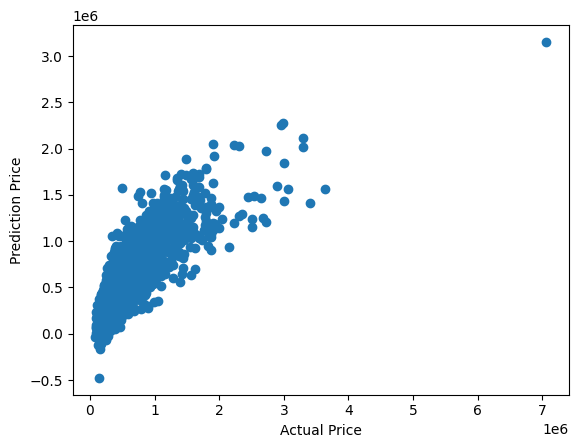

In [ ]:
plt.scatter(x=y_test, y=y_linear_test_pred)
plt.xlabel('Actual Price')
plt.ylabel("Prediction Price")

### Decision Tree Regressor Model Prediction Cluster Graph

Text(0, 0.5, 'Prediction Price')

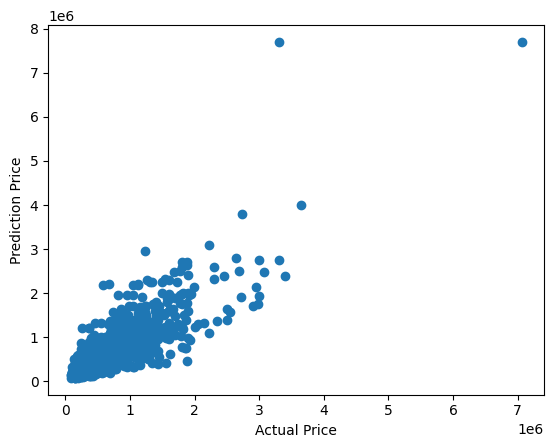

In [ ]:
plt.scatter(x=y_test, y=y_tree_test_pred)
plt.xlabel('Actual Price')
plt.ylabel("Prediction Price")

### ElasticNet Regressor Model Prediction Cluster Graph

Text(0, 0.5, 'Prediction Price')

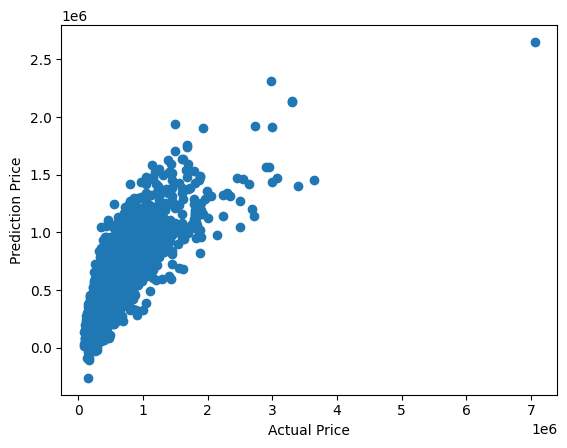

In [ ]:
plt.scatter(x=y_test, y=y_elnt_test_pred)
plt.xlabel('Actual Price')
plt.ylabel("Prediction Price")

### KNN Regressor Model Prediction Cluster Graph

Text(0, 0.5, 'Prediction Price')

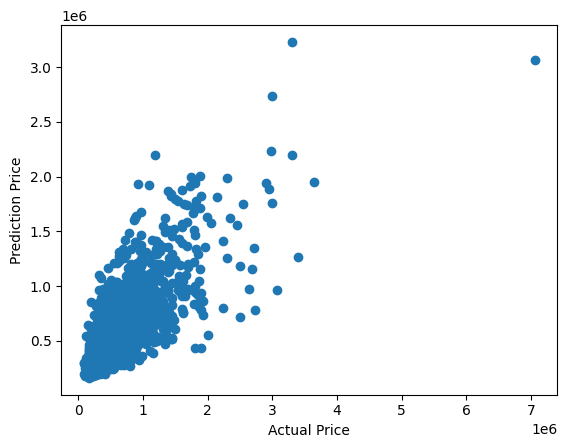

In [ ]:
plt.scatter(x=y_test, y=y_knn_test_pred)
plt.xlabel('Actual Price')
plt.ylabel("Prediction Price")

### Random Forest Regressor Model Prediction Cluster Graph

Text(0, 0.5, 'Prediction Price')

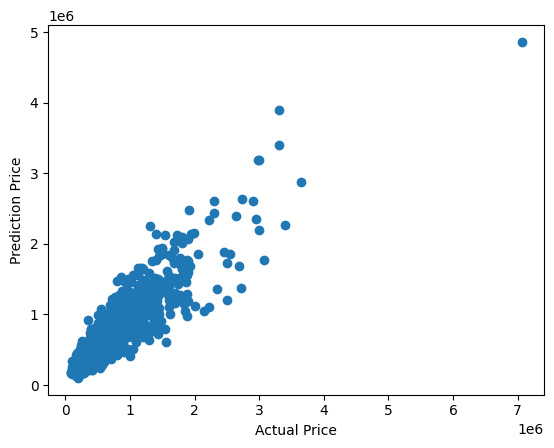

In [ ]:
plt.scatter(x=y_test, y=y_rand_test_pred)
plt.xlabel('Actual Price')
plt.ylabel("Prediction Price")

## Tuned Model Cluster Graphs

### Tuned Linear Regressor Model Prediction Cluster Graph

Text(0, 0.5, 'Prediction Price')

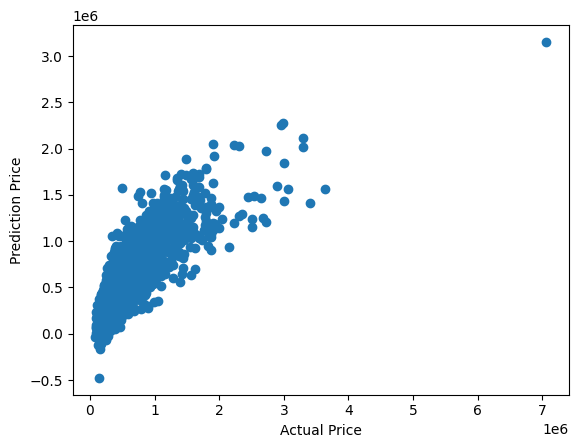

In [ ]:
plt.scatter(x=y_test, y=y_tuned_linear_test_pred)
plt.xlabel('Actual Price')
plt.ylabel("Prediction Price")

### Tuned Decision Tree Regressor Model Prediction Cluster Graph

Text(0, 0.5, 'Prediction Price')

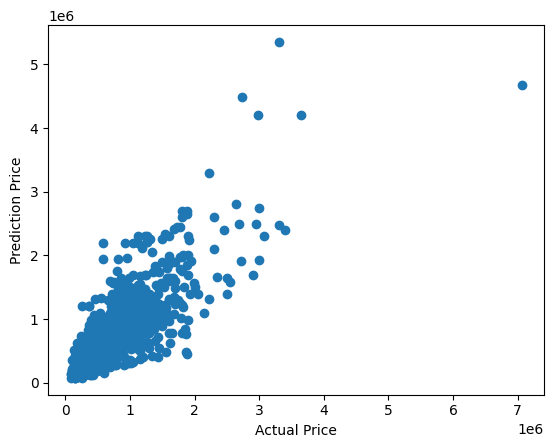

In [ ]:
plt.scatter(x=y_test, y=y_tuned_tree_test_pred)
plt.xlabel('Actual Price')
plt.ylabel("Prediction Price")

### Tuned ElasticNet Regressor Model Prediction Cluster Graph

Text(0, 0.5, 'Prediction Price')

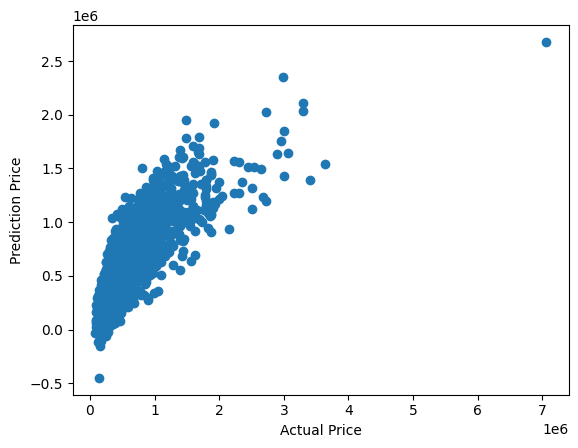

In [ ]:
plt.scatter(x=y_test, y=y_tuned_elnt_test_pred)
plt.xlabel('Actual Price')
plt.ylabel("Prediction Price")

### Tuned KNN Regressor Model Prediction Cluster Graph

Text(0, 0.5, 'Prediction Price')

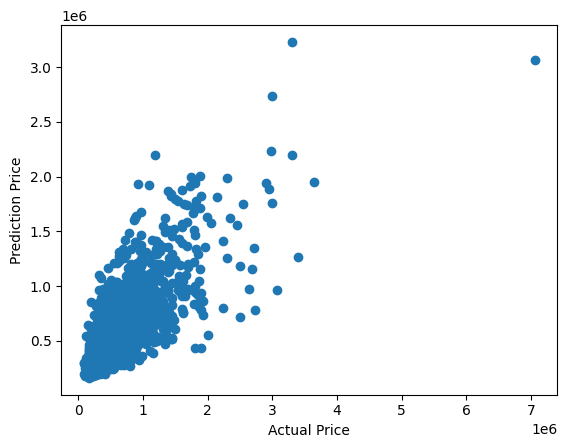

In [ ]:
plt.scatter(x=y_test, y=y_tuned_knn_test_pred)
plt.xlabel('Actual Price')
plt.ylabel("Prediction Price")

### Tuned Random Forest Regressor Model Prediction Cluster Graph

Text(0, 0.5, 'Prediction Price')

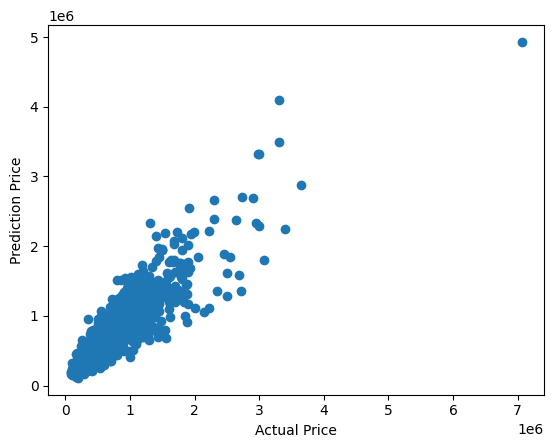

In [ ]:
plt.scatter(x=y_test, y=y_tuned_rand_test_pred)
plt.xlabel('Actual Price')
plt.ylabel("Prediction Price")